In [1]:
from codes.python import load_database,ECG_denoising
from codes.python import QRS_detector
import numpy as np
from scipy import signal
from scipy.signal import savgol_filter
import operator
from numpy import array
import sys
import csv
import os
import matplotlib.pyplot as plt
import wfdb
from wfdb import processing, plot
from codes.python import heartbeat_segmentation as shs
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.preprocessing import normalize
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd
import pywt
from biosppy.signals import ecg
from sklearn import metrics
#import waipy
import operator
from codes.python import ecg_waveform_extractor as waveform
import time as system_time
from scipy import stats
import warnings
import termcolor as colored
from math import*




In [2]:
def average(numbers):
    return float(sum(numbers)) / len(numbers)

In [3]:
mitdb = load_database.load_mitdb()
mitdb.segment_beats()

C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/100
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/100.csv
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/100.txt
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/p_t_wave/100pt.csv
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/101
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/101.csv
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/101.txt
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/p_t_wave/101pt.csv
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/102
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/102.csv
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/102.txt
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/p_t_wave/102pt

C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/201.txt
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/p_t_wave/201pt.csv
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/202
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/202.csv
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/202.txt
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/p_t_wave/202pt.csv
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/203
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/203.csv
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/203.txt
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/p_t_wave/203pt.csv
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/205
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/205

Filtered MLII records from : 102
start segmenting MLII.
Finished segmenting MLII.
Segmenting record 102 completes.
Start segmenting records: 103
Filtered MLII records from : 103
start segmenting MLII.
Finished segmenting MLII.
Segmenting record 103 completes.
Start segmenting records: 104
Filtered MLII records from : 104
start segmenting MLII.
Finished segmenting MLII.
Segmenting record 104 completes.
Start segmenting records: 105
Filtered MLII records from : 105
start segmenting MLII.
Finished segmenting MLII.
Segmenting record 105 completes.
Start segmenting records: 106
Filtered MLII records from : 106
start segmenting MLII.
Finished segmenting MLII.
Segmenting record 106 completes.
Start segmenting records: 107
Filtered MLII records from : 107
start segmenting MLII.
Finished segmenting MLII.
Segmenting record 107 completes.
Start segmenting records: 108
Filtered MLII records from : 108
start segmenting MLII.
Finished segmenting MLII.
Segmenting record 108 completes.
Start segmentin

In [4]:
for i in range(0,len(mitdb.patient_records)):
    print(mitdb.patient_records[i].filename, i)

    

100 0
101 1
102 2
103 3
104 4
105 5
106 6
107 7
108 8
109 9
111 10
112 11
113 12
114 13
115 14
116 15
117 16
118 17
119 18
121 19
122 20
123 21
124 22
200 23
201 24
202 25
203 26
205 27
207 28
208 29
209 30
210 31
212 32
213 33
214 34
215 35
217 36
219 37
220 38
221 39
222 40
223 41
228 42
230 43
231 44
232 45
233 46
234 47


In [5]:
mit100 = load_database.load_patient_record("mitdb","100")
mit100.set_segmented_beats_r_pos(winL=100,winR=200)
filtere_MLII = mit100.filtered_MLII
beats, poses = shs.segment(filtere_MLII,100,50,50,25)
assert len(beats) == 100
assert max(filtere_MLII[beats]) == filtere_MLII[poses],"max(pos) isn't equal to r_pos "
count = 0
assert shs.check_class_AAMI('N',-1) == 0

for patient in mitdb.patient_records:
    patient.set_r_properties_MLII()
    patient.set_Q_S_points_MLII()
    patient.set_P_T_points_MLII()





                             
    



C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/100
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/100.csv
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/100.txt
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/p_t_wave/100pt.csv
Start segmenting records: 100
Filtered MLII records from : 100
start segmenting MLII.
Finished segmenting MLII.
Segmenting record 100 completes.
Processing file: 100
Patient file:  100 begins
Patient file:  100 processing end
Done proecessing: 100
Processing file: 100
Patient file:  100 begins
Done proecessing: 100
Processing file: 100
Patient file:  100 begins
Done proecessing: 100
Processing file: 101
Patient file:  101 begins
Patient file:  101 processing end
Done proecessing: 101
Processing file: 101
Patient file:  101 begins
Done proecessing: 101
Processing file: 101
Patient file:  101 begins
Done proecessing: 101
Processing file: 102
Patient file:  10

Patient file:  212 processing end
Done proecessing: 212
Processing file: 212
Patient file:  212 begins
Done proecessing: 212
Processing file: 212
Patient file:  212 begins
Done proecessing: 212
Processing file: 213
Patient file:  213 begins
Patient file:  213 processing end
Done proecessing: 213
Processing file: 213
Patient file:  213 begins
Done proecessing: 213
Processing file: 213
Patient file:  213 begins
Done proecessing: 213
Processing file: 214
Patient file:  214 begins
Patient file:  214 processing end
Done proecessing: 214
Processing file: 214
Patient file:  214 begins
Done proecessing: 214
Processing file: 214
Patient file:  214 begins
Done proecessing: 214
Processing file: 215
Patient file:  215 begins
Patient file:  215 processing end
Done proecessing: 215
Processing file: 215
Patient file:  215 begins
Done proecessing: 215
Processing file: 215
Patient file:  215 begins
Done proecessing: 215
Processing file: 217
Patient file:  217 begins
Patient file:  217 processing end
Do

NameError: name 'highest_peak' is not defined

In [14]:
count = 0
for patient in mitdb.patient_records:
    
    
    print(patient.filename, count)
    count += 1
    assert len(patient.original_R_pos) == len(patient.segmented_R_pos) == len(patient.segmented_beat_time) == len(patient.segmented_beat_index),"Unequal length, should be equal in length"
    assert len(patient.segmented_beat_1) == len(patient.segmented_class_ID) == len(patient.segmented_beat_class),"Unequal lens, should be equal in length"
    
    
    assert len(patient.Q_points) == len(patient.S_points),"Unequal lens, should be equal in length"
    assert len(patient.segmented_R_pos) == len(patient.S_points),"Unequal lens, should be equal in length"
   # properties =  patient.r_peak_properties_extractor()
    
    #r_properties = R_pos_properites(patient)
    #q_peaks, q_properties , s_peaks, s_properties = q_s_peak_properties_extractor(patient)
    
    #p_positives, p_negatives, p_properties, t_positives, t_negatives, t_properties = p_and_t_peak_properties_extractor(patient)
    r_properties = patient.R_pos_properites
    q_props = patient.Q_points_properites
    s_props = patient.S_points_properites
    
    p_props = patient.P_points_properites
    t_props = patient.T_points_properites
    
    p_height = np.asarray(p_props["height"])
    t_height = np.asarray(t_props["height"])
    
    p_durations = np.asarray(p_props["durations"])
    t_durations = np.asarray(t_props["durations"])
    
    p_amp = np.asarray(p_props["amplitudes"])
    t_amp = np.asarray(t_props["amplitudes"])
    
    
    assert len(r_properties["height"]) == len(patient.segmented_R_pos),"Unequal lens, should be equal in length" + str(len(r_properties["height"]))
    assert len(q_props["height"]) == len(patient.segmented_R_pos),"Unequal lens, should be equal in length"
    assert len(s_props["height"]) == len(patient.segmented_R_pos),"Unequal lens, should be equal in length"
    
    assert len(p_height) == len(patient.segmented_R_pos),"Unequal lens, should be equal in length" + str(len(p_height[0]))
    assert len(t_height) == len(patient.segmented_R_pos),"Unequal lens, should be equal in length"

    assert average(r_properties["height"]) < 3,"Average height of r_peak for patient "+ patient.filename+ " is greater than 3"
    assert average(q_props["height"]) < 3,"Average height of q_peak for patient "+ patient.filename+ " is greater than 1"
    assert average(s_props["height"]) < 3,"Average height of s_peak for patient "+ patient.filename+ " is greater than 1"
    
    assert average(p_height[:,1]) < 3,"Average height of p_peak for patient "+ patient.filename+ " is greater than 1"
    assert average(t_height[:,1]) < 3,"Average height of t_peak for patient "+ patient.filename+ " is greater than 1"

    assert average(r_properties["height"]) > 0.5,"Average height of r_peak for patient " +patient.filename+ " is less than 0.5"
    assert average(q_props["height"]) > 0,"Average height of q_peak for patient " +patient.filename+ " is less than 0"
    assert average(s_props["height"]) > 0,"Average height of s_peak for patient " +patient.filename+ " is less than 0"
    
    assert average(p_height[:,1]) > 0,"Average height of p_peak for patient " +patient.filename+ " is less than 0"
    assert average(t_height[:,1]) > 0,"Average height of t_peak for patient " +patient.filename+ " is less than 0"
    
    assert min(r_properties["height"]) >= 0,"Min height of r_peak for patient " +patient.filename+ " is less than 0"
    assert min(q_props["height"]) >= 0,"Min height of q_peak for patient " +patient.filename+ " is less than 0"
    assert min(s_props["height"]) >= 0,"Min height of s_peak for patient " +patient.filename+ " is less than 0"
    
    assert min(p_height[:,1]) >= 0,"Min height of p_peak for patient " +patient.filename+ " is less than 0"
    assert min(t_height[:,1]) >= 0,"Min height of t_peak for patient " +patient.filename+ " is less than 0"

    assert max(r_properties["height"]) < 5,"Max height of r_peak for patient " +patient.filename+ " is greater than 5"
    assert max(q_props["height"]) < 5,"Max height of q_peak for patient " +patient.filename+ " is greater than 3"
    assert max(s_props["height"]) < 5,"Max height of s_peak for patient " +patient.filename+ " is greater than 3"
    
    assert max(p_height[:,1]) < 5,"Max height of p_peak for patient " +patient.filename+ " is greater than 3"
    assert max(t_height[:,1]) < 5,"Max height of t_peak for patient " +patient.filename+ " is greater than 3"

    x ,y  = np.unique(r_properties["height"], return_counts=True) # counting occurrence of each loan
    index = np.where(x==0)
    index = np.asarray(index)
    if(index.size != 0):
        
        if(y[index[0]] > 20):
            warnings.warn("height equal to 0 number is greater then 20 in " + patient.filename + " record with 0 height number of "+ str(y[index[0]]))
        
    
    assert len(r_properties["durations"]) == len(patient.segmented_R_pos),"Unequal lens, should be equal in length"
    assert len(q_props["durations"]) == len(patient.segmented_R_pos),"Unequal lens, should be equal in length"
    assert len(s_props["durations"]) == len(patient.segmented_R_pos),"Unequal lens, should be equal in length"
    
    assert len(p_durations[:,1]) == len(patient.segmented_R_pos),"Unequal lens, should be equal in length"
    assert len(t_durations[:,1]) == len(patient.segmented_R_pos),"Unequal lens, should be equal in length"

    assert average(r_properties["durations"]) < 0.09,"Average duration of r_peak for patient "+ patient.filename+ " is greater than 0.09"
    assert average(q_props["durations"]) < 0.09,"Average duration of q_peak for patient "+ patient.filename+ " is greater than 0.05"
    assert average(s_props["durations"]) < 0.09,"Average duration of s_peak for patient "+ patient.filename+ " is greater than 0.05"
    #assert average(p_durations[:,1]) < 0.01,"Average duration of p_peak for patient "+ patient.filename+ " is greater than 0.05"
    #assert average(t_durations[:,1]) < 0.01,"Average duration of t_peak for patient "+ patient.filename+ " is greater than 0.05"
    
    assert average(r_properties["durations"]) > 0.01,"Average durations of r_peak for patient " +patient.filename+ " is less than 0.01"
    assert average(q_props["durations"]) > 0.001,"Average durations of q_peak for patient " +patient.filename+ " is less than 0.001"
    assert average(s_props["durations"]) > 0.001,"Average durations of s_peak for patient " +patient.filename+ " is less than 0.001"
    
    #assert average(p_durations[:,1]) > 0.001,"Average durations of p_peak for patient " +patient.filename+ " is less than 0.001"
    #assert average(t_durations[:,1]) > 0.001,"Average durations of t_peak for patient " +patient.filename+ " is less than 0.001"


    assert min(r_properties["durations"]) >= 0,"Min durations of r_peak for patient " +patient.filename+ " is less than 0"
    assert min(q_props["durations"]) >= 0,"Min durations of q_peak for patient " +patient.filename+ " is less than 0"
    assert min(s_props["durations"]) >= 0,"Min durations of s_peak for patient " +patient.filename+ " is less than 0"
    
    assert min(p_durations[:,1]) >= 0,"Min durations of p_peak for patient " +patient.filename+ " is less than 0"
    assert min(t_durations[:,1]) >= 0,"Min durations of t_peak for patient " +patient.filename+ " is less than 0"

    assert max(r_properties["durations"]) < 0.3,"Max durations of r_peak for patient " +patient.filename+ " is greater than 0.3"
    assert max(q_props["durations"]) < 0.3,"Max durations of q_peak for patient " +patient.filename+ " is greater than 0.2"
    assert max(s_props["durations"]) < 0.3,"Max durations of s_peak for patient " +patient.filename+ " is greater than 0.2"
    
    assert max(p_durations[:,1]) < 0.3,"Max durations of p_peak for patient " +patient.filename+ " is greater than 0.2"
    assert max(t_durations[:,1]) < 0.3,"Max durations of t_peak for patient " +patient.filename+ " is greater than 0.2"

    x ,y  = np.unique(r_properties["durations"], return_counts=True) # counting occurrence of each loan
    index = np.where(x==0)
    index = np.asarray(index)
    if(index.size != 0):
        
        if(y[index[0]] > 20):
            warnings.warn("durations equal to 0 number is greater then 20 in " + patient.filename + " record with 0 durations number of "+ str(y[index[0]]))
        
    
    assert len(r_properties["onset"]) == len(patient.segmented_R_pos),"Unequal lens, should be equal in length"   
    assert len(q_props["onset"]) == len(patient.segmented_R_pos),"Unequal lens, should be equal in length"   
    assert len(s_props["onset"]) == len(patient.segmented_R_pos),"Unequal lens, should be equal in length"
    
    assert len(r_properties["offset"]) == len(patient.segmented_R_pos),"Unequal lens, should be equal in length"
    assert len(q_props["offset"]) == len(patient.segmented_R_pos),"Unequal lens, should be equal in length"   
    assert len(s_props["offset"]) == len(patient.segmented_R_pos),"Unequal lens, should be equal in length" 
    
    #print(r_properties["offset"])

    for i in range(1,len(patient.segmented_R_pos)-1):
        assert len(patient.segmented_beat_1[i])==len(patient.segmented_beat_1[i+1]), "Unequal lens, should be equal in length"
        assert len(patient.segmented_beat_time[i]) == len(patient.segmented_beat_time[i+1]), "Unequal lens, should be equal in length"
        assert len(patient.segmented_beat_1[i])==len(patient.segmented_beat_time[i]), "Unequal lens, should be equal in length"
        assert patient.segmented_R_pos[i] <= patient.segmented_R_pos[i+1], "the later r_pos is smaller " + patient.filename + " R_peak: " + str(patient.segmented_R_pos[i]) +" "+  str(patient.segmented_R_pos[i+1])
        assert len(q_props["amplitudes"][i]) == 10, "The list of amplitudes is not equal to 10 in patient " + patient.filename + " "+ str(len(q_props["amplitudes"][i]))
        assert len(r_properties["amplitudes"][i]) == 10, "The list of amplitudes is not equal to 10 in patient " + patient.filename + " "+ str(len(r_properties["amplitudes"][i]))
        assert len(s_props["amplitudes"][i]) == 10, "The list of amplitudes is not equal to 10 in patient " + patient.filename + " "+ str(len(s_props["amplitudes"][i]))
        
       
        
        assert r_properties["peaks"][i] <=  patient.segmented_R_pos[i]+6,"the peak position is not in range : Patient " + patient.filename+ " R_peak: " + str(r_properties["peaks"][i])
        assert r_properties["peaks"][i] >=  patient.segmented_R_pos[i]-6,"the peak position is not in range : Patient " + patient.filename+ " R_peak: " + str(r_properties["peaks"][i])
        assert r_properties["peaks"][i] <=  r_properties["peaks"][i+1], "the later peak position is smaller: Patient " + patient.filename+ " R_peak: " + str(r_properties["peaks"][i]) 
        if(r_properties["offset"][i] < r_properties["peaks"][i]):
            warnings.warn("r_peak is larger than offset. File name: "+ patient.filename + ". r_peak: "+ str(r_properties["peaks"][i]))
        if(r_properties["onset"][i] > r_properties["peaks"][i]):
            warnings.warn("onset is larger than r_peak. File name: "+ patient.filename + ". r_peak: "+ str(r_properties["peaks"][i]))
        if(r_properties["onset"][i] > r_properties["onset"][i+1]):
            warnings.warn("the later onset is larger than current onset. File name: "+ patient.filename + ". r_peak: "+ str(r_properties["peaks"][i]))
        if(r_properties["offset"][i] > r_properties["offset"][i+1]):
            warnings.warn("the later offset is larger than current offset. File name: "+ patient.filename + ". r_peak: "+ str(r_properties["peaks"][i]))
        #  assert max()
        
        point_list = list(range(patient.segmented_R_pos[i-1],patient.segmented_R_pos[i]))
        if((patient.Q_points[i] in point_list)==False):
            warnings.warn("the current q point is not in the range current  pre_r . File name: "+ patient.filename + ". r_peak: "+ str(r_properties["peaks"][i]))
        if(patient.Q_points[i+1] in point_list):
            warnings.warn("the later q point is in the range of the  current q_point. File name: "+ patient.filename + ". r_peak: "+ str(r_properties["peaks"][i]))
        
        if(patient.Q_points[i-1] in point_list):
            warnings.warn("the former q point is in the range of the  current q_point. File name: "+ patient.filename + ". r_peak: "+ str(r_properties["peaks"][i]))
  
        if(patient.Q_points[i] > patient.Q_points[i+1]):
            warnings.warn("the current q point is greater than the later q_point. File name: "+ patient.filename + ". r_peak: "+ str(r_properties["peaks"][i]))
       
        if(q_props["offset"][i] < q_props["peaks"][i]):
            warnings.warn("q_peak is larger than offset. File name: "+ patient.filename + ". q_peak: "+ str(q_props["peaks"][i]))
        if(q_props["onset"][i] > q_props["peaks"][i]):
            warnings.warn("onset is larger than q_peak. File name: "+ patient.filename + ". q_peak: "+ str(q_props["peaks"][i]))
        if(q_props["onset"][i] > q_props["onset"][i+1]):
            warnings.warn("the later onset is larger than current onset. File name: "+ patient.filename + ". q_peak: "+ str(q_props["peaks"][i]))
        if(q_props["offset"][i] > q_props["offset"][i+1]):
            warnings.warn("the later offset is larger than current offset. File name: "+ patient.filename + ". q_peak: "+ str(q_props["peaks"][i]))
        #  assert max()
        
        if(s_props["offset"][i] < s_props["peaks"][i]):
            warnings.warn("s_peak is larger than offset. File name: "+ patient.filename + ". s_peak: "+ str(s_props["peaks"][i]))
        if(s_props["onset"][i] > s_props["peaks"][i]):
            warnings.warn("onset is larger than s_peak. File name: "+ patient.filename + ". s_peak: "+ str(s_props["peaks"][i]))
        if(s_props["onset"][i] > s_props["onset"][i+1]):
            warnings.warn("the later onset is larger than current onset. File name: "+ patient.filename + ". s_peak: "+ str(s_props["peaks"][i]))
        if(s_props["offset"][i] > s_props["offset"][i+1]):
            warnings.warn("the later offset is larger than current offset. File name: "+ patient.filename + ". s_peak: "+ str(s_props["peaks"][i]))
        #  assert max()
        
        
        point_list_2 = list(range(patient.segmented_R_pos[i],patient.segmented_R_pos[i+1]))
        if((patient.S_points[i] in point_list_2)==False):
            warnings.warn("the current S point is not in the range current  post_r . File name: "+ patient.filename + ". r_peak: "+ str(r_properties["peaks"][i]))
        
        if(patient.S_points[i+1] in point_list_2):
            warnings.warn("the later s point is in the range of the  current s_point. File name: "+ patient.filename + ". r_peak: "+ str(r_properties["peaks"][i]))
        
        if(patient.S_points[i-1] in point_list_2):
            warnings.warn("the former s point is in the range of the  current s_point. File name: "+ patient.filename + ". r_peak: "+ str(r_properties["peaks"][i]))
         
        if(patient.S_points[i] > patient.S_points[i+1]):
            warnings.warn("the current s point is greater than the later s_point. File name: "+ patient.filename + ". r_peak: "+ str(r_properties["peaks"][i]))
        
        #assert r_properties["onset"][i]  <= r_properties["peaks"][i],"the peak is smaller than onset in " + patient.filename + " onset: " + str(r_properties["onset"][i]) +" peak: "+  str(r_properties["peaks"][i]) 
        #assert r_properties["offset"][i] >= r_properties["peaks"][i],"the peak is larger than offset in " + patient.filename + " offset: " + str(r_properties["offset"][i]) +" peak: "+  str(r_properties["peaks"][i])
       
    #peak,properties= peak_properties_extractor(mit100.filtered_MLII)
    
    
        point_list = list(range(patient.segmented_R_pos[i-1],patient.segmented_R_pos[i]))
        if((patient.P_points[i] in point_list)==False):
            warnings.warn("the current p point is not in the range current  pre_r . File name: "+ patient.filename + ". r_peak: "+ str(r_properties["peaks"][i]))
        if(patient.P_points[i+1] in point_list):
            warnings.warn("the later p point is in the range of the  current p_point. File name: "+ patient.filename + ". r_peak: "+ str(r_properties["peaks"][i]))
        
        if(patient.P_points[i-1] in point_list):
            warnings.warn("the former p point is in the range of the  current p_point. File name: "+ patient.filename + ". r_peak: "+ str(r_properties["peaks"][i]))
  
        if(patient.P_points[i] > patient.P_points[i+1]):
            warnings.warn("the current p point is greater than the later p_point. File name: "+ patient.filename + ". r_peak: "+ str(r_properties["peaks"][i]))
       
        point_list = list(range(patient.segmented_R_pos[i],patient.segmented_R_pos[i+1]))
        if((patient.T_points[i] in point_list)==False):
            warnings.warn("the current T point is not in the range current  post_r . File name: "+ patient.filename + ". r_peak: "+ str(r_properties["peaks"][i]))
        if(patient.T_points[i+1] in point_list):
            warnings.warn("the later T point is in the range of the  current T_point. File name: "+ patient.filename + ". r_peak: "+ str(r_properties["peaks"][i]))
        
        if(patient.T_points[i-1] in point_list):
            warnings.warn("the former T point is in the range of the  current T_point. File name: "+ patient.filename + ". r_peak: "+ str(r_properties["peaks"][i]))
  
        if(patient.T_points[i] > patient.T_points[i+1]):
            warnings.warn("the current T point is greater than the later T_point. File name: "+ patient.filename + ". r_peak: "+ str(r_properties["peaks"][i]))
       
        

100 0
101 1


C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:162: UserWarning: the later q point is in the range of the  current q_point. File name: 101. r_peak: 114682
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:175: UserWarning: the later onset is larger than current onset. File name: 101. q_peak: 114667
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:160: UserWarning: the current q point is not in the range current  pre_r . File name: 101. r_peak: 114700


102 2
103 3
104 4


C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: UserWarning: height equal to 0 number is greater then 20 in 104 record with 0 height number of [24]
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:121: UserWarning: durations equal to 0 number is greater then 20 in 104 record with 0 durations number of [23]
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:226: UserWarning: the later T point is in the range of the  current T_point. File name: 104. r_peak: 59537
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:162: UserWarning: the later q point is in the range of the  current q_point. File name: 104. r_peak: 59677
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:193: UserWarning: the current S point is not in the range current  post_r . File name: 104. r_peak: 59677
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:214: UserWarning: the later p point is in the range of the  current p_point

105 5


C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: UserWarning: height equal to 0 number is greater then 20 in 105 record with 0 height number of [50]
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:121: UserWarning: durations equal to 0 number is greater then 20 in 105 record with 0 durations number of [46]
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:175: UserWarning: the later onset is larger than current onset. File name: 105. q_peak: 371680
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:193: UserWarning: the current S point is not in the range current  post_r . File name: 105. r_peak: 371684
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:199: UserWarning: the former s point is in the range of the  current s_point. File name: 105. r_peak: 371711
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:162: UserWarning: the later q point is in the range of the  current q_point. File na

106 6
107 7
108 8


C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:193: UserWarning: the current S point is not in the range current  post_r . File name: 108. r_peak: 280501
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:199: UserWarning: the former s point is in the range of the  current s_point. File name: 108. r_peak: 280515
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:177: UserWarning: the later offset is larger than current offset. File name: 108. q_peak: 301846
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:162: UserWarning: the later q point is in the range of the  current q_point. File name: 108. r_peak: 334192
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:193: UserWarning: the current S point is not in the range current  post_r . File name: 108. r_peak: 334192
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:224: UserWarning: the current T point is not in the range current  post_r . File n

109 9
111 10
112 11
113 12
114 13
115 14


C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:226: UserWarning: the later T point is in the range of the  current T_point. File name: 115. r_peak: 585451
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:162: UserWarning: the later q point is in the range of the  current q_point. File name: 115. r_peak: 585808
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:193: UserWarning: the current S point is not in the range current  post_r . File name: 115. r_peak: 585808
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:214: UserWarning: the later p point is in the range of the  current p_point. File name: 115. r_peak: 585808
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:224: UserWarning: the current T point is not in the range current  post_r . File name: 115. r_peak: 585808
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:160: UserWarning: the current q point is not in the range current  pre_r

116 15
117 16
118 17
119 18


C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: UserWarning: height equal to 0 number is greater then 20 in 119 record with 0 height number of [48]
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:121: UserWarning: durations equal to 0 number is greater then 20 in 119 record with 0 durations number of [47]


121 19
122 20
123 21
124 22
200 23


C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: UserWarning: height equal to 0 number is greater then 20 in 200 record with 0 height number of [46]
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:121: UserWarning: durations equal to 0 number is greater then 20 in 200 record with 0 durations number of [44]
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:162: UserWarning: the later q point is in the range of the  current q_point. File name: 200. r_peak: 347947
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:193: UserWarning: the current S point is not in the range current  post_r . File name: 200. r_peak: 347947
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:224: UserWarning: the current T point is not in the range current  post_r . File name: 200. r_peak: 347947
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:160: UserWarning: the current q point is not in the range current  pre_r 

201 24
202 25
203 26


C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: UserWarning: height equal to 0 number is greater then 20 in 203 record with 0 height number of [36]
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:121: UserWarning: durations equal to 0 number is greater then 20 in 203 record with 0 durations number of [32]
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:155: UserWarning: the later offset is larger than current offset. File name: 203. r_peak: 329298
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:162: UserWarning: the later q point is in the range of the  current q_point. File name: 203. r_peak: 329298
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:160: UserWarning: the current q point is not in the range current  pre_r . File name: 203. r_peak: 329321
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:193: UserWarning: the current S point is not in the range current  post_r . File nam

205 27


C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:175: UserWarning: the later onset is larger than current onset. File name: 205. q_peak: 110270


207 28


C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: UserWarning: height equal to 0 number is greater then 20 in 207 record with 0 height number of [115]
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:121: UserWarning: durations equal to 0 number is greater then 20 in 207 record with 0 durations number of [110]
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:226: UserWarning: the later T point is in the range of the  current T_point. File name: 207. r_peak: 14523
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:162: UserWarning: the later q point is in the range of the  current q_point. File name: 207. r_peak: 14669
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:214: UserWarning: the later p point is in the range of the  current p_point. File name: 207. r_peak: 14669
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:224: UserWarning: the current T point is not in the range current  post_

208 29


C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: UserWarning: height equal to 0 number is greater then 20 in 208 record with 0 height number of [50]
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:121: UserWarning: durations equal to 0 number is greater then 20 in 208 record with 0 durations number of [47]


209 30
210 31
212 32
213 33
214 34
215 35


C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:193: UserWarning: the current S point is not in the range current  post_r . File name: 215. r_peak: 64520
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:199: UserWarning: the former s point is in the range of the  current s_point. File name: 215. r_peak: 64556
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:175: UserWarning: the later onset is larger than current onset. File name: 215. q_peak: 280068
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:193: UserWarning: the current S point is not in the range current  post_r . File name: 215. r_peak: 443163
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:199: UserWarning: the former s point is in the range of the  current s_point. File name: 215. r_peak: 443185


217 36


C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: UserWarning: height equal to 0 number is greater then 20 in 217 record with 0 height number of [42]
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:121: UserWarning: durations equal to 0 number is greater then 20 in 217 record with 0 durations number of [39]


219 37


C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: UserWarning: height equal to 0 number is greater then 20 in 219 record with 0 height number of [22]
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:121: UserWarning: durations equal to 0 number is greater then 20 in 219 record with 0 durations number of [21]
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:185: UserWarning: the later onset is larger than current onset. File name: 219. s_peak: 437768
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:187: UserWarning: the later offset is larger than current offset. File name: 219. s_peak: 437768
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:193: UserWarning: the current S point is not in the range current  post_r . File name: 219. r_peak: 437726
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:202: UserWarning: the current s point is greater than the later s_point. File name: 219. r_peak:

220 38
221 39


C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:193: UserWarning: the current S point is not in the range current  post_r . File name: 221. r_peak: 416045
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:199: UserWarning: the former s point is in the range of the  current s_point. File name: 221. r_peak: 416080


222 40


C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: UserWarning: height equal to 0 number is greater then 20 in 222 record with 0 height number of [30]
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:121: UserWarning: durations equal to 0 number is greater then 20 in 222 record with 0 durations number of [28]


223 41
228 42


C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: UserWarning: height equal to 0 number is greater then 20 in 228 record with 0 height number of [21]
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:193: UserWarning: the current S point is not in the range current  post_r . File name: 228. r_peak: 15805
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:199: UserWarning: the former s point is in the range of the  current s_point. File name: 228. r_peak: 15845


230 43


C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: UserWarning: height equal to 0 number is greater then 20 in 230 record with 0 height number of [35]
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:121: UserWarning: durations equal to 0 number is greater then 20 in 230 record with 0 durations number of [26]


231 44
232 45
233 46
234 47


In [ ]:
print(average(QRS_properties["interval"]))
print(average(QRS_properties["average_ten"]))
print(average(QRS_properties["average_fifty"]))
print(" ")
print(average(P_Q_properties["interval"]))
print(average(P_Q_properties["average_ten"]))
print(average(P_Q_properties["average_fifty"]))
print(" ")
print(average(P_R_properties["interval"]))
print(average(P_R_properties["average_ten"]))
print(average(P_R_properties["average_fifty"]))
print(average(P_R_neg))
print(" ")
print(average(S_T_properties["interval"]))
print(average(S_T_properties["average_ten"]))
print(average(S_T_properties["average_fifty"]))
print(average(S_T_neg))
print(" ")
print(average(R_T_properties["interval"]))
print(average(R_T_properties["average_ten"]))
print(average(R_T_properties["average_fifty"]))
print(average(R_T_neg))
print(" ")
print(average(P_T_properties["interval"]))
print(average(P_T_properties["average_ten"]))
print(average(P_T_properties["average_fifty"]))
print(average(neg_P_T))
print(average(P_T_neg))
print(average(neg_P_T_neg))


In [8]:
mit100 = mitdb.patient_records[0] 

In [13]:
p_points = [int(i) for i in mit100.annotated_p_waves_pos]
p_points = np.asarray(p_points, dtype=int)

In [14]:
np.where(np.logical_and(p_points>=1000, p_points<=2000))

(array([3, 4, 5, 6], dtype=int64),)

In [17]:
p_points[2:8]

array([ 885, 1168, 1456, 1747, 1983, 2339])

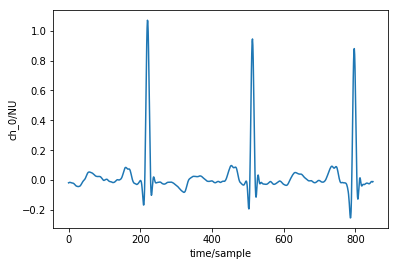

In [92]:
#properties = p_and_t_peak_properties_extractor(mitdb.patient_records[0])

Patient file:  100 begins
[6, 18] 6
[9, 19] 9
[0.00867217 0.00104543] 0.008672170286452466
[2, 16] 16
[6, 18] 18
[0.00845636 0.00104543] 0.001045429381095548
[403, 410, 423, 428, 434, 440, 446, 470, 495, 500, 506, 518, 543, 548, 554]
518
[1, 9, 22, 26, 21, 39, 45, 69, 94, 98, 104, 86, 141, 145, 152] 86
[4, 11, 23, 29, 42, 40, 46, 70, 96, 101, 108, 131, 143, 150, 154] 131
[7.16071701e-03 2.77807088e-03 2.78290418e-05 4.02375819e-03
 1.81471346e-02 1.74816563e-03 1.63147101e-04 6.21642688e-05
 2.04827397e-03 3.41430971e-03 4.39488015e-03 5.27971388e-02
 1.22754423e-03 5.86045500e-03 1.51801760e-03] 0.052797138840145245
[6, 11, 23, 29, 37, 44, 67, 54, 96, 101, 108, 137, 143, 150, 156] 54
[9, 21, 24, 32, 39, 45, 69, 79, 98, 104, 112, 142, 145, 152, 159] 79
[2.77807088e-03 1.81471346e-02 2.78290418e-05 4.02375819e-03
 1.74816563e-03 1.63147101e-04 6.21642688e-05 7.37398392e-02
 2.04827397e-03 3.41430971e-03 4.39488015e-03 5.86045500e-03
 1.22754423e-03 1.51801760e-03 4.88935756e-03] 0.07373

C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:683: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


[12, 17, 16, 43, 46, 53, 59, 66, 51, 108, 114, 132, 138, 142] 51
[14, 20, 32, 44, 49, 56, 62, 68, 77, 109, 116, 134, 139, 145] 77
[0.0003086  0.00272619 0.01270564 0.00026348 0.00288979 0.00358246
 0.00472336 0.00115105 0.02576329 0.00116059 0.00087783 0.00079792
 0.00034678 0.00641116] 0.025763286518777902
[9, 15, 19, 26, 45, 37, 74] 37
[10, 17, 23, 29, 51, 66, 76] 66
[0.00079698 0.00122167 0.00494775 0.00290507 0.01485364 0.11870216
 0.00044151] 0.11870215575937067
[10, 17, 23, 29, 51, 73] 73
[12, 19, 26, 31, 57, 74] 74
[0.00079698 0.00122167 0.00494775 0.00290507 0.01485364 0.00044151] 0.00044150662986500687
[3038, 3043, 3050, 3061, 3067, 3074, 3081, 3092, 3105, 3121, 3129, 3134, 3140, 3145, 3156, 3163, 3175]
3121
[10, 15, 22, 29, 40, 46, 53, 65, 78, 86, 101, 101, 112, 117, 129, 136, 148] 86
[13, 18, 25, 43, 41, 49, 56, 67, 79, 122, 103, 109, 115, 119, 130, 137, 149] 122
[0.00264882 0.00216843 0.00608699 0.01746052 0.00013339 0.00216076
 0.00236227 0.0001325  0.0002557  0.05652936 0

[3, 2, 14, 28, 38, 51, 56, 68, 76, 86, 92, 98, 110, 118, 122, 129, 140, 146] 2
[5, 18, 17, 35, 42, 53, 71, 70, 77, 88, 96, 100, 113, 119, 125, 131, 148, 147] 18
[1.77274925e-03 9.64772744e-03 3.60738969e-03 9.69345560e-03
 7.04012553e-03 1.15984426e-03 2.43456710e-02 1.14365022e-03
 1.64542940e-05 2.27629137e-04 4.62583473e-03 2.34233955e-03
 3.11602478e-03 3.22195867e-04 1.75541832e-03 1.05550404e-03
 8.82342922e-03 3.99344350e-04] 0.00964772744002346
[3, 8, 16, 30, 57] 30
[10, 10, 18, 64, 61] 64
[0.00449249 0.00049137 0.00072815 0.12563217 0.02185576] 0.12563217413598915
[0, 6, 12, 18, 51, 73] 73
[1, 8, 21, 19, 57, 74] 74
[0.00041659 0.00049137 0.01349385 0.00072815 0.02185576 0.00089268] 0.0008926837638253624
[5378, 5390, 5401, 5414, 5420, 5438, 5444, 5475, 5479, 5492, 5510, 5522]
5479
[2, 12, 24, 38, 37, 61, 67, 99, 88, 116, 131, 146] 88
[4, 26, 26, 39, 53, 64, 69, 100, 117, 117, 136, 148] 117
[3.57736408e-04 1.71216336e-02 1.31016653e-03 2.70843931e-05
 2.56833961e-02 6.14639311e-

[6, 9, 46, 55, 70] 70
[0.00325675 0.00036328 0.00180752 0.00705768 0.00752345] 0.007523451199838993
[7699, 7707, 7723, 7736, 7748, 7759, 7784, 7791, 7802, 7808, 7821, 7831, 7843]
7802
[0, 7, 18, 36, 44, 60, 85, 92, 85, 108, 122, 126, 144] 85
[1, 10, 31, 39, 55, 61, 87, 93, 119, 110, 123, 134, 145] 119
[6.44679455e-04 1.68554070e-03 2.24921866e-02 5.92794480e-03
 1.60115329e-02 6.29289490e-05 4.99406778e-04 5.69106828e-04
 5.35912467e-02 5.03159224e-04 1.78535057e-05 6.97719659e-03
 9.50571168e-04] 0.0535912466979123
[3, 10, 32, 38, 59, 57, 87, 93, 107, 118, 123, 142] 57
[16, 13, 36, 44, 60, 75, 88, 95, 108, 126, 124, 144] 75
[1.21029889e-02 1.68554070e-03 5.92794480e-03 1.60115329e-02
 6.29289490e-05 5.29149302e-02 4.99406778e-04 5.69106828e-04
 5.03159224e-04 6.97719659e-03 1.78535057e-05 9.50571168e-04] 0.05291493021361103
[1, 6, 16, 28, 44, 54, 67, 71] 28
[3, 10, 20, 59, 48, 57, 68, 73] 59
[0.00266986 0.00929138 0.00607205 0.11006248 0.00526313 0.01359281
 0.00020519 0.00160951] 0.1

[0, 15, 24, 53, 66, 71] 0
[6, 20, 27, 55, 73, 73] 6
[0.01399352 0.01454285 0.00692344 0.00225702 0.00535794 0.00034339] 0.013993519446607369
[10049, 10056, 10065, 10069, 10076, 10113, 10124, 10142, 10148, 10160, 10167, 10172]
10124
[19, 28, 38, 37, 36, 85, 91, 113, 121, 132, 139, 143] 91
[32, 31, 39, 44, 55, 87, 108, 117, 122, 135, 141, 147] 108
[0.01375255 0.00274181 0.00025189 0.0054352  0.02777808 0.0017185
 0.05915974 0.01059122 0.00020475 0.00664445 0.00056987 0.00336742] 0.05915973994893481
[4, 25, 32, 39, 44, 57, 87, 107, 120, 129, 136, 141] 57
[17, 28, 36, 40, 47, 76, 89, 113, 121, 132, 139, 143] 76
[0.02161359 0.00274181 0.01375255 0.00025189 0.0054352  0.05860119
 0.0017185  0.01059122 0.00020475 0.00664445 0.00441265 0.00056987] 0.058601193881576114
[5, 13, 41, 47, 32, 72] 32
[10, 20, 50, 49, 61, 73] 61
[0.0152421  0.00683463 0.01306509 0.00101379 0.111103   0.00040945] 0.1111029954071095
[9, 20, 46, 50, 71] 20
[13, 28, 47, 54, 72] 28
[0.00683463 0.01825643 0.00101379 0.0130

[7, 12, 19, 18, 31, 42, 55, 60, 53, 104, 112, 125, 138, 150] 53
[9, 15, 21, 29, 35, 45, 57, 63, 76, 105, 117, 129, 143, 151] 76
[0.0032197  0.0032492  0.00033326 0.01176992 0.00160765 0.00334657
 0.00364118 0.00461771 0.03883423 0.00132483 0.01404239 0.0050926
 0.00778237 0.00015191] 0.03883423134392827
[0, 6, 26, 34, 57, 73] 34
[2, 13, 27, 62, 59, 75] 62
[0.00185577 0.00880544 0.00019069 0.1098189  0.00492241 0.00131372] 0.10981889734456571
[3, 14, 27, 52, 70] 70
[6, 22, 28, 57, 72] 72
[0.00538785 0.0223511  0.00019069 0.00492241 0.00650805] 0.006508052131223786
[14745, 14763, 14780, 14786, 14792, 14840, 14864, 14876, 14887, 14895]
14840
[3, 19, 40, 44, 51, 90, 119, 135, 146, 155] 90
[9, 31, 42, 49, 53, 114, 127, 138, 148, 156] 114
[0.01195608 0.02045088 0.00150274 0.00734764 0.00244742 0.05802242
 0.01269206 0.00306024 0.00067349 0.00019912] 0.05802242385389092
[0, 11, 35, 42, 48, 57, 114, 133, 144, 150, 156] 57
[2, 19, 40, 44, 51, 75, 119, 135, 146, 158, 157] 75
[0.0018717  0.020450

[3, 15, 14, 44, 51] 3
[6, 17, 26, 47, 54] 6
[0.00568191 0.0032166  0.01430618 0.00592643 0.00615146] 0.005681909555431078
[18261, 18266, 18278, 18283, 18296, 18313, 18346, 18349, 18356, 18369, 18374, 18386, 18393, 18404]
18349
[4, 8, 19, 26, 31, 56, 89, 82, 98, 112, 115, 128, 135, 146] 82
[5, 11, 24, 28, 47, 57, 90, 120, 101, 113, 119, 130, 138, 149] 120
[0.00058048 0.00578938 0.00928141 0.00171488 0.02518285 0.00025686
 0.00014137 0.05130134 0.00203649 0.00030425 0.00707049 0.00087919
 0.00318844 0.00533204] 0.05130134261393268
[0, 5, 11, 24, 28, 55, 50, 90, 96, 107, 113, 127, 132, 130] 50
[1, 7, 16, 26, 33, 56, 73, 91, 98, 115, 115, 128, 135, 145] 73
[0.00047075 0.00058048 0.00578938 0.00171488 0.00928141 0.00025686
 0.04937165 0.00014137 0.00203649 0.00707049 0.00030425 0.00087919
 0.00318844 0.01427006] 0.04937165105509218
[14, 38, 29, 67] 29
[16, 45, 59, 69] 59
[0.00144968 0.01700548 0.11263251 0.00245209] 0.11263250507071518
[4, 16, 45, 64, 71] 71
[21, 19, 52, 67, 73] 73
[0.01501

[2, 7, 14, 20, 25, 31, 38, 50, 78, 85, 103, 110, 116, 122, 130, 140, 145] 50
[4, 17, 16, 22, 27, 34, 39, 68, 79, 87, 106, 113, 118, 125, 136, 143, 148] 68
[0.00151905 0.00699562 0.0015814  0.00066212 0.00143957 0.00287183
 0.00030467 0.06194122 0.00037572 0.00199549 0.00389407 0.00321289
 0.00104012 0.0024949  0.00607748 0.00173149 0.00204555] 0.061941220035960996
[11, 18, 29, 52, 69] 29
[14, 19, 58, 55, 73] 58
[3.25598186e-03 6.99640028e-05 1.17779870e-01 1.62935784e-02
 2.86317020e-03] 0.11777986963660235
[2, 14, 19, 45, 63] 2
[8, 17, 20, 52, 68] 8
[9.04056211e-03 3.25598186e-03 6.99640028e-05 1.62935784e-02
 5.45326901e-03] 0.009040562105652915
[20583, 20589, 20594, 20601, 20606, 20613, 20620, 20630, 20636, 20642, 20660, 20677, 20684, 20696, 20721, 20726]
20677
[0, 6, 10, 16, 23, 29, 35, 46, 53, 58, 77, 83, 100, 112, 138, 143] 83
[1, 8, 13, 22, 25, 32, 41, 50, 55, 60, 79, 117, 102, 115, 140, 145] 117
[1.08475559e-05 4.63039654e-04 5.00625133e-03 1.12060994e-02
 4.16367573e-04 1.1270

[13, 12, 25, 24, 34, 48, 47, 64, 77, 89, 100, 108, 113, 127, 132, 137, 143] 47
[14, 20, 27, 37, 36, 49, 70, 66, 79, 91, 104, 109, 115, 128, 134, 139, 145] 70
[0.00082126 0.00484374 0.00098019 0.005391   0.00067509 0.00011331
 0.04955283 0.00092536 0.00128278 0.00273075 0.00514201 0.00026946
 0.00079122 0.000552   0.00104437 0.0021048  0.00114684] 0.049552832041947215
[4, 12, 11, 23, 37, 31] 31
[7, 14, 19, 24, 44, 60] 60
[0.00303706 0.0009034  0.00443322 0.00063774 0.02386123 0.12845175] 0.1284517482871295
[7, 14, 19, 24, 44] 7
[10, 16, 26, 26, 51] 10
[0.00303706 0.0009034  0.00443322 0.00063774 0.02386123] 0.003037056593234746
[22910, 22917, 22923, 22929, 22934, 22940, 22954, 22965, 22996, 23000, 23007, 23024, 23030, 23042, 23049]
23007
[0, 6, 13, 12, 24, 29, 41, 53, 86, 85, 78, 114, 120, 132, 138] 78
[2, 9, 15, 27, 25, 31, 49, 59, 87, 92, 118, 116, 121, 133, 140] 118
[2.02176035e-03 3.75300825e-03 2.19084471e-03 1.05243929e-02
 7.04122722e-04 9.67509856e-04 1.79267619e-02 9.25874828e-

[4, 10, 16, 33, 53, 59, 77] 33
[7, 14, 18, 66, 56, 63, 78] 66
[3.40898788e-03 2.84930306e-03 8.65072141e-04 1.24081820e-01
 4.17956807e-03 2.47225199e-02 5.90245133e-05] 0.12408181950107638
[1, 8, 14, 19, 51, 49, 73] 73
[4, 10, 16, 25, 53, 59, 76] 76
[0.00211024 0.0028493  0.00086507 0.00883175 0.00417957 0.02472252
 0.00432952] 0.004329520717109105
[26425, 26433, 26446, 26450, 26462, 26468, 26475, 26486, 26493, 26516, 26529, 26535, 26545, 26553]
26516
[6, 15, 30, 29, 43, 52, 58, 69, 76, 89, 112, 118, 129, 136] 89
[12, 20, 31, 37, 55, 54, 61, 71, 78, 123, 115, 120, 131, 143] 123
[0.00306622 0.01113035 0.00058648 0.00381499 0.0168231  0.00255222
 0.00328221 0.00129783 0.00059316 0.06704431 0.00451565 0.00066727
 0.00146569 0.00863156] 0.06704430670317671
[1, 12, 20, 31, 37, 49, 56, 66, 62, 78, 109, 117, 127, 132] 62
[5, 15, 42, 33, 40, 52, 58, 69, 83, 80, 112, 118, 129, 136] 83
[0.00644801 0.00306622 0.01113035 0.00058648 0.00381499 0.00255222
 0.00328221 0.00129783 0.03979953 0.0005931

[6, 18, 48, 62, 75] 62
[3.70793651e-03 9.85499056e-04 1.52729912e-02 1.27253034e-01
 6.24063802e-05] 0.127253033526165
[6, 18, 48, 73] 6
[10, 20, 55, 74] 10
[3.70793651e-03 9.85499056e-04 1.52729912e-02 6.24063802e-05] 0.003707936510956999
[28760, 28774, 28780, 28785, 28791, 28801, 28809, 28847, 28856, 28863, 28869, 28882, 28888]
28847
[2, 17, 24, 28, 33, 43, 40, 84, 100, 106, 112, 125, 131] 84
[7, 20, 25, 31, 37, 48, 61, 121, 101, 109, 115, 128, 134] 121
[1.31863138e-02 2.61976584e-03 9.14903292e-04 1.72745543e-03
 8.92645401e-03 8.49264521e-03 3.03750511e-02 5.79011641e-02
 9.81836547e-05 7.31056960e-03 1.69391775e-03 5.63931670e-03
 2.70127572e-03] 0.0579011640569761
[7, 20, 25, 31, 37, 48, 62, 99, 98, 110, 122, 129, 141] 62
[16, 22, 27, 33, 41, 52, 78, 100, 106, 112, 125, 131, 148] 78
[1.31863138e-02 2.61976584e-03 9.14903292e-04 1.72745543e-03
 8.92645401e-03 8.49264521e-03 3.78869720e-02 9.81836547e-05
 7.31056960e-03 1.69391775e-03 5.63931670e-03 2.70127572e-03
 1.03117944e-02] 

[1, 8, 13, 20, 33, 43, 50, 63, 63, 98, 104, 116, 123, 127, 141, 146, 152, 158] 1
[4, 11, 16, 23, 41, 45, 52, 64, 81, 100, 106, 118, 125, 131, 142, 149, 160, 159] 4
[0.00436668 0.00305461 0.00178022 0.00469964 0.00849641 0.00154319
 0.00221595 0.00020292 0.02592384 0.00058572 0.00143169 0.00171677
 0.00063876 0.00387534 0.00018613 0.00333629 0.00702378 0.00061403] 0.004366677925797018
[10, 14, 21, 28, 45, 58, 38] 38
[11, 18, 23, 30, 53, 59, 70] 70
[0.00069325 0.00789996 0.00053414 0.00080468 0.02597118 0.00095515
 0.13584875] 0.1358487453765575
[2, 11, 20, 18, 30, 53, 59] 2
[14, 13, 21, 26, 31, 62, 61] 14
[0.01132027 0.00069325 0.00053414 0.00789996 0.00080468 0.02597118
 0.00095515] 0.011320270361320908
[32866, 32873, 32878, 32884, 32891, 32895, 32909, 32913, 32919, 32925, 32961, 32968, 32991, 33002, 33010, 33016]
32968
[0, 7, 11, 17, 25, 22, 41, 47, 53, 58, 92, 82, 121, 132, 143, 150] 82
[1, 8, 15, 19, 27, 36, 54, 48, 54, 60, 97, 116, 127, 139, 145, 152] 116
[1.41082371e-04 9.81608503

[0, 11, 23, 36, 50, 73] 73
[3, 15, 25, 39, 58, 75] 75
[0.00263953 0.00622895 0.00124631 0.00389372 0.01864627 0.00231512] 0.002315119465904479
[35200, 35208, 35218, 35228, 35237, 35247, 35290, 35298, 35308, 35320, 35331, 35339]
35298
[1, 8, 18, 29, 38, 43, 91, 90, 109, 119, 133, 139] 90
[3, 14, 22, 33, 40, 53, 94, 128, 111, 124, 134, 143] 128
[0.00213929 0.00366591 0.01185625 0.00545544 0.00083296 0.01866817
 0.00397727 0.05702054 0.00209497 0.00767028 0.00078962 0.00549793] 0.05702053784768171
[4, 14, 23, 33, 40, 63, 94, 106, 113, 131, 136, 148] 63
[8, 18, 30, 38, 42, 79, 96, 109, 119, 133, 139, 150] 79
[0.00598278 0.00366591 0.0167075  0.00545544 0.00083296 0.05442683
 0.00397727 0.00209497 0.00767028 0.00078962 0.00549793 0.00162283] 0.05442683125577425
[0, 7, 16, 35, 53, 71] 35
[3, 11, 20, 61, 58, 72] 61
[0.004725   0.00191298 0.00596274 0.11631423 0.00731694 0.0010791 ] 0.11631422935482508
[5, 3, 20, 49, 68] 3
[7, 15, 23, 53, 71] 15
[0.00191298 0.00975813 0.00596274 0.00731694 0.0

[2, 9, 15, 21, 35, 57, 51, 111, 124, 129, 135, 139, 147] 51
[3, 11, 17, 28, 41, 59, 70, 113, 126, 132, 136, 142, 148] 70
[0.00198506 0.00257255 0.00297685 0.01377845 0.01057367 0.00321714
 0.06246223 0.00266576 0.0032584  0.00312568 0.00025839 0.00371898
 0.00154586] 0.06246223369062361
[0, 12, 17, 30, 48, 52, 71] 30
[1, 15, 19, 58, 50, 55, 73] 58
[0.00080233 0.00217799 0.0005399  0.11326401 0.00124146 0.01284936
 0.00115769] 0.1132640065130083
[2, 15, 15, 44, 50, 68] 2
[11, 17, 21, 52, 51, 71] 11
[0.0120148  0.0005399  0.00217799 0.01284936 0.00124146 0.0013151 ] 0.012014801714912995
[37816, 37823, 37835, 37840, 37846, 37852, 37859, 37864, 37902, 37914, 37937, 37960]
37914
[1, 10, 19, 28, 34, 40, 46, 52, 90, 88, 123, 143] 88
[6, 13, 31, 29, 35, 42, 49, 54, 92, 118, 127, 150] 118
[0.00598942 0.00378899 0.0159701  0.00066815 0.00032796 0.00126116
 0.00730513 0.0013975  0.00070855 0.05964231 0.00482889 0.00393186] 0.05964231460285675
[6, 13, 26, 32, 38, 42, 50, 56, 92, 120, 139] 56
[11, 

[1, 11, 18, 31, 52, 66] 31
[4, 15, 21, 57, 55, 69] 57
[0.0026562  0.0054054  0.00180331 0.10914032 0.00650761 0.00783145] 0.1091403214455571
[5, 16, 15, 47, 63] 63
[11, 18, 24, 52, 66] 66
[0.00624433 0.00180331 0.0054054  0.00650761 0.00783145] 0.007831451262849535
[41880, 41886, 41892, 41900, 41911, 41916, 41927, 41971, 41981, 41988, 41993, 42006, 42011]
41971
[0, 6, 12, 19, 32, 32, 30, 84, 101, 108, 114, 127, 131] 84
[2, 9, 14, 23, 34, 39, 55, 118, 103, 111, 116, 129, 134] 118
[0.00308753 0.00542444 0.00208425 0.00389475 0.00073727 0.00359709
 0.02570235 0.06172562 0.00076887 0.00470007 0.001292   0.00125053
 0.00440038] 0.06172562379878545
[3, 10, 15, 25, 34, 39, 59, 100, 105, 112, 123, 129] 59
[6, 12, 19, 30, 35, 42, 72, 101, 108, 114, 131, 131] 72
[0.00542444 0.00208425 0.00389475 0.02352532 0.00073727 0.00359709
 0.06382146 0.00076887 0.00470007 0.001292   0.00440038 0.00125053] 0.063821458309534
[0, 4, 18, 42, 34, 65] 34
[1, 6, 20, 43, 55, 66] 55
[2.50836351e-04 1.71457413e-03 1

[4, 11, 16, 27, 57, 50, 93, 99, 105, 112, 119, 131, 136, 141] 50
[7, 13, 30, 29, 60, 68, 97, 102, 109, 113, 120, 134, 138, 145] 68
[5.95861770e-03 1.25041925e-03 1.04787495e-02 1.67242006e-03
 8.57734922e-04 4.45586846e-02 4.30697252e-03 1.22586011e-03
 5.86632758e-03 2.32919224e-05 5.79320903e-05 1.43212448e-03
 5.05740944e-04 6.82703905e-03] 0.04455868458931683
[1, 7, 13, 31, 56] 31
[3, 9, 16, 62, 59] 62
[0.00165118 0.00031574 0.00459998 0.12846089 0.01243722] 0.128460892630775
[3, 9, 16, 52] 3
[6, 10, 23, 56] 6
[0.00165118 0.00031574 0.00459998 0.01243722] 0.0016511845162377617
[44491, 44496, 44504, 44507, 44515, 44521, 44527, 44543, 44576, 44581, 44585, 44597, 44605, 44634]
44585
[6, 5, 18, 17, 29, 36, 36, 56, 90, 95, 84, 112, 119, 148] 84
[8, 14, 20, 25, 32, 37, 48, 61, 92, 97, 116, 113, 121, 150] 116
[0.00110285 0.00681848 0.00017649 0.00424457 0.00375419 0.00076028
 0.02007536 0.00629774 0.00064382 0.00094148 0.06202605 0.00010283
 0.00226583 0.00162218] 0.06202605351246462
[1, 

[6, 11, 18, 24, 31, 49, 55, 59, 97, 115, 120, 128, 133, 140, 145] 11
[9, 15, 21, 27, 33, 51, 57, 71, 99, 116, 123, 129, 135, 141, 146] 15
[0.00260193 0.00725932 0.00127277 0.00528958 0.00076135 0.00097943
 0.00268754 0.02087908 0.00173018 0.00077855 0.00449812 0.00035752
 0.00112509 0.00079061 0.00042351] 0.007259318491817938
[0, 4, 15, 35, 29] 29
[2, 7, 19, 43, 59] 59
[0.00068116 0.00231451 0.0042309  0.02763007 0.1141342 ] 0.1141341994529747
[2, 8, 19, 43, 68] 68
[4, 12, 22, 51, 72] 72
[0.00068116 0.00962312 0.0042309  0.02763007 0.00609514] 0.006095141071125156
[46789, 46807, 46820, 46825, 46831, 46838, 46856, 46879, 46896, 46903, 46909, 46916, 46925]
46879
[0, 14, 32, 36, 41, 48, 68, 79, 107, 114, 120, 128, 136] 79
[3, 24, 33, 39, 45, 55, 69, 123, 110, 117, 122, 129, 139] 123
[3.66253610e-03 1.90521552e-02 8.67423698e-04 2.82662564e-03
 8.29792853e-03 1.50570637e-02 1.86828632e-05 7.48447919e-02
 2.90660247e-03 4.94080442e-03 3.36944378e-03 9.09704311e-06
 2.74150541e-03] 0.0748447

 0.00096133 0.00574181] 0.05655355629719739
[0, 6, 15, 24, 13, 36, 42, 54, 59, 90, 97, 104, 109, 130, 139] 13
[3, 9, 21, 27, 38, 37, 46, 57, 63, 93, 99, 105, 111, 135, 142] 38
[0.0025082  0.00160406 0.00383201 0.00144319 0.01227763 0.00011657
 0.00705237 0.00514687 0.00857455 0.0028263  0.00230106 0.00048221
 0.00096133 0.00574181 0.00370357] 0.012277633586959439
[3, 10, 15, 27, 52, 70] 27
[4, 12, 18, 58, 55, 71] 58
[0.00016501 0.00056184 0.00472639 0.12488154 0.01040245 0.00108044] 0.12488153686979757
[1, 5, 12, 18, 48, 66] 5
[3, 8, 13, 21, 52, 69] 8
[0.00016501 0.00270682 0.00056184 0.00472639 0.01040245 0.00442974] 0.0027068214823104085
[49076, 49081, 49099, 49110, 49122, 49135, 49157, 49165, 49169, 49181, 49203, 49213]
49157
[6, 6, 27, 41, 48, 65, 82, 95, 100, 109, 132, 143] 82
[8, 15, 37, 42, 59, 68, 122, 102, 102, 116, 137, 146] 122
[0.00096361 0.00450064 0.01664475 0.00075636 0.02319523 0.00375755
 0.05555329 0.00396146 0.0006571  0.01487245 0.00635886 0.00430516] 0.055553290657

[3, 15, 25, 32, 39, 51, 59, 56, 76, 93, 98, 107, 111, 119, 130, 129, 142] 56
[6, 17, 35, 34, 42, 54, 60, 71, 78, 96, 101, 108, 114, 120, 132, 138, 143] 71
[2.06821128e-03 3.04231322e-04 1.02297838e-02 1.27986588e-03
 1.73256240e-03 3.39284581e-03 4.03879619e-04 4.48690715e-02
 1.56335052e-04 1.92566334e-03 4.03633363e-03 1.74650145e-04
 5.60528641e-03 1.49655920e-04 1.62007560e-03 5.88527905e-03
 2.40119166e-05] 0.04486907154680527
[1, 15, 19, 32, 51, 68] 32
[4, 16, 23, 58, 55, 71] 58
[3.75226546e-03 5.64665223e-05 3.86621782e-03 1.09838112e-01
 5.35033621e-03 3.00171550e-03] 0.10983811188689963
[5, 16, 23, 46, 65] 65
[9, 18, 26, 51, 68] 68
[7.00581311e-03 5.64665223e-05 3.86621782e-03 5.35033621e-03
 5.45200288e-03] 0.005452002884654163
[53096, 53114, 53120, 53126, 53132, 53136, 53143, 53151, 53156, 53168, 53181, 53192, 53199, 53216, 53222, 53228]
53181
[3, 21, 28, 20, 39, 44, 51, 59, 64, 75, 81, 99, 105, 123, 129, 135] 81
[7, 24, 30, 47, 41, 46, 53, 61, 65, 77, 114, 101, 109, 126, 13

[2, 9, 15, 14, 46, 64] 14
[3, 11, 17, 23, 52, 66] 23
[0.00049731 0.00332025 0.00019338 0.01171066 0.01575443 0.00079473] 0.011710655101928178
[55094, 55100, 55108, 55118, 55123, 55130, 55142, 55173, 55184, 55190, 55195, 55207, 55225, 55233, 55238]
55195
[0, 6, 15, 23, 30, 36, 22, 80, 90, 97, 86, 110, 132, 139, 145] 86
[4, 8, 17, 32, 31, 39, 58, 81, 93, 99, 123, 117, 134, 141, 146] 123
[6.20535387e-03 1.52496258e-03 1.45604908e-03 6.22590106e-03
 7.90956283e-04 4.33613794e-03 2.88221166e-02 6.41324120e-05
 2.39509722e-03 4.69959218e-04 4.06349107e-02 9.30590013e-03
 2.96543216e-03 6.92967452e-04 1.11130502e-03] 0.040634910654915785
[4, 9, 17, 28, 32, 39, 60, 81, 93, 99, 105, 129, 136, 141] 60
[6, 14, 19, 30, 36, 43, 73, 82, 95, 100, 110, 132, 140, 143] 73
[1.52496258e-03 1.30147352e-02 1.45604908e-03 7.90956283e-04
 4.33613794e-03 6.22590106e-03 4.34256680e-02 6.41324120e-05
 2.39509722e-03 4.69959218e-04 9.30590013e-03 2.96543216e-03
 4.50051039e-03 6.92967452e-04] 0.043425668016684675

[59115, 59128, 59133, 59139, 59145, 59152, 59172, 59189, 59205, 59211, 59223, 59247]
59205
[7, 22, 27, 26, 38, 43, 66, 83, 90, 104, 115, 140] 90
[12, 23, 29, 35, 40, 53, 68, 85, 111, 106, 121, 143] 111
[1.57532992e-02 3.69961296e-04 1.74893309e-03 8.04115585e-03
 1.79062556e-03 2.21984525e-02 8.64620577e-05 6.33043492e-04
 3.96577221e-02 6.66745110e-04 1.77147751e-02 3.40944854e-03] 0.03965772208251165
[0, 12, 23, 29, 36, 35, 65, 58, 85, 103, 108, 135] 58
[7, 25, 24, 31, 38, 43, 66, 74, 87, 104, 115, 140] 74
[1.26742168e-02 2.16375232e-02 3.69961296e-04 1.74893309e-03
 1.79062556e-03 8.04115585e-03 8.64620577e-05 5.17588876e-02
 6.33043492e-04 6.66745110e-04 1.77147751e-02 4.79638932e-03] 0.05175888755933395
[6, 20, 43, 36] 36
[9, 25, 49, 63] 63
[0.00229944 0.00371747 0.01119026 0.10502357] 0.10502356600253368
[2, 9, 25, 49, 70] 2
[5, 11, 28, 55, 72] 5
[0.00476236 0.00229944 0.00371747 0.01119026 0.00179595] 0.004762360876662788
[59385, 59404, 59409, 59415, 59420, 59427, 59433, 59438, 

[3, 14, 46, 65] 3
[12, 17, 53, 69] 12
[0.00438933 0.00106926 0.01552225 0.00275448] 0.004389334391610565
[61431, 61437, 61443, 61460, 61467, 61472, 61479, 61490, 61521, 61533, 61538, 61545, 61552, 61564]
61521
[9, 15, 22, 39, 37, 51, 57, 68, 92, 112, 116, 123, 130, 142] 92
[12, 18, 24, 41, 54, 52, 59, 70, 120, 114, 118, 126, 133, 144] 120
[3.64303665e-03 2.61915596e-03 2.40086245e-03 2.43019805e-03
 2.36406288e-02 2.13438107e-05 2.55662580e-03 1.07379726e-03
 4.03078899e-02 2.76052656e-04 2.01317221e-03 5.05813513e-03
 3.58822076e-03 1.36255735e-03] 0.04030788994813819
[4, 12, 19, 25, 41, 50, 55, 66, 61, 111, 110, 121, 127, 138, 144] 61
[9, 15, 22, 37, 44, 51, 57, 68, 81, 112, 116, 123, 130, 148, 147] 81
[3.64303665e-03 2.61915596e-03 2.40086245e-03 2.36406288e-02
 2.43019805e-03 2.13438107e-05 2.55662580e-03 1.07379726e-03
 5.94927998e-02 2.76052656e-04 2.01317221e-03 5.05813513e-03
 3.58822076e-03 8.10010655e-03 1.36255735e-03] 0.05949279981439271
[0, 9, 12, 26, 43, 35, 72] 35
[3, 10

[1, 7, 12, 19, 24, 43, 49, 63, 68] 68
[9, 8, 14, 22, 26, 46, 52, 64, 70] 70
[0.00755371 0.00045785 0.00096891 0.00578246 0.00246874 0.00557964
 0.01173621 0.00016194 0.00186122] 0.0018612241383929168
[63741, 63748, 63754, 63760, 63765, 63772, 63777, 63784, 63789, 63802, 63828, 63832, 63838, 63850, 63855, 63862, 63867, 63880, 63885]
63838
[0, 6, 12, 18, 23, 30, 36, 41, 47, 60, 87, 91, 83, 108, 113, 120, 126, 138, 144] 83
[2, 8, 14, 25, 25, 33, 38, 50, 49, 62, 88, 93, 123, 112, 115, 122, 128, 141, 145] 123
[8.59175119e-04 1.22635895e-03 1.44998168e-03 3.96720343e-03
 2.93492956e-04 5.21275689e-03 2.49682747e-03 7.75362111e-03
 8.09117503e-04 8.97943650e-04 5.09336741e-04 2.10801489e-04
 5.22465228e-02 3.82982529e-03 9.26669366e-04 2.41838914e-03
 1.31391805e-03 2.49520710e-03 2.25226192e-05] 0.05224652282420814
[4, 10, 15, 22, 21, 33, 38, 46, 54, 62, 88, 93, 106, 111, 118, 124, 136, 143, 147] 54
[6, 12, 18, 23, 30, 36, 42, 47, 71, 64, 90, 94, 108, 113, 120, 126, 138, 144, 150] 71
[1.2263

[0, 11, 22, 31, 35, 40, 49, 83, 102, 109, 114, 131, 138] 49
[2, 13, 26, 32, 43, 42, 66, 85, 104, 110, 116, 134, 140] 66
[0.00149823 0.00286489 0.00698782 0.00131966 0.00535459 0.00081115
 0.02919343 0.00079047 0.00132942 0.00022713 0.00042914 0.00304107
 0.00181433] 0.029193434279951483
[2, 7, 15, 14, 29, 49, 55] 29
[4, 10, 16, 21, 61, 51, 58] 61
[0.00192021 0.00519433 0.00086968 0.00508259 0.11260419 0.00076251
 0.0177411 ] 0.11260419362934238
[4, 10, 16, 21, 48, 47] 10
[6, 13, 18, 24, 49, 55] 13
[0.00192021 0.00519433 0.00086968 0.00508259 0.00076251 0.0177411 ] 0.005194331678287194
[66340, 66352, 66358, 66365, 66376, 66382, 66388, 66425, 66435, 66442, 66460, 66466, 66484, 66491]
66442
[3, 16, 11, 28, 40, 43, 51, 89, 97, 85, 123, 130, 147, 154] 85
[6, 18, 55, 32, 42, 49, 53, 90, 101, 116, 127, 132, 150, 156] 116
[3.32436741e-03 5.39112970e-04 2.01722451e-02 3.80221833e-03
 3.68473849e-04 8.35383870e-03 1.31389525e-03 2.78281167e-05
 4.18964181e-03 5.13585519e-02 6.58258788e-03 9.9115

[10, 21, 48] 21
[12, 25, 54] 25
[0.00030438 0.01107682 0.01733935] 0.011076823203094822
[68633, 68639, 68650, 68657, 68664, 68669, 68674, 68686, 68712, 68718, 68721, 68728, 68734, 68740, 68746, 68765, 68771]
68721
[8, 13, 26, 33, 39, 31, 50, 62, 88, 94, 84, 104, 109, 116, 121, 140, 145] 84
[11, 18, 28, 35, 41, 59, 51, 63, 89, 95, 127, 106, 112, 117, 124, 143, 150] 127
[3.40162601e-03 8.52419938e-03 2.26691895e-03 7.01319846e-04
 2.92491757e-03 3.22233647e-02 4.69436649e-04 7.26863896e-04
 8.04556346e-05 1.57430248e-04 6.81592503e-02 9.43803803e-04
 3.17842295e-03 7.52867565e-05 3.89525033e-03 3.67056075e-03
 9.73284679e-03] 0.06815925031672859
[11, 18, 28, 35, 41, 48, 60, 59, 89, 95, 102, 106, 115, 115, 135, 143] 59
[13, 31, 31, 36, 44, 50, 62, 77, 90, 96, 104, 109, 116, 121, 140, 145] 77
[3.40162601e-03 8.52419938e-03 2.26691895e-03 7.01319846e-04
 2.92491757e-03 4.69436649e-04 7.26863896e-04 3.22233647e-02
 8.04556346e-05 1.57430248e-04 9.43803803e-04 3.17842295e-03
 7.52867565e-05 3

[5, 18, 28, 36, 41, 48, 54, 60, 66, 72, 96, 102, 114, 120, 138, 150, 149] 28
[1.25967017e-03 1.15986707e-03 1.44013190e-02 3.78322234e-03
 1.23817155e-03 3.33699836e-04 1.08999315e-03 5.61297418e-03
 1.02167135e-03 1.79684572e-02 3.86265450e-04 1.35561330e-03
 1.97145785e-03 3.93652960e-03 9.89054991e-05 9.71413478e-03
 1.43819373e-03] 0.014401319018758341
[3, 8, 22, 42, 50, 33] 33
[5, 10, 23, 47, 52, 63] 63
[0.00160255 0.00138613 0.00036828 0.0145161  0.00071626 0.1342649 ] 0.1342648958573041
[1, 6, 11, 23, 49, 47, 77] 77
[3, 8, 16, 24, 50, 55, 79] 79
[0.00160255 0.00138613 0.01143852 0.00036828 0.00071626 0.0145161
 0.00412095] 0.004120949473598326
[70974, 70979, 70985, 70997, 71004, 71008, 71016, 71026, 71033, 71075, 71080, 71087, 71093, 71109, 71116, 71123]
71075
[2, 2, 13, 25, 33, 31, 44, 53, 62, 92, 109, 116, 121, 138, 144, 151] 92
[4, 11, 16, 27, 34, 39, 47, 57, 64, 128, 110, 118, 124, 139, 146, 154] 128
[1.57892740e-03 7.86996951e-03 2.71426806e-03 2.50289487e-03
 7.15952586e-0

[6, 11, 20, 35, 52, 71] 20
[8, 14, 26, 36, 57, 74] 26
[0.00094603 0.00917987 0.01731574 0.00049503 0.01450098 0.00544475] 0.017315737557592116
[73332, 73339, 73350, 73356, 73363, 73368, 73380, 73384, 73397, 73427, 73446, 73450, 73458, 73469, 73482, 73487]
73427
[0, 6, 18, 24, 30, 36, 48, 53, 66, 90, 113, 119, 126, 138, 146, 156] 90
[3, 11, 20, 26, 44, 38, 55, 55, 67, 124, 121, 121, 130, 140, 159, 158] 124
[3.18935614e-03 1.17611552e-02 2.54750873e-03 9.10058424e-04
 1.31377992e-02 1.03297958e-03 5.63021966e-03 6.16784946e-04
 3.82396627e-05 6.41926887e-02 6.97743870e-03 7.34551665e-04
 6.05101609e-03 1.06240341e-03 1.03178408e-02 2.51393910e-03] 0.0641926887084937
[3, 16, 15, 26, 34, 45, 52, 65, 58, 105, 117, 123, 136, 141, 153, 162] 58
[5, 18, 30, 28, 36, 48, 53, 66, 80, 113, 119, 126, 138, 146, 156, 165] 80
[3.18935614e-03 2.54750873e-03 1.31377992e-02 9.10058424e-04
 1.03297958e-03 5.63021966e-03 6.16784946e-04 3.82396627e-05
 7.98379799e-02 6.97743870e-03 7.34551665e-04 6.05101609e

[7, 19, 51, 50, 69] 19
[11, 30, 53, 59, 75] 30
[0.00863535 0.02373955 0.00198476 0.01650679 0.00658694] 0.02373955432545021
[75665, 75673, 75679, 75685, 75690, 75708, 75734, 75750, 75758, 75764, 75767, 75775, 75780, 75787, 75805, 75810, 75817]
75767
[3, 11, 14, 22, 28, 39, 71, 88, 95, 102, 93, 112, 118, 124, 142, 148, 155] 93
[5, 13, 20, 24, 30, 51, 73, 90, 97, 103, 132, 114, 120, 128, 145, 149, 157] 132
[1.28107119e-03 1.68050193e-03 9.12207291e-03 2.12465592e-03
 2.94126564e-04 3.08287106e-02 4.79321177e-04 1.55432190e-03
 4.32954960e-04 2.59028507e-04 3.60542987e-02 3.19476990e-03
 2.56672327e-03 6.82886430e-03 3.17951630e-03 5.23244271e-05
 1.11249574e-03] 0.03605429873375055
[0, 6, 13, 19, 27, 25, 56, 73, 90, 97, 103, 110, 115, 120, 137, 147, 145, 157] 56
[2, 10, 15, 22, 28, 34, 80, 74, 92, 98, 105, 112, 118, 124, 142, 148, 154, 158] 80
[1.60120233e-04 5.81269235e-03 1.68050193e-03 2.12465592e-03
 2.94126564e-04 1.36052449e-02 7.48276822e-02 4.79321177e-04
 1.55432190e-03 4.329549

[3, 21, 29, 39, 48, 56, 55, 72, 68, 107, 124, 131, 146, 144, 155] 68
[8, 32, 31, 43, 50, 57, 62, 73, 82, 114, 128, 133, 147, 152, 157] 82
[0.01102832 0.01874812 0.00141538 0.00592371 0.002336   0.00012264
 0.00173874 0.00033149 0.05111092 0.01569251 0.00903999 0.00279564
 0.00014071 0.0097149  0.00200064] 0.05111092360838383
[4, 10, 18, 35, 58, 78] 35
[7, 12, 21, 64, 61, 79] 64
[0.00646013 0.0030767  0.00113734 0.11338818 0.01289621 0.0005103 ] 0.11338818121499758
[1, 7, 13, 21, 55, 74] 74
[3, 10, 28, 26, 58, 77] 77
[0.00334884 0.0030767  0.01789238 0.00113734 0.01289621 0.0058389 ] 0.005838899170362791
[80329, 80336, 80354, 80359, 80365, 80371, 80390, 80414, 80424, 80431, 80437, 80444, 80450, 80455, 80467]
80424
[6, 15, 34, 27, 45, 51, 69, 93, 86, 111, 116, 123, 129, 135, 146] 86
[11, 18, 36, 53, 47, 52, 71, 96, 120, 113, 118, 126, 132, 137, 148] 120
[0.01104587 0.0016335  0.00115103 0.03097248 0.00131444 0.00013973
 0.00257777 0.00535838 0.03476582 0.00088528 0.00083359 0.00387803
 0

[0, 7, 14, 24, 51, 55, 69] 0
[2, 10, 18, 30, 52, 58, 71] 2
[0.00246131 0.00391011 0.00280844 0.01021775 0.00174727 0.01190227
 0.00222726] 0.002461310658091218
[84747, 84753, 84760, 84765, 84772, 84777, 84784, 84789, 84800, 84832, 84843, 84849, 84873, 84879, 84886]
84832
[7, 13, 21, 25, 32, 37, 44, 7, 61, 85, 103, 109, 134, 139, 146] 85
[10, 16, 22, 28, 40, 39, 46, 54, 62, 123, 106, 112, 136, 143, 149] 123
[0.00240158 0.00510605 0.00084062 0.00172616 0.00492956 0.00125191
 0.00177459 0.02866892 0.0001208  0.06395237 0.00320748 0.00625947
 0.0010635  0.00493094 0.00287334] 0.06395237309346144
[10, 16, 22, 28, 35, 40, 46, 60, 57, 99, 106, 131, 136, 143] 57
[12, 20, 24, 30, 37, 43, 49, 61, 75, 103, 109, 139, 138, 146] 75
[0.00240158 0.00510605 0.00084062 0.00172616 0.00125191 0.00492956
 0.00177459 0.0001208  0.04541125 0.00625947 0.00320748 0.00493094
 0.0010635  0.00287334] 0.04541124785781354
[3, 13, 26, 34, 61] 34
[5, 17, 28, 66, 64] 66
[0.00171142 0.00560119 0.00146213 0.13761966 0.0

[0, 15, 23, 45, 39, 75] 39
[1, 17, 25, 53, 68, 77] 68
[0.00037704 0.0007752  0.00034647 0.02360529 0.12815805 0.00034083] 0.12815805321827928
[13, 8, 25, 53, 74] 8
[15, 22, 26, 60, 75] 22
[0.0007752  0.01691206 0.00034647 0.02360529 0.00034083] 0.016912056459815705
[87111, 87119, 87130, 87143, 87148, 87159, 87167, 87171, 87196, 87201, 87208, 87214, 87219, 87232, 87238, 87249, 87256]
87196
[0, 7, 19, 33, 32, 49, 57, 60, 78, 90, 97, 103, 108, 121, 128, 139, 145] 78
[2, 15, 23, 34, 44, 50, 58, 64, 118, 92, 100, 106, 110, 123, 130, 141, 148] 118
[0.00060923 0.01059911 0.00500243 0.00020506 0.01893881 0.00031613
 0.00038168 0.00391835 0.05860665 0.00108061 0.0054054  0.00236757
 0.00035123 0.00245229 0.00103221 0.00117347 0.0018564 ] 0.05860664504016391
[3, 15, 26, 34, 48, 45, 58, 64, 88, 94, 100, 107, 119, 126, 137, 141] 45
[7, 19, 31, 35, 49, 68, 59, 67, 90, 97, 103, 108, 121, 128, 139, 145] 68
[0.00846999 0.00500243 0.01447481 0.00020506 0.00031613 0.0247176
 0.00038168 0.00391835 0.0010

[9, 17, 34, 55] 34
[11, 23, 64, 59] 64
[0.00183583 0.0032025  0.12548189 0.0128787 ] 0.12548188738010302
[3, 11, 23, 51] 3
[8, 14, 25, 55] 8
[0.00791549 0.00183583 0.0032025  0.0128787 ] 0.007915491855475121
[89463, 89469, 89481, 89489, 89494, 89506, 89518, 89542, 89548, 89560, 89566, 89583, 89590]
89542
[10, 19, 30, 38, 36, 56, 67, 85, 97, 108, 116, 133, 139] 85
[16, 20, 33, 40, 51, 58, 69, 125, 100, 119, 117, 135, 142] 125
[0.01470373 0.00015018 0.00338138 0.00144784 0.02403011 0.00227082
 0.00410468 0.05400456 0.00465866 0.01862479 0.0004256  0.00330143
 0.00614473] 0.05400456367632485
[0, 18, 17, 33, 40, 54, 64, 58, 94, 102, 114, 129, 136, 145] 58
[1, 19, 31, 35, 42, 56, 67, 76, 97, 108, 116, 133, 139, 148] 76
[0.0012876  0.00015018 0.01974694 0.00338138 0.00144784 0.00227082
 0.00410468 0.0499136  0.00465866 0.01862479 0.0004256  0.00330143
 0.00614473 0.00130057] 0.049913595317235354
[1, 13, 10, 36, 55, 68] 36
[4, 16, 22, 61, 59, 71] 61
[0.00684749 0.00188055 0.00900426 0.1192735

[0, 13, 20, 31, 52] 31
[3, 16, 22, 58, 55] 58
[0.00178384 0.00463539 0.00070333 0.11192582 0.0096737 ] 0.11192581984356219
[5, 16, 22, 47, 70] 70
[13, 19, 23, 52, 72] 72
[0.01214157 0.00463539 0.00070333 0.0096737  0.00355572] 0.0035557198246936247
[91793, 91804, 91828, 91835, 91852, 91883, 91889, 91894, 91901, 91907, 91925, 91931, 91937]
91889
[2, 9, 33, 44, 62, 92, 88, 104, 110, 116, 135, 134, 146] 88
[4, 21, 53, 46, 63, 95, 123, 106, 114, 118, 137, 143, 148] 123
[0.00016361 0.0169536  0.03864734 0.00466482 0.00073142 0.00377023
 0.0331479  0.00135636 0.00513583 0.00149549 0.00189117 0.00474755
 0.00271957] 0.03314790114616642
[0, 4, 25, 41, 60, 56, 95, 102, 107, 114, 130, 137, 143] 56
[1, 5, 32, 44, 62, 77, 97, 104, 110, 116, 134, 140, 146] 77
[0.00051087 0.00016361 0.03110573 0.00466482 0.00073142 0.06621975
 0.00377023 0.00135636 0.00513583 0.00149549 0.00474755 0.00189117
 0.00271957] 0.06621975363317048
[12, 19, 25, 38, 55, 73] 38
[17, 20, 28, 61, 58, 74] 61
[0.01363371 0.000368

[8, 21, 27, 31, 37, 44, 51, 55, 87, 97, 110, 123, 134, 140] 55
[11, 23, 29, 40, 39, 47, 53, 70, 90, 99, 113, 124, 136, 143] 70
[0.00386504 0.00220807 0.00038615 0.00919494 0.00054507 0.00314895
 0.00058454 0.02639387 0.00319267 0.00248338 0.00254341 0.00065029
 0.00204345 0.00924274] 0.026393872071722748
[3, 8, 30, 46, 50, 62] 30
[5, 12, 57, 47, 54, 65] 57
[0.00043455 0.0048431  0.11169287 0.00028679 0.01710694 0.004972  ] 0.11169286894012545
[0, 5, 16, 41, 47, 60] 16
[7, 7, 21, 50, 48, 62] 21
[0.00281986 0.00043455 0.01385927 0.01710694 0.00028679 0.004972  ] 0.013859272854072681
[96203, 96210, 96218, 96221, 96234, 96245, 96277, 96283, 96293, 96307, 96317, 96325]
96293
[1, 9, 18, 21, 28, 45, 76, 83, 76, 105, 117, 123] 76
[5, 11, 19, 22, 49, 47, 78, 84, 131, 112, 118, 128] 131
[7.77322790e-03 5.32001663e-03 8.14633488e-05 7.36663901e-05
 4.90471421e-02 1.95903629e-03 7.51338328e-04 8.61745945e-04
 4.76515193e-02 6.25009150e-03 2.52101718e-04 7.81882406e-03] 0.04765151934996755
[6, 12, 

[3, 6, 12, 26, 51, 56, 105, 133, 139] 56
[4, 10, 17, 36, 52, 70, 112, 141, 141] 70
[2.96651884e-05 2.15502296e-03 1.02371203e-02 2.25101521e-02
 4.16018122e-04 4.92472954e-02 1.45008235e-02 9.17044822e-03
 6.15842699e-04] 0.04924729535468786
[1, 12, 19, 34, 54, 67] 34
[5, 14, 22, 58, 56, 69] 58
[0.00203149 0.0033428  0.00300713 0.10773097 0.00361318 0.00276098] 0.1077309710059732
[8, 14, 22, 52, 64, 69] 64
[12, 18, 25, 54, 66, 72] 66
[0.0033428  0.00846482 0.00300713 0.00361318 0.00573984 0.00275719] 0.005739840720644318
[98544, 98556, 98568, 98575, 98581, 98615, 98623, 98634, 98640, 98646, 98658, 98669]
98634
[5, 17, 28, 37, 40, 77, 84, 82, 102, 107, 119, 131] 82
[7, 21, 32, 38, 48, 79, 87, 115, 103, 110, 122, 132] 115
[2.09062656e-03 1.00100228e-02 5.84161288e-03 1.93053476e-04
 9.66529974e-03 9.07191796e-04 4.29354417e-03 4.14543868e-02
 9.26558326e-04 2.53810489e-03 1.67403673e-03 9.31649167e-05] 0.04145438680753294
[3, 9, 23, 31, 38, 55, 79, 87, 100, 104, 117, 130, 128] 55
[5, 17,

[1, 7, 13, 19, 31, 37, 48, 62, 60, 73, 103, 132, 141, 147] 60
[2, 24, 15, 22, 39, 38, 52, 63, 78, 75, 112, 136, 143, 148] 78
[0.0006692  0.01896634 0.00118519 0.00499977 0.01046467 0.0001337
 0.0110728  0.00128443 0.03196798 0.00060982 0.01607562 0.00766649
 0.00108432 0.00021074] 0.03196797668384642
[2, 10, 17, 16, 39, 45, 31] 31
[3, 12, 18, 24, 49, 47, 61] 61
[0.00068646 0.00399854 0.00030358 0.00833138 0.00932163 0.00146906
 0.09711866] 0.0971186631518224
[0, 5, 12, 18, 24, 42, 49, 69] 69
[2, 9, 15, 20, 27, 45, 54, 74] 74
[0.00058289 0.00918151 0.00399854 0.00030358 0.00833138 0.00146906
 0.00932163 0.01057036] 0.010570358566536108
[100812, 100825, 100830, 100838, 100842, 100849, 100856, 100860, 100866, 100892, 100903, 100909, 100915, 100920, 100933, 100939, 100951]
100915
[0, 13, 19, 25, 31, 38, 45, 37, 55, 80, 91, 97, 85, 109, 122, 126, 139] 85
[3, 17, 21, 34, 32, 40, 46, 52, 56, 82, 94, 99, 118, 110, 124, 130, 142] 118
[0.00380835 0.00244906 0.00134106 0.00966561 0.00094466 0.001

[3, 10, 16, 23, 27, 39, 51, 75, 95, 105, 112, 124, 136] 51
[6, 12, 18, 24, 35, 42, 65, 79, 97, 109, 114, 127, 140] 65
[0.00560403 0.00095103 0.00187864 0.00031966 0.00999788 0.00451686
 0.04806975 0.00294378 0.00113795 0.0076305  0.00160318 0.00518783
 0.00762023] 0.04806974772436923
[2, 27, 53, 68] 27
[6, 60, 57, 70] 60
[0.00411977 0.13043746 0.02211908 0.00239107] 0.13043745560802875
[0, 11, 46, 66] 11
[1, 17, 53, 68] 17
[0.00063532 0.01398173 0.02211908 0.00239107] 0.013981734266136012
[103106, 103112, 103117, 103125, 103129, 103136, 103142, 103148, 103159, 103167, 103171, 103196, 103202, 103206, 103213, 103219, 103226, 103230, 103238, 103244, 103256]
103202
[2, 8, 7, 22, 26, 31, 39, 43, 56, 63, 63, 92, 85, 103, 109, 115, 122, 127, 134, 141, 152] 85
[5, 10, 16, 23, 28, 35, 41, 52, 58, 65, 70, 95, 130, 104, 112, 117, 126, 128, 136, 142, 156] 130
[2.22287214e-03 7.09142385e-04 9.36492834e-03 7.60304802e-05
 2.36639523e-03 7.02358283e-03 9.72013465e-05 1.05248308e-02
 5.70506040e-04 3.

[4, 10, 16, 22, 28, 53, 68] 10
[5, 13, 17, 23, 30, 57, 72] 13
[1.86133160e-04 6.28201888e-03 1.63469520e-05 2.56444937e-04
 2.86076235e-03 9.71822397e-03 1.74599076e-03] 0.006282018879468063
[105152, 105159, 105170, 105175, 105182, 105188, 105194, 105199, 105225, 105236, 105243, 105249, 105259, 105264, 105273, 105291, 105295]
105249
[5, 11, 21, 28, 35, 39, 46, 52, 78, 89, 96, 86, 112, 117, 124, 142, 148] 86
[7, 17, 30, 29, 36, 54, 48, 53, 79, 91, 97, 120, 114, 118, 129, 151, 150] 120
[9.66899052e-04 3.44737772e-03 1.15086785e-02 1.45927204e-04
 5.32830059e-05 1.79152598e-02 5.88471511e-04 1.75617047e-04
 1.39418243e-04 1.18874385e-03 9.31250247e-04 4.70021079e-02
 5.27545419e-04 1.04733392e-04 7.31034937e-03 5.49034168e-03
 8.05302228e-04] 0.0470021079498457
[1, 7, 17, 26, 30, 36, 45, 50, 56, 79, 91, 97, 110, 116, 121, 138, 146] 56
[10, 9, 21, 28, 39, 37, 46, 52, 70, 81, 93, 99, 112, 117, 124, 142, 148] 70
[1.18110718e-02 9.66899052e-04 3.44737772e-03 1.45927204e-04
 1.15086785e-02 5.3

[1, 17, 22, 47, 65] 65
[9, 25, 24, 53, 68] 68
[0.00578486 0.00892083 0.00117122 0.0305482  0.00867378] 0.008673781515545615
[109233, 109245, 109250, 109263, 109268, 109274, 109307, 109318, 109323, 109335, 109346, 109354, 109358, 109372]
109335
[3, 16, 15, 27, 38, 45, 78, 88, 93, 83, 117, 125, 124, 143] 83
[6, 17, 24, 47, 40, 46, 79, 96, 95, 132, 118, 126, 131, 144] 132
[4.07640943e-03 2.51885938e-04 8.22893126e-03 2.64536412e-02
 1.42561922e-03 1.26569381e-03 2.19090132e-04 6.62910612e-03
 8.97636862e-04 5.26580246e-02 1.70678713e-05 3.51361291e-04
 8.16848120e-03 3.42260372e-05] 0.05265802461015198
[0, 6, 17, 24, 36, 43, 54, 79, 91, 96, 116, 120, 126, 137, 144] 54
[3, 10, 19, 28, 38, 45, 72, 81, 93, 103, 117, 124, 128, 146, 145] 72
[4.07640943e-03 6.63838977e-03 2.51885938e-04 8.22893126e-03
 1.42561922e-03 1.26569381e-03 6.35454057e-02 2.19090132e-04
 8.97636862e-04 6.62910612e-03 1.70678713e-05 8.16848120e-03
 3.51361291e-04 1.44684054e-02 3.42260372e-05] 0.06354540565168322
[1, 7, 

[10, 19, 26, 50, 55, 70] 19
[13, 29, 28, 58, 56, 72] 29
[3.51985431e-03 9.09983243e-03 6.59517080e-04 1.37066246e-02
 5.50032116e-06 8.56356664e-04] 0.009099832428261819
[112744, 112751, 112762, 112768, 112774, 112786, 112792, 112841, 112851, 112858, 112882, 112888]
112841
[3, 10, 21, 27, 33, 33, 51, 89, 111, 117, 141, 146] 89
[6, 12, 24, 29, 35, 59, 53, 126, 112, 120, 143, 150] 126
[0.00557582 0.00092082 0.00653603 0.00032796 0.00097838 0.03637015
 0.00134976 0.05751409 0.000969   0.00451686 0.00106957 0.00514126] 0.05751409390181872
[0, 6, 12, 26, 24, 35, 49, 59, 109, 114, 138, 143] 0
[1, 9, 14, 27, 38, 37, 51, 78, 111, 117, 146, 145] 1
[0.00055957 0.00557582 0.00092082 0.00032796 0.00653603 0.00097838
 0.00134976 0.03637015 0.000969   0.00451686 0.00514126 0.00106957] 0.0005595719251757156
[4, 11, 22, 34, 58] 34
[5, 14, 26, 63, 61] 63
[0.000147   0.0027197  0.00866975 0.14374291 0.01572191] 0.14374291078621115
[2, 7, 14, 26, 54] 7
[4, 17, 16, 29, 58] 17
[0.000147   0.00943398 0.0027

[3, 9, 15, 21, 43, 64] 64
[6, 17, 16, 24, 50, 68] 68
[0.00662571 0.00503116 0.00081146 0.00901702 0.02355919 0.00457362] 0.004573623192247286
[115577, 115581, 115592, 115605, 115614, 115624, 115636, 115641, 115671, 115684, 115696, 115708]
115671
[0, 5, 13, 26, 35, 47, 60, 64, 83, 107, 118, 131] 83
[3, 7, 19, 31, 52, 51, 61, 67, 105, 109, 123, 134] 105
[2.47940813e-03 1.26904113e-03 6.65408031e-03 9.15732389e-03
 2.00871439e-02 8.28581006e-03 1.61521284e-05 6.18929275e-03
 4.63619866e-02 2.04901954e-03 9.44207387e-03 4.24693937e-03] 0.04636198657099193
[3, 8, 19, 31, 43, 59, 57, 55, 105, 111, 128] 55
[5, 13, 25, 35, 47, 60, 64, 72, 107, 118, 131] 72
[1.26904113e-03 6.65408031e-03 1.84456044e-02 9.15732389e-03
 8.28581006e-03 1.61521284e-05 6.18929275e-03 3.27730813e-02
 2.04901954e-03 9.44207387e-03 4.24693937e-03] 0.03277308131483856
[5, 12, 29, 50, 63] 29
[6, 17, 55, 53, 64] 55
[1.33504717e-04 5.56358931e-03 1.25607148e-01 1.57963409e-02
 3.35553569e-06] 0.12560714796947267
[0, 6, 17,

[3, 2, 14, 20, 47] 14
[5, 10, 24, 22, 53] 24
[0.00089797 0.00398305 0.00760009 0.00099255 0.0153212 ] 0.007600094370012042
[119831, 119838, 119844, 119855, 119861, 119866, 119873, 119910, 119920, 119927, 119933, 119938, 119961, 119968]
119910
[10, 17, 24, 35, 31, 46, 52, 82, 100, 106, 113, 117, 139, 147] 82
[13, 20, 25, 37, 60, 48, 55, 121, 102, 108, 115, 120, 145, 149] 121
[7.21608926e-03 1.86672353e-03 5.92397826e-04 1.77837972e-03
 2.83237347e-02 1.45720971e-03 4.34176933e-03 5.05981676e-02
 1.89691482e-03 2.63552202e-03 2.93611727e-05 3.14713554e-03
 8.94530980e-03 1.68613240e-03] 0.0505981675768714
[13, 20, 25, 37, 44, 49, 60, 97, 103, 110, 115, 133, 145] 13
[17, 22, 27, 39, 46, 52, 71, 100, 106, 117, 116, 138, 147] 17
[7.21608926e-03 1.86672353e-03 5.92397826e-04 1.77837972e-03
 1.45720971e-03 4.34176933e-03 2.83237347e-02 1.89691482e-03
 2.63552202e-03 3.14713554e-03 2.93611727e-05 1.15222689e-02
 1.68613240e-03] 0.007216089257634135
[2, 9, 20, 45, 37] 37
[5, 17, 22, 48, 63] 63


[0.00293096 0.00532317 0.00091681 0.14146103 0.01917366 0.0074361 ] 0.141461029503628
[0, 5, 17, 17, 46, 64] 5
[1, 8, 19, 24, 51, 67] 8
[0.00092333 0.00549584 0.00091681 0.00532317 0.01917366 0.0074361 ] 0.005495841998195878
[121927, 121931, 121938, 121943, 121949, 121961, 121968, 121979, 122009, 122016, 122034, 122039, 122051, 122058]
122016
[8, 10, 18, 24, 29, 38, 48, 59, 90, 84, 114, 114, 132, 138] 84
[9, 14, 26, 25, 32, 55, 52, 61, 92, 108, 116, 122, 134, 141] 108
[3.36806641e-05 3.83103061e-03 4.96041029e-03 5.52017075e-04
 1.34522549e-03 2.05234935e-02 2.93714245e-03 2.74848267e-04
 2.07579622e-03 5.36044556e-02 7.21367273e-04 6.21832433e-03
 1.04520354e-03 3.08471098e-03] 0.0536044555710925
[9, 14, 22, 27, 26, 46, 58, 55, 92, 109, 116, 129, 134, 141] 14
[10, 17, 24, 29, 35, 48, 59, 71, 94, 114, 118, 138, 136, 144] 17
[3.36806641e-05 3.83103061e-03 5.52017075e-04 1.34522549e-03
 4.96041029e-03 2.93714245e-03 2.74848267e-04 2.05234935e-02
 2.07579622e-03 6.21832433e-03 7.21367273e

[2, 19, 33, 39, 46, 56, 70, 87, 93, 98, 110, 124, 137, 147] 2
[5, 28, 34, 42, 48, 76, 74, 88, 95, 99, 114, 129, 138, 148] 5
[3.53709887e-03 1.32697708e-02 2.12335224e-05 1.34574805e-03
 1.60361669e-03 2.59044790e-02 6.99343250e-03 2.39749285e-04
 8.33393410e-04 4.38696467e-04 4.19788669e-03 9.56264908e-03
 4.32933081e-04 1.19853268e-03] 0.0035370988659656766
[0, 9, 18, 37, 31] 31
[2, 20, 19, 44, 58] 58
[0.00266037 0.0182226  0.0010147  0.02697802 0.11703349] 0.11703349094491648
[3, 16, 20, 44] 20
[7, 18, 25, 49] 25
[0.01035088 0.0010147  0.01868178 0.02697802] 0.018681784285491953
[124259, 124266, 124272, 124282, 124291, 124302, 124341, 124351, 124356, 124367, 124373, 124381, 124390]
124341
[6, 15, 19, 27, 39, 50, 85, 99, 98, 116, 122, 130, 134] 85
[10, 17, 23, 36, 43, 53, 118, 101, 108, 117, 123, 132, 143] 118
[0.00725899 0.00076308 0.00490299 0.02881648 0.00978402 0.00459184
 0.04096552 0.0030896  0.00929928 0.00032058 0.00045005 0.00023239
 0.01552784] 0.04096551521287991
[0, 11, 17

[17] 17
[19] 19
[0.00189622] 0.0018962212179857718
[128125, 128136, 128143, 128149, 128161, 128167, 128205, 128208, 128220, 128228, 128238, 128264, 128278, 128297]
128208
[5, 18, 27, 33, 43, 52, 90, 84, 104, 113, 118, 145, 161, 180] 84
[12, 37, 31, 36, 48, 53, 91, 109, 107, 114, 127, 153, 166, 184] 109
[8.52895043e-03 1.61931471e-02 5.45818133e-03 2.92956480e-03
 1.92692509e-02 6.09183563e-04 5.23016228e-05 8.42981658e-02
 1.54845456e-02 1.46273099e-03 1.64326343e-02 2.17007496e-02
 1.18505331e-02 3.83039515e-03] 0.08429816582407736
[1, 13, 24, 31, 37, 51, 56, 91, 100, 108, 114, 132, 156, 169] 56
[3, 18, 27, 33, 43, 52, 75, 92, 104, 118, 117, 145, 161, 176] 75
[1.30046689e-03 1.53215004e-02 5.45818133e-03 2.92956480e-03
 1.84619723e-02 6.09183563e-04 7.07172125e-02 5.23016228e-05
 1.54845456e-02 1.64326343e-02 1.46273099e-03 2.17007496e-02
 1.18505331e-02 2.18449035e-02] 0.07071721250094219
[3, 20, 33, 47, 56, 50, 89] 50
[11, 24, 37, 48, 61, 75, 91] 75
[0.0335084  0.01689092 0.00848613

[4, 3, 17, 40, 46, 44, 63, 93, 100, 99, 111, 130] 44
[6, 11, 26, 42, 48, 59, 65, 95, 102, 108, 112, 131] 59
[1.80938129e-03 5.32901798e-03 1.83691123e-02 2.50550761e-03
 2.06060989e-03 2.59230781e-02 1.48975255e-03 3.78247862e-03
 1.59106498e-03 5.20701723e-03 6.92639707e-04 9.28390217e-05] 0.025923078083904864
[5, 30, 23, 59] 23
[7, 37, 49, 62] 49
[0.0013605  0.00986791 0.12174736 0.00466697] 0.1217473607859565
[3, 2, 37, 57] 57
[5, 13, 41, 59] 59
[0.0013605  0.01135465 0.00986791 0.00466697] 0.004666969265659546
[132411, 132417, 132423, 132429, 132440, 132447, 132458, 132465, 132470, 132495, 132502, 132510, 132522, 132529]
132510
[0, 7, 13, 11, 30, 36, 45, 54, 59, 85, 91, 77, 110, 119] 77
[3, 8, 15, 24, 31, 39, 58, 57, 61, 87, 93, 117, 115, 120] 117
[0.00310165 0.00031464 0.00190722 0.01281588 0.00029273 0.00106306
 0.01203818 0.00414334 0.00052156 0.00076172 0.00244288 0.05553511
 0.00624573 0.00037408] 0.05553510755881293
[3, 8, 15, 28, 26, 39, 51, 58, 61, 87, 93, 106, 118] 26
[7, 

[136384, 136390, 136411, 136420, 136426, 136443, 136473, 136479, 136485, 136492, 136498, 136516, 136521]
136473
[3, 9, 27, 40, 39, 62, 82, 99, 105, 112, 117, 135, 141] 82
[5, 15, 35, 42, 51, 65, 126, 101, 106, 113, 120, 137, 142] 126
[0.0006335  0.01257472 0.00604854 0.00239348 0.01440068 0.00155443
 0.07095441 0.00203223 0.00098322 0.00027009 0.00702455 0.00036922
 0.00012231] 0.07095440924985601
[2, 1, 17, 35, 42, 51, 65, 96, 103, 110, 109, 134, 139, 144] 17
[3, 8, 27, 38, 44, 62, 66, 99, 105, 112, 117, 135, 141, 145] 27
[0.0006335  0.00683719 0.02229335 0.00604854 0.00239348 0.01440068
 0.00155443 0.00203223 0.00098322 0.00027009 0.00702455 0.00036922
 0.00012231 0.00016542] 0.02229334600745926
[0, 6, 38, 37, 30] 30
[2, 11, 39, 45, 59] 59
[2.22651540e-03 6.57608077e-03 7.39713286e-05 2.11775293e-02
 1.18942896e-01] 0.11894289649026515
[3, 12, 39, 45] 12
[6, 21, 40, 51] 21
[6.57608077e-03 9.41987715e-03 7.39713286e-05 2.11775293e-02] 0.009419877147983504
[136667, 136678, 136683, 1366

[3, 14, 21, 46, 67] 3
[6, 18, 24, 53, 71] 6
[0.00378248 0.00500748 0.00379459 0.01845578 0.00255296] 0.00378247861878922
[138634, 138640, 138645, 138652, 138659, 138670, 138676, 138687, 138708, 138725, 138729, 138737, 138742, 138754, 138767]
138737
[4, 9, 15, 21, 28, 34, 46, 57, 77, 95, 94, 88, 112, 124, 135] 88
[5, 17, 16, 24, 30, 48, 47, 58, 79, 97, 102, 125, 113, 125, 142] 125
[0.0004259  0.01468088 0.00012178 0.00520581 0.00062678 0.01851291
 0.00044588 0.00056039 0.00135638 0.00059709 0.01099068 0.04298114
 0.00050838 0.00021473 0.00830055] 0.04298114180631336
[0, 5, 14, 18, 17, 30, 44, 55, 55, 79, 97, 102, 110, 122, 128] 55
[8, 7, 15, 21, 34, 32, 46, 57, 70, 83, 98, 105, 112, 124, 135] 70
[0.00647294 0.0004259  0.00012178 0.00520581 0.01468088 0.00062678
 0.00044588 0.00056039 0.03625768 0.00135638 0.00059709 0.01099068
 0.00050838 0.00021473 0.00830055] 0.03625767736983976
[1, 9, 36, 29, 67] 29
[3, 15, 42, 59, 70] 59
[0.00206532 0.01519571 0.02073182 0.14896967 0.00271697] 0.148

[4, 10, 24, 33, 40, 53, 59, 49, 71, 99, 108, 119] 49
[8, 12, 25, 38, 41, 55, 61, 81, 73, 102, 110, 122] 81
[0.00785458 0.00118862 0.00021624 0.00903633 0.00035743 0.00038951
 0.00199357 0.06120662 0.00081582 0.00223542 0.00111889 0.00199672] 0.061206621082973756
[6, 33, 26] 26
[8, 39, 53] 53
[0.00353055 0.01400899 0.11862269] 0.11862268783466359
[3, 11, 39] 11
[6, 18, 44] 18
[0.00353055 0.02042956 0.01400899] 0.020429562952954894
[142787, 142799, 142806, 142811, 142818, 142823, 142830, 142860, 142872, 142878, 142884, 142889, 142908]
142889
[9, 23, 30, 28, 41, 45, 53, 83, 95, 102, 108, 94, 131] 94
[15, 24, 31, 50, 43, 48, 56, 85, 98, 103, 109, 123, 134] 123
[1.46477475e-02 6.88206319e-05 4.02809076e-04 2.08003136e-02
 1.43468524e-03 2.75373215e-03 5.66468688e-03 3.76138813e-04
 1.09691531e-03 1.63259066e-04 4.58163917e-05 3.56802454e-02
 3.94923796e-03] 0.03568024542807249
[1, 15, 24, 31, 38, 43, 49, 61, 85, 98, 103, 109, 127] 61
[3, 28, 25, 33, 41, 46, 53, 74, 87, 100, 104, 111, 131] 7

[2, 8, 15, 25, 46, 50, 62, 67, 76, 86, 105, 111, 117, 129, 142] 25
[5, 11, 17, 34, 47, 71, 65, 69, 77, 87, 107, 114, 120, 131, 143] 34
[3.40129919e-03 6.06446724e-03 1.22018328e-03 1.35592756e-02
 3.09534969e-04 2.54936972e-02 3.13067940e-03 1.93017673e-03
 8.64620577e-05 2.10606666e-04 1.72572847e-03 4.19581748e-03
 1.78002012e-03 2.01347900e-03 1.36362697e-03] 0.013559275561007993
[4, 10, 35, 28, 64] 28
[12, 11, 39, 54, 65] 54
[1.18169434e-02 7.65749283e-05 1.50984147e-02 1.48591558e-01
 1.80503617e-04] 0.14859155800327156
[9, 12, 39, 63] 12
[10, 18, 46, 64] 18
[7.65749283e-05 1.18169434e-02 1.50984147e-02 1.80503617e-04] 0.011816943431428972
[147049, 147060, 147072, 147083, 147090, 147102, 147138, 147144, 147151, 147155, 147162, 147175]
147151
[6, 13, 30, 34, 48, 59, 95, 102, 89, 113, 120, 131] 89
[8, 21, 32, 56, 49, 61, 98, 104, 126, 114, 122, 135] 126
[0.00256628 0.00842126 0.0007672  0.02704341 0.00020456 0.00081431
 0.00401228 0.00290844 0.04224328 0.00044562 0.00300213 0.009508

[0.00061748 0.01147676 0.01041416 0.00511265] 0.011476760211767122
[150883, 150896, 150901, 150908, 150920, 150925, 150930, 150967, 150979, 150986, 151003, 151009]
150979
[4, 18, 17, 29, 42, 38, 52, 88, 83, 107, 124, 131] 83
[7, 19, 25, 31, 43, 55, 53, 91, 120, 109, 127, 133] 120
[0.00180329 0.00012805 0.00816469 0.0015499  0.00041008 0.01827716
 0.00023422 0.00572773 0.05374076 0.00233234 0.00274212 0.00162616] 0.0537407614863763
[2, 8, 19, 25, 31, 43, 51, 56, 91, 104, 122, 128, 141] 56
[4, 17, 21, 35, 34, 45, 52, 71, 95, 107, 124, 131, 142] 71
[0.00180329 0.01147188 0.00012805 0.00816469 0.0015499  0.00041008
 0.00023422 0.02568506 0.00572773 0.00233234 0.00274212 0.00162616
 0.0013316 ] 0.02568506113007478
[5, 10, 38, 28] 28
[6, 12, 43, 56] 56
[2.78518461e-05 1.70396961e-03 8.51429212e-03 1.46279638e-01] 0.14627963834950458
[4, 6, 2, 43, 67] 67
[5, 10, 16, 46, 70] 70
[2.78518461e-05 1.70396961e-03 1.17018667e-02 8.51429212e-03
 8.02027086e-03] 0.008020270856093512
[151153, 151159, 1

[0, 7, 6, 43, 48, 63] 6
[2, 9, 19, 46, 50, 64] 19
[0.00093852 0.00238287 0.01414144 0.00306857 0.00195503 0.00100588] 0.01414144037087584
[154779, 154796, 154809, 154814, 154820, 154826, 154832, 154848, 154857, 154867, 154874, 154887, 154892, 154905]
154867
[7, 26, 38, 36, 50, 55, 61, 78, 87, 85, 104, 116, 121, 134] 85
[13, 28, 40, 48, 51, 57, 65, 79, 88, 112, 106, 119, 124, 137] 112
[1.29283823e-02 1.64954504e-03 4.57864476e-04 1.56814908e-02
 9.90080859e-04 1.82929612e-04 7.91657246e-03 2.87029118e-05
 5.09005610e-05 3.94140265e-02 2.15486816e-03 2.66694050e-03
 1.57276991e-03 3.40705980e-03] 0.03941402645076113
[13, 28, 40, 48, 54, 53, 64, 79, 88, 102, 113, 119, 130] 13
[21, 30, 42, 50, 55, 61, 73, 81, 89, 104, 116, 121, 134] 21
[1.29283823e-02 1.64954504e-03 4.57864476e-04 9.90080859e-04
 1.82929612e-04 7.91657246e-03 1.56814908e-02 2.87029118e-05
 5.09005610e-05 2.15486816e-03 2.66694050e-03 1.57276991e-03
 3.40705980e-03] 0.01292838229432974
[0, 6, 11, 35, 26, 60] 26
[1, 8, 14, 3

[3, 11, 26, 49, 76, 93, 99, 112, 118] 49
[7, 17, 31, 66, 77, 95, 102, 114, 121] 66
[0.01235658 0.00443007 0.01079363 0.07093401 0.00041236 0.00171455
 0.00204371 0.0031662  0.00413537] 0.07093401219874973
[4, 33, 25] 25
[6, 37, 51] 51
[0.00058712 0.00657337 0.13957501] 0.13957501417643084
[1, 6, 37] 1
[9, 8, 40] 9
[0.00990809 0.00058712 0.00657337] 0.009908089556639296
[158529, 158536, 158553, 158564, 158608, 158613, 158632]
158613
[10, 16, 28, 45, 89, 80, 111] 80
[12, 20, 49, 47, 90, 105, 114] 105
[2.47069261e-03 5.78061931e-03 3.07765801e-02 1.20902986e-03
 8.11611832e-05 3.84277418e-02 4.18812971e-03] 0.038427741760319524
[1, 12, 20, 42, 49, 90, 108] 1
[7, 14, 24, 45, 63, 91, 111] 7
[4.44450268e-03 2.47069261e-03 5.78061931e-03 1.20902986e-03
 3.07765801e-02 8.11611832e-05 4.18812971e-03] 0.004444502679668831
[1, 7, 26, 20] 20
[2, 8, 33, 44] 44
[1.62733895e-04 6.18565551e-05 1.02894720e-02 1.20802958e-01] 0.12080295811593172
[0, 6, 6, 33] 6
[1, 7, 14, 37] 14
[1.62733895e-04 6.185655

[1, 6, 35, 55, 62] 6
[3, 14, 39, 57, 63] 14
[0.00189494 0.01485954 0.01809993 0.00293369 0.00073274] 0.014859535720896263
[162066, 162076, 162094, 162101, 162117, 162162, 162165, 162173, 162177, 162184, 162189, 162201]
162165
[0, 9, 24, 35, 47, 96, 87, 108, 107, 118, 124, 136] 87
[2, 14, 40, 38, 55, 98, 127, 109, 114, 120, 125, 137] 127
[0.00018964 0.00857987 0.01507084 0.00285607 0.02724868 0.00015787
 0.05445303 0.00011766 0.00288298 0.00220689 0.00069934 0.00037996] 0.054453029868586314
[5, 18, 33, 40, 56, 98, 104, 109, 116, 122, 135] 56
[9, 23, 35, 49, 74, 99, 107, 110, 118, 124, 136] 74
[0.00857987 0.02724868 0.00285607 0.01507084 0.06455294 0.00015787
 0.00288298 0.00011766 0.00220689 0.00069934 0.00037996] 0.06455294308189326
[4, 36, 28, 67] 28
[11, 41, 55, 68] 55
[0.01264093 0.00927683 0.15560263 0.00021646] 0.15560262822687027
[11, 41, 62, 68] 62
[18, 46, 66, 69] 66
[0.01264093 0.00927683 0.0063839  0.00021646] 0.006383901160978391
[162340, 162346, 162358, 162370, 162377, 1623

[7, 14, 39] 7
[12, 16, 44] 12
[0.00859635 0.00204825 0.00832633] 0.008596346384235988
[166073, 166080, 166090, 166097, 166110, 166145, 166153, 166156, 166164, 166171, 166181, 166188]
166171
[9, 16, 23, 33, 42, 81, 90, 88, 101, 79, 118, 124] 79
[12, 19, 30, 36, 51, 84, 91, 96, 103, 120, 119, 126] 120
[1.93924276e-03 5.83127047e-03 3.46165916e-03 6.68055298e-03
 1.19985632e-02 3.73953429e-03 9.95088163e-06 1.20004885e-02
 3.67293190e-04 5.12054776e-02 4.62186740e-04 1.95346865e-03] 0.05120547764957331
[7, 11, 19, 30, 37, 53, 84, 91, 96, 103, 116, 122] 53
[9, 16, 24, 33, 42, 68, 86, 92, 105, 104, 118, 124] 68
[1.93924276e-03 6.68055298e-03 5.83127047e-03 3.46165916e-03
 1.19985632e-02 3.71080904e-02 3.73953429e-03 9.95088163e-06
 1.20004885e-02 3.67293190e-04 4.62186740e-04 1.95346865e-03] 0.03710809041575969
[32, 39, 24] 24
[35, 42, 54] 54
[0.00825014 0.00426708 0.14529765] 0.14529765410654805
[1, 35, 42, 66] 1
[10, 39, 44, 68] 10
[0.01249185 0.00825014 0.00426708 0.00217496] 0.012491851

[9, 7, 26, 32, 45, 55, 92, 99, 112, 122, 128, 138, 147, 152] 55
[11, 19, 35, 34, 47, 69, 93, 101, 113, 125, 131, 142, 148, 154] 69
[8.85301858e-04 1.73052888e-02 9.47038453e-03 9.16367935e-04
 2.68782457e-03 5.68654526e-02 9.32473703e-04 2.60841852e-03
 1.04535967e-04 2.70202037e-03 3.73046006e-03 9.05809064e-03
 8.74234093e-05 2.28080797e-03] 0.056865452583568066
[1, 13, 40, 31, 65, 70] 31
[7, 14, 43, 57, 67, 73] 57
[0.00426812 0.0002855  0.01079432 0.1463182  0.00027958 0.00638583] 0.14631819847016464
[8, 14, 43, 64, 64] 8
[12, 15, 47, 65, 70] 12
[0.00956418 0.0002855  0.01079432 0.00027958 0.00638583] 0.00956418306032478
[170244, 170251, 170258, 170263, 170275, 170287, 170323, 170334, 170339, 170348, 170353, 170371, 170378]
170334
[12, 19, 26, 31, 38, 55, 92, 83, 108, 116, 115, 139, 147] 83
[16, 22, 34, 33, 50, 58, 94, 128, 109, 118, 124, 141, 149] 128
[4.83786156e-03 2.60712757e-03 4.85774333e-03 1.42127970e-03
 2.40137864e-02 4.89315095e-03 2.81286678e-03 5.21533570e-02
 7.3687344

[3, 43] 3
[6, 48] 6
[0.00379788 0.01676455] 0.0037978769610410405
[174489, 174494, 174500, 174508, 174512, 174525, 174532, 174536, 174573, 174584, 174596, 174601, 174608, 174615, 174627]
174573
[7, 13, 18, 25, 31, 43, 50, 49, 85, 103, 114, 120, 127, 132, 145] 85
[11, 14, 20, 38, 33, 46, 52, 58, 111, 105, 122, 121, 128, 138, 148] 111
[0.00988487 0.00036965 0.00147299 0.02490904 0.00011626 0.00234278
 0.00052892 0.01227687 0.04319295 0.00295002 0.0070956  0.00052632
 0.00019198 0.00526779 0.00401412] 0.04319295378514863
[2, 11, 16, 11, 30, 37, 46, 52, 59, 100, 109, 118, 126, 125, 140] 59
[5, 13, 18, 24, 31, 49, 48, 54, 70, 103, 114, 120, 127, 132, 144] 70
[0.00431935 0.00036965 0.00147299 0.00988487 0.00011626 0.01227687
 0.00234278 0.00052892 0.02691519 0.00295002 0.0070956  0.00052632
 0.00019198 0.00526779 0.00741177] 0.02691519344245059
[0, 6, 12, 24, 49, 66] 24
[2, 9, 14, 56, 53, 69] 56
[0.00070488 0.00406641 0.00140894 0.12784416 0.01772311 0.0041529 ] 0.12784415961992562
[3, 10, 1

[2, 7, 12, 37] 12
[5, 10, 17, 44] 17
[0.00196192 0.00199019 0.01388971 0.01405764] 0.013889711860087512
[178346, 178360, 178367, 178377, 178383, 178394, 178407, 178425, 178432, 178442, 178455, 178467, 178473]
178455
[1, 14, 13, 31, 37, 49, 62, 80, 85, 97, 103, 121, 127] 103
[3, 17, 27, 33, 40, 50, 63, 81, 92, 99, 118, 123, 129] 118
[0.00159139 0.0025002  0.02136109 0.00095677 0.00574864 0.00053145
 0.00022112 0.00017498 0.01629699 0.00215607 0.03806427 0.00166177
 0.00265351] 0.03806427205769973
[4, 17, 29, 29, 48, 60, 51, 81, 94, 92, 120, 124] 51
[8, 19, 31, 37, 49, 62, 71, 83, 97, 105, 121, 127] 71
[0.00627314 0.0025002  0.00095677 0.00574864 0.00053145 0.00022112
 0.06554028 0.00017498 0.00215607 0.01629699 0.00166177 0.00265351] 0.06554028013478444
[3, 11, 36, 26, 64] 26
[7, 15, 43, 55, 65] 55
[3.98368145e-03 8.14429076e-03 8.06606629e-03 1.08544382e-01
 5.83499189e-05] 0.10854438242268294
[0, 7, 15, 43, 63] 63
[3, 9, 20, 47, 64] 64
[2.49921252e-03 4.02864493e-03 8.14429076e-03 8.0

[0, 5, 13, 17, 24, 29, 36, 47, 65, 91, 94, 107, 125] 47
[1, 6, 14, 32, 26, 31, 37, 69, 67, 92, 98, 110, 130] 69
[0.00063595 0.00027487 0.00167305 0.01493125 0.00064564 0.00189115
 0.00053208 0.02584615 0.00308246 0.00087382 0.00319641 0.00523822
 0.01162886] 0.025846150004336495
[5, 41, 31] 31
[10, 44, 57] 57
[0.011671   0.006291   0.14677889] 0.1467788931400626
[10, 44] 10
[20, 47] 20
[0.011671 0.006291] 0.011670996196067707
[182385, 182398, 182403, 182412, 182417, 182422, 182434, 182470, 182480, 182489, 182501, 182505, 182513]
182480
[0, 12, 17, 25, 31, 37, 48, 84, 78, 102, 115, 119, 127] 78
[1, 14, 20, 44, 33, 38, 50, 87, 111, 107, 117, 122, 130] 111
[0.00024071 0.00105138 0.0070566  0.01639587 0.00079319 0.00042881
 0.00183026 0.00361041 0.06084508 0.01572911 0.00038116 0.00555588
 0.00414357] 0.06084507946291573
[10, 9, 21, 29, 35, 46, 45, 87, 98, 112, 117, 125, 129] 45
[12, 17, 25, 31, 37, 48, 63, 90, 102, 119, 118, 127, 136] 63
[0.00105138 0.0070566  0.01639587 0.00079319 0.0004

 1.06470299e-03] 0.06168628627359402
[2, 11, 15, 46, 37] 37
[4, 13, 18, 49, 66] 66
[0.00204179 0.00092082 0.00192713 0.00347891 0.1595935 ] 0.15959350314102116
[0, 5, 13, 18, 49] 5
[1, 10, 15, 20, 55] 10
[0.00046852 0.01403761 0.00092082 0.00192713 0.00347891] 0.014037608129870314
[186173, 186179, 186185, 186191, 186197, 186203, 186215, 186227, 186247, 186263, 186270, 186280, 186293, 186298, 186311]
186270
[5, 11, 17, 24, 29, 35, 41, 59, 80, 95, 87, 112, 125, 131, 143] 87
[8, 16, 19, 26, 32, 38, 55, 61, 81, 98, 135, 114, 129, 132, 145] 135
[3.77053679e-03 8.99884867e-03 7.92726790e-04 2.38512723e-03
 1.33308791e-03 3.13672770e-03 2.85599283e-02 8.66458820e-04
 5.83918296e-05 4.55130083e-03 5.69060310e-02 8.73797889e-04
 4.53072355e-03 2.40732519e-04 3.48762832e-03] 0.0569060309680711
[8, 15, 19, 26, 32, 38, 58, 55, 81, 98, 111, 121, 130, 140] 55
[10, 17, 30, 29, 34, 41, 59, 72, 82, 101, 112, 125, 131, 143] 72
[3.77053679e-03 7.92726790e-04 8.99884867e-03 2.38512723e-03
 1.33308791e-03 

[1, 6, 13, 25, 37, 67, 79, 84, 102, 109, 115, 123, 133, 145, 155] 67
[9.31912479e-05 1.40927134e-03 3.49080178e-03 5.55958199e-03
 7.99812514e-03 4.03907635e-02 1.07881692e-03 1.07456471e-03
 1.11786801e-04 2.21342257e-04 1.98403144e-03 6.46994631e-03
 2.19463810e-03 4.58909535e-03 1.08905599e-02] 0.04039076349617342
[23, 40, 34, 57, 61, 75] 34
[24, 41, 67, 58, 64, 76] 67
[2.21673700e-04 8.05675996e-05 1.37855662e-01 7.50018472e-05
 8.79834754e-03 1.97067274e-04] 0.13785566174114922
[5, 24, 41, 54, 58, 74] 5
[11, 25, 42, 61, 59, 75] 11
[1.15364638e-02 2.21673700e-04 8.05675996e-05 8.79834754e-03
 7.50018472e-05 1.97067274e-04] 0.011536463771396317
[190259, 190265, 190277, 190284, 190297, 190303, 190306, 190350, 190355, 190373, 190386, 190398, 190404, 190416]
190373
[2, 7, 15, 26, 40, 46, 38, 93, 91, 85, 128, 140, 145, 158] 85
[4, 10, 23, 29, 41, 47, 54, 94, 100, 134, 130, 142, 149, 160] 134
[7.79869218e-04 4.80594517e-03 1.32337933e-02 1.95464931e-03
 8.84208510e-04 4.15814380e-05 2.44

[0, 6, 17, 50, 68] 6
[2, 11, 20, 55, 69] 11
[0.00193984 0.01197418 0.00333173 0.02137255 0.00129514] 0.011974177930591271
[194028, 194041, 194046, 194065, 194070, 194077, 194082, 194089, 194094, 194106, 194114, 194119, 194124, 194131, 194137, 194155, 194161, 194165, 194172]
194137
[4, 18, 15, 41, 40, 54, 57, 65, 65, 82, 91, 95, 101, 107, 88, 132, 137, 142, 149] 88
[7, 20, 26, 43, 50, 55, 61, 68, 74, 84, 92, 103, 103, 109, 121, 133, 145, 144, 150] 121
[2.40086060e-03 6.72858121e-04 1.51007489e-02 2.51330549e-03
 8.03714130e-03 8.69008405e-05 4.66560653e-03 1.92638426e-03
 6.91716343e-03 9.67836676e-04 1.69750127e-05 3.56698521e-03
 1.07894984e-03 2.25766896e-03 3.06533359e-02 7.49845909e-05
 6.83764542e-03 5.40839927e-04 4.18206495e-04] 0.03065333586492977
[1, 7, 20, 26, 43, 50, 55, 61, 68, 74, 84, 92, 99, 103, 109, 127, 133, 140, 146] 1
[10, 9, 21, 35, 46, 58, 56, 64, 70, 78, 86, 93, 101, 107, 112, 136, 134, 142, 148] 10
[7.42518116e-03 2.40086060e-03 6.72858121e-04 1.51007489e-02
 2.5

[197988, 198001, 198006, 198014, 198025, 198036, 198066, 198075, 198085, 198091, 198096, 198108, 198115]
198075
[7, 21, 27, 34, 45, 57, 85, 82, 106, 110, 116, 129, 135] 82
[12, 30, 29, 37, 49, 58, 89, 121, 107, 119, 118, 131, 137] 121
[0.0119229  0.00839188 0.00219045 0.00483344 0.0168687  0.00035686
 0.01658448 0.04253498 0.00012851 0.00677807 0.00161817 0.0001754
 0.00080469] 0.042534975200327695
[0, 17, 24, 31, 39, 56, 50, 89, 102, 107, 114, 128, 133, 128] 50
[1, 21, 27, 34, 45, 57, 69, 93, 110, 108, 116, 129, 135, 141] 69
[0.00015309 0.00839188 0.00219045 0.00483344 0.0168687  0.00035686
 0.0939898  0.01658448 0.00677807 0.00012851 0.00161817 0.0001754
 0.00080469 0.01043489] 0.0939897989428433
[3, 10, 36, 28, 64] 28
[6, 11, 41, 56, 67] 56
[0.00120489 0.00037284 0.00778966 0.11439517 0.00325855] 0.11439517237402183
[1, 1, 11, 41, 61] 1
[3, 13, 13, 45, 64] 13
[0.00120489 0.00417222 0.00037284 0.00778966 0.00434598] 0.0041722233884436905
[198266, 198283, 198295, 198300, 198307, 19832

[2, 15, 37, 28, 62] 28
[4, 17, 40, 51, 64] 51
[0.00157796 0.00079575 0.0039919  0.14176728 0.00263138] 0.14176727905615116
[0, 6, 17, 40, 58, 65] 58
[2, 13, 18, 42, 62, 66] 62
[0.00144558 0.00958434 0.00079575 0.0039919  0.00583901 0.0005881 ] 0.005839009285235123
[202101, 202112, 202118, 202123, 202132, 202134, 202143, 202182, 202195, 202207, 202214, 202220, 202225]
202207
[3, 14, 21, 27, 34, 38, 45, 83, 95, 93, 117, 123, 129] 93
[9, 25, 24, 28, 41, 39, 52, 89, 101, 120, 119, 126, 131] 120
[1.02089689e-02 1.29133990e-02 4.11238598e-03 1.01453064e-03
 6.37047188e-03 7.71000989e-05 1.47312537e-02 8.52104504e-03
 7.23094240e-03 3.24162862e-02 6.02698332e-04 3.87239626e-03
 1.80468845e-03] 0.03241628622748447
[0, 10, 18, 25, 30, 37, 40, 54, 89, 101, 116, 120, 126, 139] 54
[2, 14, 21, 27, 34, 38, 45, 72, 93, 108, 117, 123, 129, 140] 72
[4.06667971e-03 1.29027917e-02 4.11238598e-03 1.01453064e-03
 6.37047188e-03 7.71000989e-05 1.47312537e-02 4.87732569e-02
 8.52104504e-03 7.23094240e-03 6.0

[1, 42, 60] 1
[13, 48, 62] 13
[0.01430894 0.0054701  0.00096751] 0.014308941586556025
[206318, 206325, 206336, 206343, 206355, 206360, 206366, 206396, 206403, 206415, 206438, 206443, 206457]
206415
[0, 6, 17, 24, 35, 41, 48, 77, 85, 89, 117, 125, 139] 89
[1, 9, 20, 27, 45, 43, 50, 80, 86, 112, 127, 127, 141] 112
[3.15822601e-04 3.57761346e-03 6.15971134e-03 2.95408022e-03
 1.03581588e-02 1.36275402e-03 1.43122780e-03 3.04342986e-03
 5.51765004e-05 5.89945928e-02 3.33825827e-03 1.10328950e-03
 2.93057252e-03] 0.058994592763248775
[3, 10, 21, 20, 39, 46, 54, 80, 86, 112, 122, 134, 143] 54
[6, 17, 24, 35, 41, 48, 67, 83, 87, 117, 125, 138, 144] 67
[3.57761346e-03 6.15971134e-03 2.95408022e-03 9.32507091e-03
 1.36275402e-03 1.43122780e-03 5.38980814e-02 3.04342986e-03
 5.51765004e-05 3.33825827e-03 1.10328950e-03 7.23556591e-03
 2.21499830e-04] 0.05389808144825716
[3, 11, 15, 40, 34] 34
[6, 13, 18, 43, 61] 61
[0.00338388 0.00091126 0.00196116 0.00782302 0.15891086] 0.1589108571492035
[0, 6

[3, 17, 16, 43, 51, 62, 74, 93, 98, 104, 118, 129, 140] 16
[7, 18, 32, 47, 70, 69, 75, 95, 102, 107, 119, 135, 143] 32
[7.44667700e-03 5.86758139e-05 2.37785577e-02 9.04389576e-03
 1.16787068e-02 4.32616518e-03 8.61747622e-04 1.52459128e-03
 6.89461708e-03 2.73661959e-03 3.20272410e-04 3.34930250e-03
 5.20127757e-03] 0.023778557743275433
[2, 15, 39, 34] 34
[5, 20, 43, 57] 57
[0.00206867 0.00776132 0.0140235  0.15533806] 0.15533805673605122
[0, 6, 20, 43] 6
[1, 9, 25, 49] 9
[8.54133932e-05 4.81350095e-03 7.76131617e-03 1.40234987e-02] 0.004813500947223098
[210580, 210591, 210603, 210609, 210615, 210626, 210638, 210647, 210657, 210663, 210670, 210681, 210687, 210692, 210699]
210670
[15, 27, 40, 37, 51, 62, 74, 83, 93, 99, 81, 117, 123, 129, 135] 81
[23, 30, 42, 54, 53, 65, 77, 88, 96, 101, 115, 120, 126, 130, 138] 115
[0.0144346  0.00424153 0.00208414 0.02388051 0.0022772  0.00276249
 0.00420253 0.00746239 0.0029858  0.00072134 0.05329623 0.00495608
 0.00210241 0.00014518 0.00476037] 0.0

[1, 6, 13, 18, 43, 69] 69
[2, 8, 14, 22, 49, 70] 70
[0.000142   0.00167106 0.00012274 0.0085534  0.01461119 0.00034038] 0.00034038174126438045
[214494, 214496, 214504, 214509, 214516, 214522, 214528, 214534, 214540, 214546, 214557, 214563, 214583, 214588, 214601, 214604, 214611, 214618, 214630]
214588
[0, 2, 10, 14, 22, 28, 34, 40, 44, 51, 59, 69, 89, 86, 105, 110, 117, 123, 134] 86
[1, 3, 12, 18, 24, 30, 36, 42, 54, 53, 66, 71, 90, 120, 113, 111, 118, 125, 138] 120
[4.14112688e-05 1.77122675e-04 1.74325175e-04 6.34161510e-03
 1.59573409e-03 2.22487407e-03 1.56242657e-03 1.53190662e-03
 7.55840004e-03 1.90839506e-03 1.14001371e-02 1.50306986e-03
 3.22393466e-04 4.19929090e-02 1.12531165e-02 6.45493155e-05
 1.49538210e-03 2.75164927e-03 9.56173241e-03] 0.041992909004191975
[1, 6, 12, 18, 24, 30, 36, 42, 48, 54, 67, 66, 90, 99, 109, 115, 120, 128, 140] 6
[2, 14, 13, 21, 26, 32, 38, 44, 51, 59, 69, 76, 91, 105, 110, 117, 123, 134, 142] 14
[1.70748484e-04 1.03444792e-02 1.74325175e-04 6.34

[218741, 218746, 218761, 218770, 218782, 218788, 218794, 218810, 218819, 218825, 218830, 218836, 218847, 218867]
218836
[3, 11, 24, 35, 47, 53, 60, 76, 85, 90, 96, 80, 112, 132] 80
[15, 13, 32, 39, 52, 55, 61, 77, 87, 93, 97, 122, 115, 134] 122
[1.45715650e-02 9.43037275e-04 1.02954702e-02 5.77702166e-03
 5.56067534e-03 2.75371761e-04 9.39077153e-05 1.64552191e-05
 1.63188266e-03 2.03769133e-03 3.34467289e-04 4.39555893e-02
 1.42520509e-03 2.85881424e-03] 0.04395558934542346
[9, 15, 31, 42, 52, 58, 50, 77, 87, 94, 93, 110, 129, 136] 50
[11, 24, 35, 47, 53, 60, 68, 78, 89, 96, 100, 112, 132, 138] 68
[9.43037275e-04 1.02954702e-02 5.77702166e-03 5.56067534e-03
 2.75371761e-04 9.39077153e-05 2.68250490e-02 1.64552191e-05
 1.63188266e-03 3.34467289e-04 2.03769133e-03 1.42520509e-03
 2.85881424e-03 1.30425208e-03] 0.026825049028991448
[3, 17, 40, 30, 64] 30
[5, 18, 43, 55, 66] 55
[0.00090478 0.00051497 0.00942915 0.1453239  0.00223895] 0.14532390000473008
[1, 6, 18, 43, 62] 62
[3, 10, 20, 4

[221289, 221297, 221304, 221309, 221315, 221322, 221327, 221339, 221369, 221381, 221386, 221410, 221417]
221386
[4, 15, 23, 27, 34, 38, 45, 57, 87, 100, 77, 128, 135] 77
[11, 18, 24, 30, 35, 50, 47, 59, 90, 101, 117, 131, 138] 117
[0.01405222 0.00528957 0.0001119  0.00158502 0.00052827 0.02020233
 0.00050305 0.00103224 0.00594205 0.00063848 0.08036716 0.00317831
 0.00281979] 0.08036716478511446
[11, 18, 24, 30, 35, 44, 50, 59, 90, 101, 126, 132] 11
[33, 26, 25, 32, 37, 45, 67, 61, 96, 103, 128, 135] 33
[0.01405222 0.00528957 0.0001119  0.00158502 0.00052827 0.00050305
 0.02020233 0.00103224 0.00594205 0.00063848 0.00317831 0.00281979] 0.014052218989948777
[3, 8, 21, 43, 31, 62] 31
[4, 13, 23, 46, 56, 64] 56
[1.89845516e-03 1.50800050e-02 4.93033512e-04 1.24633813e-03
 1.26972189e-01 1.05398017e-04] 0.12697218889805603
[0, 4, 13, 23, 46, 61] 0
[1, 6, 25, 24, 48, 62] 1
[1.90806980e-05 1.89845516e-03 1.50800050e-02 4.93033512e-04
 1.24633813e-03 1.05398017e-04] 1.908069804915785e-05
[2215

[0, 6, 9, 43, 67] 67
[2, 8, 14, 48, 68] 68
[0.00146677 0.00043079 0.01497353 0.00747264 0.00039262] 0.00039261591153535134
[223818, 223824, 223828, 223842, 223846, 223852, 223871, 223883, 223895, 223902, 223906, 223914, 223917, 223924, 223931, 223943]
223914
[5, 4, 15, 27, 33, 39, 58, 69, 81, 88, 93, 79, 104, 111, 117, 129] 79
[6, 19, 16, 40, 34, 40, 59, 72, 84, 95, 94, 116, 105, 113, 119, 133] 116
[1.50376839e-04 1.85479464e-02 1.40930345e-04 1.31931696e-02
 1.98183253e-04 5.59439534e-05 1.20908325e-04 4.02331848e-03
 3.58127671e-03 4.42487308e-03 8.98513505e-04 3.30186505e-02
 3.50817259e-05 3.07128171e-03 1.37165439e-03 3.93393875e-03] 0.03301865048959729
[0, 6, 14, 21, 32, 38, 43, 59, 72, 84, 91, 95, 103, 108, 115, 125] 43
[1, 7, 15, 27, 33, 39, 63, 60, 76, 87, 93, 99, 104, 111, 117, 129] 63
[1.38808364e-04 1.50376839e-04 1.40930345e-04 1.31931696e-02
 1.98183253e-04 5.59439534e-05 3.53245009e-02 1.20908325e-04
 4.02331848e-03 3.58127671e-03 8.98513505e-04 4.42487308e-03
 3.5081725

[2, 15, 43, 70] 2
[6, 17, 47, 72] 6
[0.00901273 0.00040294 0.01213426 0.00220067] 0.009012734914014643
[226055, 226062, 226068, 226074, 226097, 226102, 226139, 226144, 226150, 226156, 226169, 226174, 226186]
226156
[1, 8, 14, 19, 38, 48, 86, 91, 97, 78, 115, 121, 132] 78
[3, 10, 16, 28, 53, 50, 88, 92, 99, 124, 119, 122, 135] 124
[0.00083368 0.00132603 0.00140327 0.00987623 0.01934249 0.00145647
 0.00093499 0.00012349 0.00249521 0.06186777 0.00657251 0.0001108
 0.00285923] 0.06186776850099955
[0, 4, 10, 16, 28, 46, 53, 88, 92, 99, 112, 120, 130] 4
[1, 7, 12, 18, 36, 48, 65, 90, 93, 102, 115, 121, 132] 7
[0.00023672 0.00396677 0.00132603 0.00140327 0.00987623 0.00145647
 0.01934249 0.00093499 0.00012349 0.00249521 0.00657251 0.0001108
 0.00285923] 0.00396676649435225
[4, 10, 35, 25, 63] 25
[6, 12, 41, 53, 64] 53
[0.00263673 0.00129181 0.0066568  0.14300687 0.00059739] 0.14300687337738321
[0, 6, 12, 41, 61] 0
[1, 10, 15, 44, 63] 1
[0.00083309 0.00263673 0.00129181 0.0066568  0.00059739] 

[12, 10, 28, 40, 46, 59, 64, 63, 95, 100, 114, 119, 123, 131, 138, 143] 10
[13, 22, 32, 42, 49, 61, 67, 74, 97, 103, 115, 121, 126, 132, 139, 144] 22
[2.49632888e-04 1.16600623e-02 6.23499717e-03 1.18477658e-03
 4.34857861e-03 1.24783938e-03 4.28896421e-03 1.57032534e-02
 6.69544458e-04 3.37715343e-03 1.51666861e-04 8.50946600e-04
 4.01411502e-03 6.96433103e-04 2.74343128e-04 1.75513400e-05] 0.011660062254677344
[6, 5, 38, 30, 66] 30
[7, 13, 43, 56, 68] 56
[0.00038179 0.00878355 0.01710014 0.13533055 0.00249734] 0.13533055462861326
[7, 13, 43, 64] 64
[9, 21, 48, 66] 66
[0.00038179 0.00878355 0.01710014 0.00249734] 0.002497337295794981
[228550, 228558, 228563, 228570, 228576, 228592, 228599, 228610, 228617, 228641, 228646, 228653, 228658, 228664, 228670, 228676, 228683, 228689]
228641
[2, 9, 14, 21, 27, 42, 50, 58, 68, 86, 98, 104, 110, 115, 121, 128, 134, 141] 86
[4, 11, 17, 24, 31, 46, 53, 65, 71, 126, 100, 107, 111, 117, 123, 129, 136, 142] 126
[0.00072307 0.000627   0.00399418 0.002

[0, 4, 43, 66] 0
[1, 7, 48, 68] 1
[0.00126983 0.00263341 0.01011437 0.00205402] 0.0012698302912764955
[232493, 232499, 232518, 232529, 232535, 232541, 232561, 232578, 232583, 232588, 232595, 232608, 232625]
232583
[4, 11, 23, 40, 47, 52, 72, 90, 79, 100, 106, 119, 135] 79
[8, 13, 44, 42, 49, 56, 74, 91, 114, 101, 108, 122, 140] 114
[0.00409602 0.00155566 0.02166589 0.00267798 0.00260724 0.0075004
 0.00049838 0.00068037 0.05562387 0.0005137  0.001271   0.00277779
 0.00435142] 0.05562386735027158
[1, 8, 8, 37, 42, 49, 57, 74, 91, 98, 105, 116, 129] 1
[3, 11, 16, 40, 47, 52, 67, 76, 93, 100, 106, 119, 135] 3
[0.00106234 0.00155566 0.00409602 0.00267798 0.0075004  0.00260724
 0.02166589 0.00049838 0.00068037 0.0005137  0.001271   0.00277779
 0.00601867] 0.0010623379749711212
[36, 28] 28
[39, 56] 56
[0.0090893  0.15245681] 0.1524568053363744
[3, 39] 3
[11, 43] 11
[0.01278515 0.0090893 ] 0.012785145075594195
[232763, 232770, 232776, 232781, 232787, 232796, 232812, 232824, 232830, 232835, 232

[0, 11, 18, 18, 42, 53, 88, 100, 115, 113, 131] 53
[2, 14, 20, 25, 44, 71, 90, 104, 116, 122, 137] 71
[0.00123451 0.00909806 0.00095149 0.00429486 0.00168769 0.05385049
 0.00021635 0.0033192  0.00066659 0.01158044 0.00767378] 0.053850488964135926
[0, 4, 12, 38, 28, 65] 28
[2, 6, 14, 43, 56, 67] 56
[0.00102752 0.00243455 0.00069159 0.01731531 0.14447359 0.00129379] 0.14447359163657317
[2, 8, 14, 43, 64] 8
[4, 12, 16, 48, 65] 12
[0.00102752 0.00956429 0.00069159 0.01731531 0.00129379] 0.009564292250123924
[236700, 236706, 236712, 236718, 236723, 236731, 236741, 236754, 236766, 236773, 236790, 236796, 236801, 236809, 236813, 236825]
236790
[5, 10, 16, 22, 22, 36, 40, 59, 71, 77, 74, 100, 106, 113, 117, 130] 74
[6, 19, 18, 25, 30, 37, 49, 61, 73, 80, 111, 102, 107, 115, 120, 131] 111
[4.78226904e-04 9.29107256e-03 2.67331561e-03 2.12097171e-03
 4.87241980e-03 8.80332886e-05 1.67428164e-02 7.78991650e-04
 8.39768526e-04 1.39691446e-03 5.33881321e-02 1.28528057e-03
 1.44833856e-04 2.81902428

[9, 22, 20, 35, 47, 56, 65, 62, 92, 98, 104, 128] 62
[16, 23, 28, 39, 52, 59, 66, 77, 95, 101, 110, 132] 77
[0.00501861 0.00020478 0.01621333 0.00455465 0.00859081 0.00810427
 0.00080075 0.05507188 0.00445224 0.00349101 0.0235881  0.01154853] 0.05507187663073833
[4, 15, 30, 48, 47, 66] 30
[8, 19, 58, 50, 54, 68] 58
[6.67588109e-03 1.17444515e-02 1.38082879e-01 1.10785128e-03
 9.54814834e-03 1.01794008e-04] 0.13808287934949226
[0, 8, 19, 43, 50, 63] 0
[2, 14, 22, 47, 51, 65] 2
[0.00163975 0.00667588 0.01174445 0.00954815 0.00110785 0.00186179] 0.0016397461873263151
[240840, 240847, 240853, 240858, 240869, 240877, 240883, 240914, 240930, 240935, 240948]
240930
[0, 6, 12, 11, 29, 36, 41, 74, 82, 95, 107] 82
[2, 8, 14, 25, 30, 38, 45, 75, 112, 97, 110] 112
[1.07906088e-03 6.50639515e-04 1.26229451e-03 1.59906907e-02
 1.36004031e-03 5.86484299e-04 9.18042006e-03 3.98574298e-05
 3.45839684e-02 1.95011312e-03 4.18164540e-03] 0.03458396838192611
[2, 8, 14, 27, 33, 38, 48, 75, 92, 104, 122] 48


[6, 9, 21, 42, 45] 9
[7, 18, 22, 43, 49] 18
[0.00191101 0.03418032 0.00138767 0.00011069 0.00847458] 0.034180317234004304
[244495, 244506, 244511, 244519, 244524, 244536, 244555, 244573, 244586, 244591, 244596, 244602, 244608, 244614, 244626]
244596
[2, 9, 19, 26, 31, 38, 63, 81, 94, 98, 90, 110, 115, 121, 134] 90
[5, 21, 20, 34, 33, 47, 65, 82, 95, 100, 129, 112, 118, 123, 135] 129
[3.76374570e-03 2.08426415e-02 1.86463678e-04 5.65438730e-03
 1.74018386e-04 1.04050703e-02 1.14456878e-03 2.29623294e-05
 4.40183915e-04 1.53330676e-03 4.13146399e-02 1.54882435e-03
 3.43183917e-03 5.44940111e-04 9.20530784e-06] 0.0413146398938433
[5, 18, 20, 30, 34, 53, 65, 82, 95, 100, 107, 112, 120, 133] 53
[8, 19, 26, 31, 39, 73, 67, 84, 97, 103, 110, 115, 121, 134] 73
[3.76374570e-03 1.86463678e-04 1.04050703e-02 1.74018386e-04
 5.65438730e-03 4.85105897e-02 1.14456878e-03 2.29623294e-05
 4.40183915e-04 1.53330676e-03 1.54882435e-03 3.43183917e-03
 5.44940111e-04 9.20530784e-06] 0.048510589728795794
[

[0, 4, 11, 17, 35, 47, 66, 70] 66
[2, 8, 14, 20, 36, 49, 73, 72] 73
[0.00076731 0.00501104 0.00111043 0.0050068  0.00106004 0.00377097
 0.01150244 0.00016946] 0.011502435333013351
[248616, 248629, 248634, 248641, 248648, 248658, 248670, 248700, 248713, 248719, 248724, 248730, 248736, 248749, 248760, 248768]
248719
[0, 12, 18, 25, 29, 42, 53, 83, 96, 89, 107, 114, 120, 131, 144, 152] 89
[2, 14, 19, 27, 38, 44, 56, 86, 99, 124, 109, 116, 121, 135, 145, 153] 124
[1.10512565e-03 5.37078473e-04 4.22439599e-04 1.03100958e-03
 1.73182583e-02 3.08215207e-03 4.96966120e-03 4.90211323e-03
 4.30695249e-03 5.86998100e-02 3.93142178e-04 3.98843805e-03
 2.61420841e-04 1.06744376e-02 1.87508642e-04 8.81917874e-05] 0.05869980995687113
[11, 16, 10, 27, 39, 48, 46, 86, 99, 106, 111, 119, 124, 143, 147] 46
[12, 18, 29, 29, 42, 53, 72, 88, 101, 107, 114, 120, 131, 144, 151] 72
[0.00053708 0.00042244 0.01731826 0.00103101 0.00308215 0.00496966
 0.0590513  0.00490211 0.00430695 0.00039314 0.00398844 0.00026

[7, 30, 28, 54, 59, 87, 102, 115, 132, 138, 128, 150] 59
[13, 33, 39, 56, 78, 88, 105, 117, 136, 140, 149, 151] 78
[1.74355944e-02 2.82480860e-03 1.53350717e-02 3.04286001e-03
 8.08129736e-02 2.21958014e-05 3.66805460e-03 5.92422480e-04
 4.31889339e-03 1.38871405e-03 1.97740451e-02 2.73359895e-04] 0.08081297355665365
[7, 19, 49, 38, 73] 38
[16, 21, 52, 65, 75] 65
[0.01363978 0.00094678 0.00988921 0.13144579 0.00225012] 0.13144578951374247
[0, 17, 16, 52, 72] 72
[3, 19, 26, 56, 73] 73
[0.00284529 0.00094678 0.01363978 0.00988921 0.00225012] 0.0022501195461641236
[252623, 252631, 252636, 252649, 252655, 252687, 252699, 252715, 252727, 252740, 252744]
252715
[3, 16, 20, 32, 39, 71, 83, 92, 111, 124, 129] 92
[12, 18, 23, 43, 41, 73, 85, 121, 114, 127, 131] 121
[0.01579093 0.00063484 0.00191639 0.01351681 0.00155509 0.00122713
 0.00033933 0.05568645 0.0017917  0.00313142 0.00129126] 0.05568644667481725
[14, 14, 23, 37, 48, 73, 85, 109, 121, 127, 143] 48
[16, 20, 32, 39, 71, 76, 86, 111, 124

[1, 8, 14, 20, 35, 44, 49, 57, 81, 88, 91, 77, 110, 116, 122, 141] 77
[4, 11, 23, 21, 41, 51, 50, 58, 83, 89, 95, 120, 112, 119, 124, 143] 120
[4.37165383e-03 5.69207807e-03 1.12643802e-02 4.37190651e-05
 1.17512998e-02 5.67226546e-03 1.81138151e-04 4.10517801e-04
 1.37802858e-03 1.77252095e-05 2.83780095e-03 5.95059013e-02
 5.63999855e-04 4.06069609e-03 1.66678867e-03 8.04668619e-04] 0.0595059013455896
[0, 4, 11, 19, 29, 41, 48, 55, 52, 83, 89, 95, 109, 108, 120, 137] 52
[1, 7, 13, 20, 35, 44, 49, 57, 66, 84, 90, 97, 110, 116, 122, 140] 66
[8.29982549e-05 5.05975549e-03 5.69207807e-03 4.37190651e-05
 1.17512998e-02 5.67226546e-03 1.81138151e-04 4.10517801e-04
 3.24190437e-02 1.37802858e-03 1.77252095e-05 2.83780095e-03
 5.63999855e-04 4.06069609e-03 1.66678867e-03 3.27822512e-03] 0.03241904370293444
[0, 8, 13, 37, 28] 28
[3, 10, 16, 44, 57] 57
[0.00173833 0.00256672 0.00239658 0.02371156 0.12362044] 0.1236204366322859
[4, 10, 16, 44, 70] 70
[7, 13, 18, 49, 71] 71
[0.00419615 0.0025667

[0, 5, 13, 28, 35, 42, 54, 47, 73, 83, 89, 96, 114, 125] 47
[2, 7, 16, 33, 38, 44, 56, 63, 74, 85, 90, 98, 117, 127] 63
[2.20368414e-03 5.91021418e-04 7.14880194e-04 6.71911032e-03
 2.04448150e-03 4.51775194e-04 4.28811940e-04 3.50979896e-02
 2.82669018e-05 1.69420081e-03 5.75177004e-04 2.19732994e-03
 3.71941768e-03 8.04688650e-04] 0.03509798960970871
[0, 5, 33, 25] 25
[1, 7, 37, 50] 50
[2.82869310e-05 2.31422279e-03 1.57559519e-02 1.48086938e-01] 0.1480869376879675
[3, 8, 37] 8
[5, 17, 41] 17
[0.00231422 0.01735132 0.01575595] 0.01735132185627654
[260618, 260625, 260630, 260636, 260642, 260654, 260660, 260673, 260702, 260709, 260713, 260726, 260732, 260738]
260702
[3, 10, 16, 21, 26, 40, 45, 59, 77, 94, 99, 111, 117, 123] 77
[6, 13, 18, 24, 31, 42, 49, 60, 121, 101, 100, 114, 119, 125] 121
[2.84853654e-03 2.30844033e-03 3.58917066e-04 3.10121088e-03
 1.02371212e-02 1.19008023e-03 7.87861678e-03 2.69105236e-05
 5.69611774e-02 4.57200375e-03 3.47325787e-04 4.29952409e-03
 2.17180500e-0

[3, 9, 19, 37, 44, 51, 57, 55, 74, 85, 92, 99, 110, 124, 128, 134, 141] 3
[13, 10, 23, 47, 45, 53, 59, 71, 75, 86, 94, 106, 112, 126, 131, 137, 143] 13
[9.87754680e-03 7.27544790e-04 4.65469244e-03 9.53720786e-03
 5.19929840e-05 1.90072917e-03 3.29003495e-03 1.47000719e-02
 3.11460276e-04 3.78334647e-04 9.64186262e-04 5.94781466e-03
 5.50180929e-04 7.42645481e-04 1.33948490e-03 4.54827489e-03
 1.41943800e-03] 0.009877546800266417
[8, 20, 34, 32, 52, 68] 32
[13, 24, 36, 60, 55, 71] 60
[0.00963886 0.00901027 0.00527133 0.14180259 0.00239194 0.00482994] 0.14180259467640624
[0, 13, 24, 36, 50, 66, 74] 74
[4, 17, 27, 39, 52, 68, 75] 75
[0.00526919 0.00963886 0.00901027 0.00527133 0.00239194 0.00482994
 0.0016031 ] 0.0016030950428516447
[264248, 264254, 264272, 264279, 264285, 264303, 264308, 264339, 264345, 264356, 264369, 264380, 264386]
264345
[1, 7, 25, 32, 37, 57, 60, 93, 86, 110, 122, 134, 138] 86
[4, 9, 28, 34, 42, 58, 64, 95, 114, 111, 124, 135, 142] 114
[0.00179257 0.00268375 0.0061

[0, 6, 12, 22, 30, 42, 53, 49, 65, 72, 96, 103, 110, 114, 121, 134, 140] 0
[8, 7, 14, 35, 33, 44, 57, 68, 67, 76, 98, 105, 111, 116, 123, 136, 147] 8
[0.00420853 0.00066817 0.00090931 0.01315309 0.00353706 0.00123241
 0.003549   0.01065016 0.00067476 0.00554569 0.00049945 0.00034428
 0.00028199 0.00180211 0.00174177 0.0019887  0.00629634] 0.004208525833543201
[3, 14, 40, 33] 33
[10, 16, 46, 58] 58
[0.00585245 0.0009917  0.01053163 0.1406058 ] 0.14060580353092617
[11, 16, 46] 16
[14, 21, 50] 21
[0.0009917  0.00875419 0.01053163] 0.008754190762756279
[268576, 268580, 268593, 268606, 268622, 268635, 268640, 268659, 268665, 268672, 268683, 268688, 268694, 268712]
268659
[2, 1, 17, 30, 45, 60, 66, 81, 90, 96, 108, 113, 120, 137] 81
[3, 10, 21, 37, 56, 62, 68, 124, 92, 101, 116, 115, 121, 139] 124
[6.36954770e-05 8.34912863e-03 4.55975606e-03 1.50818393e-02
 2.26400610e-02 2.98872408e-03 6.99124938e-04 6.52721619e-02
 1.23996579e-03 3.78890195e-03 3.63655141e-03 9.73710178e-04
 4.20905618e-0

[8, 18, 22, 35, 45, 54, 61, 96, 108, 125, 143, 150, 155] 61
[13, 20, 29, 36, 50, 56, 75, 101, 110, 128, 145, 152, 158] 75
[0.00967547 0.00173304 0.01913178 0.0007259  0.00907534 0.00193743
 0.03021535 0.00488499 0.00417045 0.00174479 0.00231427 0.00299564
 0.0034231 ] 0.03021534774615431
[8, 18, 24, 50, 37, 73] 37
[20, 20, 27, 53, 65, 75] 65
[0.00772619 0.00163202 0.00164655 0.00257246 0.13563238 0.00145183] 0.13563237717429147
[0, 15, 20, 27, 53, 71] 0
[2, 18, 29, 28, 56, 73] 2
[0.00147579 0.00163202 0.00772619 0.00164655 0.00257246 0.00145183] 0.001475789722742038
[272873, 272878, 272895, 272907, 272912, 272930, 272950, 272962, 272966, 272973, 272986, 272997, 273011, 273015]
272973
[4, 7, 22, 33, 43, 61, 81, 93, 92, 84, 115, 127, 141, 145] 84
[5, 15, 28, 46, 44, 62, 82, 95, 99, 124, 119, 130, 143, 148] 124
[1.64524433e-04 1.53228386e-02 4.96106762e-03 1.83577650e-02
 4.71937242e-05 8.81680580e-05 2.27543503e-04 2.59136772e-04
 4.97340170e-03 3.55926218e-02 4.27870654e-03 2.30243576e-

[2, 12, 17, 23, 46] 2
[10, 14, 19, 25, 50] 10
[0.01042385 0.000922   0.00067948 0.00343522 0.01435183] 0.01042384517494352
[274895, 274899, 274906, 274911, 274920, 274929, 274961, 274977, 274984, 274989, 274996, 275008, 275012]
274989
[13, 12, 24, 23, 35, 47, 79, 91, 101, 83, 113, 125, 130] 83
[14, 19, 26, 31, 42, 48, 80, 97, 103, 121, 116, 132, 131] 121
[4.79602521e-05 7.10557430e-03 4.75920955e-04 5.59319352e-03
 1.83220925e-02 5.24745146e-04 5.27935994e-04 6.13792875e-03
 1.35425877e-03 3.89574346e-02 3.51626580e-03 3.60285257e-03
 4.08223083e-05] 0.03895743462948725
[8, 14, 7, 26, 31, 46, 51, 80, 97, 103, 111, 121, 129, 139] 51
[12, 15, 35, 28, 34, 47, 71, 82, 106, 105, 113, 125, 130, 143] 71
[7.10557430e-03 4.79602521e-05 1.83220925e-02 4.75920955e-04
 5.59319352e-03 5.24745146e-04 6.55713890e-02 5.27935994e-04
 6.13792875e-03 1.35425877e-03 3.51626580e-03 3.60285257e-03
 4.08223083e-05 9.09352014e-03] 0.06557138904738909
[3, 15, 39, 30] 30
[6, 18, 45, 58] 58
[0.00426114 0.0028756

[7, 19, 49] 7
[10, 27, 52] 10
[0.00233234 0.0075263  0.00893761] 0.002332343060769865
[278847, 278855, 278860, 278865, 278877, 278884, 278903, 278908, 278932, 278944, 278954, 278962, 278979]
278954
[2, 10, 16, 21, 31, 39, 59, 64, 88, 99, 91, 117, 135] 91
[5, 13, 18, 22, 35, 44, 60, 66, 90, 102, 128, 120, 136] 128
[3.61540613e-03 4.06569110e-03 2.20938096e-03 4.33919838e-04
 5.11253874e-03 7.92520248e-03 3.87205847e-04 3.32630218e-04
 1.43122688e-03 2.64277470e-03 5.06309843e-02 3.91628735e-03
 7.00687430e-05] 0.05063098433996087
[7, 13, 19, 24, 35, 48, 60, 66, 90, 102, 114, 134, 144] 48
[10, 16, 21, 31, 39, 74, 62, 67, 92, 104, 117, 135, 147] 74
[4.06569110e-03 2.20938096e-03 4.33919838e-04 7.92520248e-03
 5.11253874e-03 3.84187395e-02 3.87205847e-04 3.32630218e-04
 1.43122688e-03 2.64277470e-03 3.91628735e-03 7.00687430e-05
 5.01319538e-03] 0.03841873948845281
[3, 13, 40, 31] 31
[6, 18, 45, 59] 59
[0.00236758 0.003722   0.01836176 0.14491996] 0.14491995584141995
[0, 6, 18, 45] 0
[3, 9

[3, 47, 68, 74] 3
[11, 53, 71, 75] 11
[0.01050064 0.02132653 0.00166138 0.00037492] 0.010500641258042308
[282833, 282839, 282851, 282857, 282863, 282870, 282874, 282881, 282886, 282893, 282924, 282928, 282940, 282964, 282970, 282982]
282928
[1, 7, 20, 25, 31, 39, 38, 49, 55, 61, 92, 84, 107, 133, 139, 150] 84
[4, 10, 22, 29, 34, 40, 46, 53, 57, 64, 94, 124, 112, 135, 140, 153] 124
[4.09634582e-03 4.05962462e-03 1.86170387e-03 7.89954739e-03
 3.50640593e-03 1.35712263e-03 3.40857005e-03 7.52998019e-03
 9.15188202e-04 4.75314005e-03 4.61268222e-04 7.23245443e-02
 7.68179908e-03 1.23753794e-03 6.30381388e-05 2.51481297e-03] 0.07232454425186735
[4, 14, 22, 28, 34, 40, 46, 53, 56, 64, 94, 100, 131, 138, 145] 14
[7, 26, 24, 31, 38, 43, 48, 55, 61, 67, 95, 107, 133, 139, 150] 26
[4.05962462e-03 1.60003348e-02 1.86170387e-03 3.50640593e-03
 7.89954739e-03 1.35712263e-03 3.40857005e-03 9.15188202e-04
 7.52998019e-03 4.75314005e-03 4.61268222e-04 7.68179908e-03
 1.23753794e-03 6.30381388e-05 2.5

[0, 15, 49, 68] 15
[2, 21, 53, 69] 21
[0.00192595 0.01741977 0.01006104 0.00042124] 0.01741977190949439
[287094, 287099, 287107, 287119, 287130, 287141, 287178, 287188, 287203, 287214, 287227, 287232]
287188
[13, 12, 25, 36, 48, 59, 97, 91, 120, 132, 144, 150] 91
[14, 20, 29, 42, 52, 61, 99, 135, 127, 134, 153, 152] 135
[0.00059093 0.00975619 0.01008338 0.01390753 0.00827389 0.00340919
 0.00248217 0.09274287 0.01492109 0.00198767 0.01415341 0.00303646] 0.09274286907653768
[7, 14, 21, 31, 44, 57, 61, 99, 112, 131, 141, 148] 61
[12, 16, 25, 36, 48, 59, 82, 101, 120, 132, 144, 150] 82
[0.00975619 0.00059093 0.01008338 0.01390753 0.00827389 0.00340919
 0.09061904 0.00248217 0.01492109 0.00198767 0.01415341 0.00303646] 0.09061904251086608
[2, 9, 8, 21, 33, 59, 74] 33
[4, 11, 17, 23, 65, 63, 76] 65
[0.00208702 0.00177882 0.0047433  0.00055963 0.12464804 0.01398343
 0.00568469] 0.12464803966812443
[4, 11, 17, 23, 51, 71] 4
[7, 14, 20, 24, 59, 74] 7
[0.00208702 0.00177882 0.0047433  0.00055963

[0, 5, 17, 50, 77] 77
[7, 6, 22, 55, 78] 78
[6.62907603e-03 5.69867163e-06 1.18568863e-02 1.67633646e-02
 6.09140765e-04] 0.0006091407647566167
[289404, 289417, 289422, 289428, 289434, 289446, 289453, 289457, 289469, 289495, 289503, 289512, 289537]
289512
[0, 14, 13, 25, 30, 43, 47, 54, 66, 91, 99, 86, 133] 86
[3, 16, 22, 27, 32, 44, 57, 55, 67, 94, 102, 129, 137] 129
[0.00299545 0.00146223 0.0069438  0.00131392 0.00070864 0.00067358
 0.01629937 0.00029336 0.00086411 0.00446981 0.00079167 0.0882887
 0.01381095] 0.08828870493667337
[8, 16, 23, 29, 34, 44, 52, 63, 57, 94, 102, 128] 57
[13, 18, 25, 30, 47, 46, 54, 66, 77, 97, 104, 133] 77
[0.0069438  0.00146223 0.00131392 0.00070864 0.01629937 0.00067358
 0.00029336 0.00086411 0.05706199 0.00446981 0.00079167 0.01381095] 0.05706199266618
[1, 7, 30, 48, 53, 67] 30
[4, 12, 58, 49, 56, 68] 58
[3.73143332e-03 1.62824631e-02 1.17120713e-01 5.78245533e-06
 1.10772111e-02 9.83113084e-04] 0.11712071316604496
[4, 12, 47, 50, 65, 69] 69
[6, 18, 48,

[293444, 293450, 293461, 293469, 293474, 293479, 293485, 293492, 293498, 293509, 293540, 293545, 293552, 293557, 293563, 293581, 293587, 293593]
293545
[2, 8, 19, 26, 32, 37, 43, 50, 57, 64, 99, 88, 111, 115, 122, 139, 146, 152] 88
[5, 10, 22, 40, 34, 39, 46, 52, 59, 70, 101, 130, 112, 118, 124, 141, 147, 153] 130
[0.00451817 0.00206388 0.00316663 0.00638929 0.00057948 0.00118913
 0.00270053 0.00244243 0.00150062 0.00506519 0.00060465 0.07920005
 0.00012744 0.00513198 0.00074358 0.0006039  0.00048624 0.00013911] 0.07920005150515534
[6, 16, 23, 31, 35, 41, 48, 13, 59, 70, 101, 107, 112, 121, 138, 144, 151, 155] 13
[8, 19, 26, 32, 37, 43, 50, 74, 61, 73, 102, 115, 113, 122, 139, 146, 152, 158] 74
[0.00206388 0.00316663 0.00638929 0.00057948 0.00118913 0.00270053
 0.00244243 0.03521232 0.00150062 0.00506519 0.00060465 0.00513198
 0.00012744 0.00074358 0.0006039  0.00048624 0.00013911 0.00254992] 0.03521232087839195
[11, 15, 22, 42, 35, 76] 35
[12, 18, 24, 50, 64, 78] 64
[1.02758516e-05 2.

[297777, 297783, 297789, 297800, 297812, 297825, 297830, 297836, 297842, 297866, 297873, 297885, 297895, 297907, 297915]
297866
[8, 7, 20, 31, 40, 56, 61, 67, 74, 92, 104, 115, 126, 139, 145] 92
[10, 18, 22, 34, 48, 59, 64, 70, 76, 131, 107, 119, 129, 141, 149] 131
[0.00278351 0.01672788 0.00252908 0.00506401 0.01879293 0.00234354
 0.00271004 0.00383404 0.00286824 0.0516018  0.00301438 0.0095162
 0.00325947 0.00127266 0.00835763] 0.0516018014964652
[0, 10, 18, 28, 25, 54, 59, 64, 50, 76, 101, 107, 123, 136, 136] 50
[5, 13, 20, 31, 40, 56, 61, 67, 81, 78, 104, 115, 126, 139, 145] 81
[0.0060142  0.00278351 0.00252908 0.00506401 0.01879293 0.00383404
 0.00234354 0.00271004 0.04251578 0.00286824 0.00301438 0.0095162
 0.00325947 0.00127266 0.00835763] 0.042515783460000726
[3, 14, 33, 55, 74] 33
[9, 18, 61, 58, 76] 61
[0.00712045 0.0139901  0.12984219 0.01420456 0.00025826] 0.12984218834189126
[0, 9, 18, 52, 70, 76] 0
[2, 13, 24, 55, 73, 77] 2
[0.00242135 0.00712045 0.0139901  0.01420456 0.0

[9, 15, 22, 21, 34, 33, 47, 58, 62, 73, 98, 104, 110, 118, 130, 136, 163] 47
[11, 17, 24, 29, 35, 41, 55, 59, 71, 75, 100, 105, 112, 120, 131, 138, 164] 55
[7.08571606e-04 4.51109395e-03 6.51359509e-04 5.86545371e-03
 3.50780256e-05 1.26699674e-02 2.63913313e-02 1.11785875e-04
 1.08121216e-02 8.25683762e-04 5.66547912e-04 1.09664819e-04
 1.18381221e-04 3.40384355e-03 9.25950625e-05 7.09556515e-04
 3.71295830e-04] 0.026391331301510307
[0, 10, 34, 56, 72] 34
[3, 18, 64, 61, 75] 64
[0.00386475 0.0119527  0.13031968 0.0101378  0.00500353] 0.13031968426601281
[4, 18, 51, 69, 78] 78
[8, 25, 56, 72, 81] 81
[0.01062015 0.0119527  0.0101378  0.00500353 0.00401861] 0.004018608415576209
[300393, 300398, 300406, 300417, 300423, 300429, 300437, 300448, 300486, 300495, 300506, 300512, 300525, 300543]
300495
[2, 8, 14, 25, 33, 38, 45, 57, 95, 88, 115, 122, 134, 152] 88
[5, 10, 19, 30, 35, 41, 50, 60, 99, 126, 117, 123, 137, 156] 126
[1.27392955e-03 1.28052322e-03 1.33659617e-02 1.38900186e-02
 3.8223

[0, 9, 15, 28, 27, 46, 52, 67, 82, 92, 99, 111, 118, 129, 141, 148] 52
[1, 13, 16, 30, 37, 48, 75, 70, 86, 93, 101, 114, 120, 132, 144, 153] 75
[0.00163942 0.00758761 0.00037869 0.00286986 0.01301245 0.00160925
 0.06846241 0.00376979 0.00373255 0.00030421 0.00013357 0.00677523
 0.00138028 0.00380708 0.00654615 0.00452198] 0.06846240832184
[1, 7, 13, 42, 33, 72] 33
[3, 9, 15, 48, 64, 74] 64
[0.00130136 0.00178443 0.0026665  0.01340163 0.1447905  0.00046751] 0.14479049937366018
[3, 9, 15, 48, 71, 76] 3
[5, 11, 18, 54, 72, 77] 5
[0.00130136 0.00178443 0.0026665  0.01340163 0.00046751 0.00021104] 0.0013013644931978395
[304396, 304403, 304407, 304414, 304421, 304425, 304432, 304443, 304456, 304492, 304499, 304503, 304516, 304528]
304499
[3, 11, 9, 21, 27, 33, 39, 50, 63, 98, 91, 111, 123, 135] 91
[5, 12, 18, 24, 36, 34, 45, 52, 67, 102, 127, 113, 126, 137] 127
[0.0014371  0.0005435  0.01492538 0.0046892  0.0077639  0.00040157
 0.00235653 0.00212858 0.00491793 0.00475814 0.04226464 0.0003279

[3, 9, 16, 39, 58] 9
[6, 13, 17, 44, 62] 13
[0.00405845 0.01011992 0.00113445 0.01263018 0.00763809] 0.01011991971677732
[308658, 308668, 308675, 308680, 308694, 308698, 308704, 308711, 308717, 308748, 308756, 308765, 308776, 308782, 308788, 308794, 308801]
308756
[1, 12, 19, 25, 39, 37, 49, 55, 61, 92, 84, 109, 121, 127, 133, 139, 145] 84
[9, 15, 22, 26, 40, 51, 51, 58, 63, 95, 123, 112, 122, 128, 134, 141, 148] 123
[5.21168542e-03 2.79503238e-03 3.53631138e-03 4.29533784e-04
 2.22109710e-04 1.15042286e-02 1.46074193e-03 2.50097049e-03
 5.70638959e-04 3.94726889e-03 6.27907993e-02 5.65837737e-03
 3.65782013e-04 8.05021683e-05 3.63476990e-04 1.35644359e-03
 4.96527700e-03] 0.0627907992724839
[9, 17, 23, 23, 40, 47, 53, 59, 51, 95, 106, 119, 126, 131, 137, 142] 51
[12, 19, 25, 37, 41, 49, 55, 61, 67, 98, 109, 121, 127, 133, 139, 145] 67
[2.79503238e-03 3.53631138e-03 4.29533784e-04 1.15042286e-02
 2.22109710e-04 1.46074193e-03 2.50097049e-03 5.70638959e-04
 1.51180836e-02 3.94726889e-03

[4, 11, 10, 26, 42, 46, 57, 63, 70, 94, 101] 26
[7, 13, 19, 32, 43, 67, 60, 66, 71, 97, 103] 32
[0.00359514 0.00050456 0.00825318 0.02614311 0.00042093 0.02248324
 0.0017483  0.00599839 0.00181132 0.00317844 0.00093519] 0.026143107687776935
[14, 11, 50] 11
[18, 32, 51] 32
[1.24394753e-02 8.27743577e-02 6.19857763e-05] 0.08277435766978178
[0, 18, 49] 49
[1, 22, 50] 50
[1.32616759e-03 1.24394753e-02 6.19857763e-05] 6.198577634364613e-05
[312858, 312864, 312870, 312876, 312888, 312893, 312899, 312906, 312911, 312942, 312953, 312965, 312978, 312990, 313001, 313007, 313014, 313020, 313025, 313031, 313038, 313043, 313050, 313055]
312953
[0, 6, 12, 18, 28, 36, 41, 48, 54, 84, 89, 107, 120, 132, 142, 148, 156, 161, 167, 174, 180, 186, 192, 198] 89
[3, 9, 14, 20, 35, 37, 44, 50, 56, 87, 104, 110, 122, 134, 146, 152, 159, 170, 169, 176, 183, 188, 196, 199] 104
[0.00302459 0.00794984 0.00204646 0.00286637 0.02080229 0.00019369
 0.0050391  0.00244534 0.00232301 0.00407276 0.0536532  0.00173817
 0.

[12, 47, 54] 12
[17, 51, 58] 17
[0.01293978 0.01486088 0.00966886] 0.012939776148496082
[314982, 314988, 314994, 315005, 315017, 315025, 315036, 315072, 315078, 315084, 315089, 315095, 315107, 315119, 315126]
315072
[0, 6, 12, 22, 35, 43, 52, 81, 96, 102, 108, 114, 126, 137, 144] 81
[2, 9, 15, 27, 39, 46, 59, 130, 99, 104, 110, 116, 128, 139, 147] 130
[0.00101637 0.00255596 0.00619961 0.00708327 0.00884964 0.00708294
 0.01216499 0.0894045  0.00202724 0.00231979 0.00209639 0.00159709
 0.00168901 0.00105886 0.00364843] 0.08940450161007049
[3, 9, 16, 27, 39, 46, 61, 94, 100, 106, 112, 124, 135, 142] 61
[6, 11, 22, 35, 42, 53, 69, 96, 102, 108, 114, 126, 137, 144] 69
[0.00266271 0.00255596 0.00708327 0.01037501 0.00884964 0.00708294
 0.02243546 0.00202724 0.00231979 0.00209639 0.00159709 0.00168901
 0.00105886 0.00364843] 0.022435456086214535
[6, 10, 29, 47, 54, 70, 76] 29
[8, 14, 60, 48, 58, 71, 77] 60
[2.86562814e-03 8.86320009e-03 1.01152898e-01 8.23649264e-04
 1.73518180e-02 2.09972132

[1, 14, 24, 32, 36, 43, 58, 54] 54
[3, 17, 28, 38, 37, 46, 62, 76] 76
[4.46493426e-04 1.56098299e-02 6.74237667e-03 2.81266918e-03
 2.25700780e-05 7.66337294e-03 7.48447046e-04 8.52789157e-02] 0.0852789157433599
[8, 46] 8
[16, 48] 16
[0.10224952 0.00013318] 0.10224951958521072
[45, 49] 49
[46, 50] 50
[0.00013318 0.00053451] 0.0005345094962435348
[319255, 319266, 319273, 319279, 319285, 319297, 319329, 319339, 319345, 319351, 319363, 319374, 319380, 319386, 319393, 319400, 319405, 319416, 319423, 319435, 319441, 319446]
319339
[1, 12, 19, 24, 31, 41, 76, 82, 91, 97, 109, 116, 127, 132, 139, 147, 151, 157, 169, 177, 187, 193] 82
[6, 15, 22, 28, 34, 46, 77, 105, 94, 99, 111, 129, 128, 134, 141, 148, 154, 166, 171, 196, 189, 194] 105
[9.13414578e-03 6.71065418e-03 2.03661893e-03 6.18179888e-03
 1.66873678e-03 9.57560140e-03 2.22413725e-04 3.50446830e-02
 4.40568319e-03 2.38466564e-03 1.97071413e-03 1.19250698e-02
 3.46361660e-04 1.64945773e-03 4.30500438e-03 9.34717054e-05
 3.78852599e-03 

[4, 8, 14, 26, 33, 40, 51, 43, 67, 87, 91, 116, 122, 129, 140, 146] 43
[5, 11, 23, 28, 35, 41, 53, 70, 69, 88, 94, 124, 123, 130, 143, 149] 70
[4.04339359e-04 4.88151499e-03 1.47585748e-02 1.42051317e-03
 8.27961466e-04 7.54825053e-05 4.92288864e-04 4.24156754e-02
 2.48889164e-04 5.79558197e-05 4.75359702e-03 5.32469756e-03
 4.40403219e-04 6.66657799e-04 5.48219139e-03 1.80407949e-03] 0.04241567542305305
[3, 2, 21, 28, 45, 51, 36] 36
[6, 12, 23, 30, 49, 53, 63] 63
[0.00168585 0.00731223 0.00064243 0.0015052  0.00981173 0.00096061
 0.12606193] 0.12606193376273175
[0, 6, 12, 23, 30, 50, 49, 68] 68
[1, 8, 25, 25, 31, 51, 57, 74] 74
[2.05135282e-05 1.68584841e-03 1.32883936e-02 6.42426405e-04
 1.50519913e-03 9.60611419e-04 9.81173492e-03 5.87846516e-03] 0.005878465155125558
[323456, 323461, 323468, 323475, 323481, 323497, 323505, 323515, 323522, 323550, 323558, 323564, 323569, 323582, 323593, 323606]
323550
[0, 6, 13, 19, 18, 41, 49, 59, 67, 83, 102, 108, 114, 126, 137, 150] 83
[3, 8, 15, 

[10, 21, 33, 41, 51, 49, 99, 105, 114, 131, 144] 49
[13, 29, 37, 43, 55, 77, 102, 108, 116, 133, 150] 77
[0.00591659 0.01894065 0.00898515 0.00118211 0.00501243 0.0902497
 0.00354736 0.00649103 0.0026107  0.00141383 0.00778622] 0.09024969930668514
[2, 32, 54] 32
[13, 61, 57] 61
[0.02059753 0.12643079 0.00889197] 0.12643078809647398
[14, 51, 67] 14
[25, 54, 71] 25
[0.02423321 0.00889197 0.00794485] 0.024233205150831837
[325820, 325827, 325839, 325845, 325856, 325867, 325912, 325916, 325930, 325935, 325940, 325959, 325965]
325916
[6, 15, 26, 25, 44, 55, 100, 91, 116, 122, 128, 146, 152] 91
[11, 16, 29, 41, 46, 57, 101, 114, 131, 124, 129, 149, 154] 114
[0.00916092 0.00019367 0.00294692 0.02218489 0.00194806 0.00083977
 0.0001585  0.0456417  0.01185785 0.00087989 0.00042368 0.0072279
 0.00293064] 0.04564170174956844
[0, 13, 11, 29, 42, 53, 58, 101, 112, 120, 126, 142, 149, 155] 58
[1, 15, 22, 31, 44, 55, 80, 102, 116, 122, 128, 146, 152, 159] 80
[0.00054661 0.00019367 0.0121488  0.0029469

[11, 23, 34, 46, 58, 95, 102, 111, 124, 130, 147] 58
[21, 24, 43, 48, 76, 97, 104, 114, 133, 132, 151] 76
[0.01571335 0.00088539 0.03080183 0.00420255 0.06077432 0.00236637
 0.00217829 0.00775573 0.01549495 0.00214611 0.01442733] 0.0607743197632771
[1, 16, 29, 52, 69] 29
[8, 20, 58, 55, 72] 58
[0.00674307 0.00099621 0.10175476 0.00493612 0.00729311] 0.1017547600562242
[9, 20, 49, 67] 67
[24, 23, 52, 69] 69
[0.01273162 0.00099621 0.00493612 0.00729311] 0.007293112108446936
[328186, 328197, 328202, 328215, 328229, 328245, 328268, 328276, 328287, 328298, 328306, 328324, 328336]
328287
[5, 17, 23, 34, 48, 65, 88, 97, 94, 119, 126, 144, 156] 94
[14, 20, 24, 43, 52, 67, 91, 98, 122, 120, 130, 146, 159] 122
[0.02755118 0.00097583 0.00076157 0.02030984 0.01036765 0.00102485
 0.00154251 0.00063217 0.04672985 0.00010358 0.00384177 0.00091637
 0.00375373] 0.046729847764997
[1, 16, 21, 25, 44, 64, 56, 91, 98, 118, 123, 136, 146, 159] 56
[4, 17, 23, 34, 48, 65, 81, 93, 100, 119, 126, 154, 148, 160]

[8, 25, 62, 60, 75, 80] 62
[0.0050513  0.00036878 0.10537939 0.00770405 0.0002755  0.00442204] 0.10537939059853063
[2, 8, 25, 52, 68, 75] 8
[5, 19, 26, 57, 72, 76] 19
[0.0050513  0.02073002 0.00036878 0.00770405 0.0066139  0.0002755 ] 0.020730024608376214
[330562, 330568, 330573, 330580, 330586, 330597, 330604, 330622, 330648, 330656, 330671, 330680, 330687, 330698, 330706]
330648
[8, 14, 12, 25, 31, 42, 49, 68, 84, 102, 116, 126, 133, 141, 152] 84
[9, 16, 22, 28, 37, 45, 51, 70, 123, 103, 120, 127, 134, 147, 154] 123
[8.55007037e-05 1.55009064e-03 1.39696832e-02 4.61087609e-03
 6.02480741e-03 4.25813747e-03 3.66157943e-03 8.36158137e-04
 6.80560135e-02 7.02938365e-04 5.80821898e-03 1.86387690e-03
 1.73287648e-03 1.58072640e-02 2.02454603e-03] 0.0680560135094759
[3, 9, 16, 22, 28, 39, 46, 53, 70, 100, 111, 123, 131, 134, 148, 154] 53
[12, 10, 18, 25, 31, 42, 49, 74, 71, 102, 116, 126, 133, 141, 151, 155] 74
[1.34957968e-02 8.55007037e-05 1.55009064e-03 4.61087609e-03
 6.02480741e-03 4.

[1, 8, 19, 26, 55, 78] 1
[3, 13, 21, 29, 58, 80] 3
[0.00193335 0.00494212 0.00153762 0.00415215 0.00668709 0.00102866] 0.001933351107967652
[333231, 333244, 333254, 333261, 333270, 333286, 333317, 333323, 333327, 333338, 333346, 333365, 333370]
333323
[0, 14, 22, 31, 39, 56, 88, 84, 98, 107, 116, 136, 140] 84
[4, 17, 30, 33, 44, 59, 89, 113, 99, 111, 120, 138, 143] 113
[0.00490809 0.00377641 0.02036607 0.00122886 0.01083682 0.01616671
 0.00034387 0.06616013 0.0005821  0.01227545 0.01058023 0.00036411
 0.00341593] 0.06616012639885652
[11, 9, 29, 36, 51, 47, 89, 96, 102, 113, 127, 138, 144] 47
[14, 22, 31, 39, 56, 74, 90, 98, 107, 116, 134, 139, 145] 74
[0.00377641 0.02036607 0.00122886 0.01083682 0.01616671 0.0976889
 0.00034387 0.0005821  0.01227545 0.01058023 0.01266724 0.00036411
 0.00026922] 0.09768890147622272
[14, 25, 35, 55] 35
[20, 26, 62, 59] 62
[1.10062940e-02 7.92139966e-05 1.05927525e-01 1.78339374e-02] 0.10592752511986821
[2, 20, 26, 50, 69] 2
[7, 28, 27, 55, 72] 7
[1.39642

[0, 8, 13, 21, 50] 0
[1, 10, 16, 28, 58] 1
[0.00026742 0.00132191 0.0033142  0.00909928 0.03506494] 0.0002674235640587573
[335574, 335579, 335586, 335604, 335608, 335615, 335621, 335627, 335639, 335662, 335669, 335675, 335693, 335699, 335711, 335716]
335669
[1, 7, 6, 32, 30, 42, 48, 54, 64, 89, 85, 102, 121, 126, 138, 144] 85
[3, 9, 16, 33, 39, 45, 50, 56, 71, 92, 117, 105, 123, 130, 141, 145] 117
[0.00265502 0.00247343 0.00774255 0.00082733 0.017846   0.00704228
 0.00091929 0.00221672 0.01354497 0.00410965 0.06458076 0.00473441
 0.00073199 0.01062089 0.00595667 0.00055096] 0.06458076298627524
[3, 9, 20, 33, 39, 47, 52, 57, 46, 92, 99, 117, 123, 135, 142] 46
[6, 12, 30, 35, 42, 48, 54, 64, 78, 94, 102, 126, 125, 138, 144] 78
[0.00265502 0.00247343 0.017846   0.00082733 0.00704228 0.00091929
 0.00221672 0.01354497 0.04915428 0.00410965 0.00473441 0.01062089
 0.00073199 0.00595667 0.00055096] 0.04915428057801736
[8, 33, 32, 57] 32
[17, 35, 61, 59] 61
[0.0194876  0.0017545  0.12541527 0.0

[3, 9, 15, 25, 57] 3
[4, 10, 17, 31, 63] 4
[0.00082676 0.00035114 0.00123177 0.01500656 0.01392971] 0.0008267570781864044
[339677, 339683, 339702, 339712, 339750, 339757, 339763, 339773, 339787, 339811, 339815]
339763
[7, 17, 33, 46, 84, 91, 80, 106, 119, 145, 145] 80
[19, 18, 49, 48, 86, 92, 117, 109, 123, 146, 151] 117
[0.01169461 0.00069687 0.02366348 0.00197434 0.00225207 0.00024299
 0.07701064 0.00450548 0.00836747 0.00034431 0.00532555] 0.07701063513876297
[2, 15, 22, 43, 50, 86, 92, 101, 116, 139, 146] 50
[7, 17, 33, 46, 67, 88, 94, 106, 119, 143, 148] 67
[0.00941274 0.00069687 0.02366348 0.00197434 0.04766637 0.00225207
 0.00024299 0.00450548 0.00836747 0.01548176 0.00034431] 0.0476663706423642
[2, 7, 14, 42, 32, 72] 32
[4, 10, 15, 46, 62, 74] 62
[2.16117952e-03 4.55596359e-03 5.30272229e-06 1.21809884e-02
 1.34629224e-01 1.00883702e-04] 0.13462922391280646
[4, 10, 15, 46, 71] 71
[7, 17, 16, 54, 72] 72
[2.16117952e-03 4.55596359e-03 5.30272229e-06 1.21809884e-02
 1.00883702e-04

[4, 10, 16, 22, 28, 34, 40, 52, 58, 64, 70, 95, 119, 126, 129, 142] 10
[5, 14, 17, 24, 30, 36, 46, 68, 60, 66, 72, 101, 120, 127, 132, 145] 14
[2.21477026e-04 8.60576840e-03 1.92639345e-04 1.46369494e-03
 1.62627500e-03 1.89008089e-03 1.31991523e-02 1.33627163e-02
 1.19807479e-03 2.37213489e-03 2.06549664e-03 9.29790464e-03
 4.10018440e-06 5.78051881e-04 2.85048372e-03 3.87605767e-03] 0.008605768397310067
[3, 15, 31, 55, 70] 31
[5, 18, 60, 58, 75] 60
[0.00256703 0.00179731 0.11109727 0.00813268 0.00876223] 0.11109726849169493
[0, 6, 18, 52, 65] 6
[2, 14, 20, 55, 69] 14
[0.00220581 0.00961948 0.00179731 0.00813268 0.01579098] 0.009619482419779165
[343158, 343171, 343177, 343182, 343195, 343243, 343249, 343254, 343260, 343266, 343278]
343243
[8, 24, 30, 28, 47, 88, 101, 107, 112, 118, 130] 88
[17, 26, 32, 39, 50, 128, 103, 108, 114, 121, 133] 128
[2.45491979e-02 2.09603847e-03 2.03604815e-03 1.53234941e-02
 7.50145566e-03 8.14314391e-02 1.21889418e-03 2.37716554e-05
 4.16017197e-04 4.222

[10, 21, 35, 52, 59] 35
[13, 24, 65, 54, 62] 65
[0.00593943 0.00736202 0.11486324 0.00324574 0.01300253] 0.11486324088103245
[1, 13, 24, 49, 54, 74] 1
[8, 16, 27, 52, 59, 75] 8
[0.00778938 0.00593943 0.00736202 0.00324574 0.01300253 0.00050336] 0.007789379104282842
[346057, 346064, 346070, 346082, 346089, 346092, 346117, 346148, 346153, 346172, 346182, 346189]
346153
[8, 14, 13, 33, 40, 37, 67, 99, 90, 122, 128, 139] 90
[10, 16, 25, 34, 41, 47, 70, 100, 118, 125, 135, 141] 118
[0.00259425 0.00181339 0.01429909 0.00014573 0.00019308 0.00898478
 0.00221968 0.00012837 0.05601651 0.00190277 0.00931712 0.00190007] 0.05601650606614545
[3, 10, 16, 28, 34, 41, 65, 54, 100, 119, 125, 137, 147] 54
[7, 13, 19, 37, 35, 42, 67, 78, 101, 123, 127, 139, 151] 78
[0.00835605 0.00259425 0.00181339 0.00898478 0.00014573 0.00019308
 0.00221968 0.06420417 0.00012837 0.00931712 0.00190277 0.00190007
 0.00649595] 0.06420417172100913
[1, 3, 16, 46, 37, 72] 37
[2, 8, 19, 51, 65, 74] 65
[0.00012327 0.00528906 0

[0, 5, 11, 18, 22, 47, 72] 72
[1, 6, 12, 20, 27, 54, 74] 74
[0.00042936 0.00063337 0.00015741 0.00079772 0.01170308 0.02054728
 0.00424874] 0.004248736412294646
[349250, 349256, 349274, 349281, 349285, 349299, 349311, 349317, 349320, 349341, 349345, 349357, 349364, 349376, 349387, 349394]
349345
[0, 5, 21, 30, 18, 47, 59, 66, 70, 91, 84, 105, 112, 125, 136, 144] 84
[2, 8, 26, 32, 39, 54, 73, 72, 71, 92, 122, 109, 117, 127, 139, 145] 122
[0.00213995 0.00358366 0.00478381 0.00078105 0.01984716 0.00812687
 0.0094346  0.00200908 0.00017413 0.00041409 0.08538213 0.00654013
 0.01154832 0.00240524 0.00478671 0.00072453] 0.08538212619238363
[2, 9, 26, 32, 44, 55, 63, 68, 41, 92, 99, 109, 123, 134, 142] 41
[5, 17, 29, 34, 47, 59, 66, 70, 79, 94, 104, 113, 125, 136, 144] 79
[0.00318373 0.0104288  0.00478381 0.00078105 0.00812687 0.0094346
 0.00200908 0.00017413 0.03105643 0.00041409 0.01154832 0.00654013
 0.00240524 0.00478671 0.00072453] 0.03105642707706232
[1, 16, 32, 55] 32
[4, 21, 60, 57] 60

[4, 10, 17, 27, 39, 71, 87] 17
[6, 11, 29, 29, 42, 73, 90] 29
[0.00071914 0.0002003  0.01899025 0.00064989 0.00420338 0.00599734
 0.00362341] 0.01899025416779701
[351861, 351872, 351878, 351896, 351903, 351926, 351956, 351972, 351981, 351998]
351956
[8, 19, 26, 42, 50, 72, 97, 116, 128, 145] 97
[11, 22, 28, 54, 53, 76, 135, 123, 131, 148] 135
[0.00270097 0.00586405 0.00301948 0.01865582 0.00440673 0.00330503
 0.07817801 0.01264028 0.00544089 0.00569284] 0.07817800696988826
[5, 12, 23, 32, 47, 58, 76, 111, 125, 142] 58
[8, 19, 26, 42, 50, 82, 78, 116, 128, 145] 82
[0.00270097 0.00586405 0.00301948 0.01865582 0.00440673 0.06523646
 0.00330503 0.01264028 0.00544089 0.00569284] 0.06523646201860218
[6, 17, 32, 51, 55, 74] 32
[10, 21, 61, 52, 59, 76] 61
[0.00535794 0.00303664 0.09278699 0.00074315 0.02761354 0.00195631] 0.09278699313487838
[2, 12, 10, 45, 52, 67] 10
[6, 17, 25, 55, 54, 73] 25
[0.00535794 0.00303664 0.01788134 0.02761354 0.00074315 0.00785351] 0.017881338710210685
[352148, 35

[354464, 354470, 354481, 354495, 354505, 354526, 354555, 354561, 354569, 354580, 354589, 354602]
354555
[8, 12, 22, 37, 49, 68, 91, 104, 111, 123, 132, 145] 91
[10, 17, 27, 42, 51, 72, 128, 106, 116, 126, 135, 148] 128
[0.00312948 0.00904587 0.00935778 0.00994591 0.00258892 0.00713914
 0.05477297 0.00243594 0.0064582  0.00295331 0.00346935 0.00302437] 0.05477297176069162
[2, 10, 17, 30, 44, 53, 72, 102, 108, 120, 128, 138, 148] 53
[7, 13, 22, 37, 49, 79, 75, 104, 111, 123, 132, 145, 151] 79
[0.00883581 0.00312948 0.00935778 0.00994591 0.00258892 0.07402137
 0.00713914 0.00243594 0.0064582  0.00295331 0.00346935 0.01454449
 0.00302437] 0.0740213712927312
[5, 16, 22, 34, 56] 34
[11, 18, 24, 61, 58] 61
[0.00899645 0.00154402 0.00041355 0.11547906 0.00630882] 0.11547906355064266
[0, 11, 18, 24, 53, 66] 66
[3, 16, 20, 25, 56, 70] 70
[0.00138532 0.00919407 0.00154402 0.00041355 0.00630882 0.00825301] 0.008253008817041524
[354747, 354758, 354765, 354771, 354777, 354790, 354795, 354849, 354855

[0, 16, 13, 48, 53, 64, 72] 0
[3, 19, 26, 50, 55, 68, 74] 3
[0.00568914 0.00260226 0.01718196 0.0029318  0.00132751 0.01398722
 0.00110338] 0.0056891385101398365
[357076, 357093, 357098, 357112, 357117, 357124, 357159, 357178, 357182, 357201, 357212]
357182
[0, 13, 23, 37, 41, 46, 83, 103, 95, 125, 137] 95
[3, 22, 24, 38, 44, 54, 86, 104, 117, 129, 138] 117
[5.22110836e-03 1.61994813e-02 5.72975564e-05 1.21444270e-03
 3.32980583e-03 1.87931942e-02 2.13247384e-03 2.20884594e-05
 6.24302190e-02 8.66935451e-03 1.20931384e-03] 0.06243021900404785
[5, 22, 26, 38, 44, 58, 86, 104, 118, 135, 143] 58
[13, 23, 36, 40, 46, 76, 89, 105, 125, 137, 146] 76
[1.61994813e-02 5.72975564e-05 1.87931942e-02 1.21444270e-03
 3.32980583e-03 7.54333563e-02 2.13247384e-03 2.20884594e-05
 8.66935451e-03 1.20931384e-03 1.00514961e-03] 0.07543335634869865
[1, 13, 39, 51, 32] 32
[4, 17, 45, 52, 63] 63
[0.00621629 0.00787183 0.01466778 0.00092413 0.11706989] 0.11706988717140078
[4, 17, 45, 52] 4
[8, 24, 54, 54] 8


[6, 5, 25, 42, 59, 58, 78, 88, 101, 107, 119, 132, 143, 149] 58
[8, 18, 38, 45, 62, 74, 80, 91, 104, 114, 123, 134, 151, 150] 74
[0.00402744 0.01887369 0.03369183 0.00393851 0.00592514 0.04034429
 0.00177218 0.00429278 0.00562739 0.00828776 0.00858485 0.00453255
 0.00809589 0.00026326] 0.04034429254146862
[0, 9, 32, 53, 70] 32
[2, 13, 60, 57, 73] 60
[0.00171122 0.00835095 0.11569144 0.01614419 0.00376146] 0.11569144168337785
[4, 14, 48, 67, 74] 14
[9, 22, 53, 70, 75] 22
[0.00835095 0.01503408 0.01614419 0.00427718 0.00051063] 0.015034077600950439
[360502, 360514, 360519, 360524, 360539, 360544, 360555, 360568, 360587, 360604, 360610, 360616, 360634, 360645]
360616
[1, 12, 19, 24, 38, 36, 55, 67, 86, 102, 109, 85, 133, 145] 85
[3, 17, 20, 26, 40, 48, 57, 70, 88, 106, 112, 130, 136, 146] 130
[2.50051075e-03 1.39998964e-02 9.31630666e-05 1.34771009e-04
 2.10495626e-04 2.21396228e-02 3.16619806e-03 2.37167515e-03
 8.34771667e-04 4.20837196e-03 2.56672419e-03 6.01863371e-02
 2.52467654e-03 

[2, 12, 19, 26, 31, 39, 51, 57, 47, 80, 98, 104, 111, 117, 122, 136] 47
[4, 22, 21, 29, 33, 41, 53, 58, 72, 81, 101, 106, 112, 119, 125, 137] 72
[0.00086968 0.00889028 0.00133254 0.00229606 0.00114534 0.00096707
 0.001527   0.00090349 0.04453701 0.00044972 0.00374812 0.00147522
 0.00065699 0.00150686 0.00238587 0.00036337] 0.04453701210834087
[1, 7, 14, 38, 31] 31
[3, 8, 16, 41, 56] 56
[0.00135125 0.00055498 0.00172334 0.00841416 0.15012335] 0.15012335358388557
[5, 4, 16, 41] 4
[7, 13, 18, 45] 13
[0.00055498 0.00960859 0.00172334 0.00841416] 0.009608592028060234
[363907, 363923, 363935, 363940, 363947, 363952, 363958, 363965, 363995, 364001, 364008, 364012, 364023, 364030, 364037, 364044]
364012
[0, 14, 26, 33, 39, 45, 50, 57, 88, 93, 101, 81, 116, 123, 129, 135] 81
[1, 18, 35, 35, 42, 46, 53, 60, 90, 95, 102, 120, 118, 125, 131, 142] 120
[0.0001711  0.00967527 0.01180362 0.00045105 0.00645406 0.0001869
 0.00229108 0.00279109 0.00350651 0.00173905 0.00076361 0.0544486
 0.00046284 0.001

[5, 19, 47, 53, 72] 19
[0.00187862 0.01192856 0.00056957 0.00607378 0.00013948] 0.011928556362488544
[366809, 366815, 366822, 366827, 366834, 366839, 366846, 366857, 366868, 366875, 366905, 366912, 366918, 366922, 366935, 366941, 366952]
366912
[0, 6, 14, 19, 17, 30, 37, 48, 60, 66, 97, 91, 109, 113, 126, 132, 144] 91
[2, 8, 15, 21, 34, 32, 41, 51, 61, 68, 99, 129, 116, 115, 128, 134, 145] 129
[0.00087511 0.00223151 0.00029731 0.00253841 0.01066153 0.00173712
 0.00427836 0.00681576 0.00019135 0.00151285 0.00092068 0.05098399
 0.00269718 0.00063274 0.00096114 0.00215413 0.00112156] 0.0509839888044598
[3, 9, 15, 21, 27, 34, 44, 59, 65, 57, 99, 106, 112, 125, 130, 142] 57
[5, 13, 17, 24, 30, 37, 48, 60, 66, 77, 101, 109, 113, 126, 132, 144] 77
[0.00173333 0.00481935 0.00029731 0.00253841 0.00173712 0.00427836
 0.00681576 0.00019135 0.00151285 0.04489455 0.00092068 0.00269718
 0.00063274 0.00096114 0.00215413 0.00112156] 0.04489455201553366
[7, 12, 19, 39, 30, 65, 71] 30
[9, 14, 20, 44, 57

[2, 9, 14, 21, 27, 43, 53, 68, 99, 112, 124, 133, 140] 2
[6, 12, 16, 23, 30, 47, 71, 70, 101, 113, 125, 138, 143] 6
[0.00808239 0.00263671 0.00100942 0.00058701 0.0038593  0.00514775
 0.02735299 0.00080305 0.00058061 0.00041582 0.00160123 0.00809621
 0.00172564] 0.008082388764625553
[3, 11, 40, 35, 69] 35
[6, 13, 44, 58, 72] 58
[0.00725379 0.0013     0.00980882 0.1439273  0.0041781 ] 0.14392730147422617
[0, 7, 13, 44, 65] 7
[1, 20, 15, 50, 69] 20
[0.00032859 0.01221554 0.0013     0.00980882 0.00515645] 0.012215542207779165
[370591, 370603, 370607, 370616, 370626, 370632, 370638, 370675, 370680, 370687, 370698, 370704, 370716, 370723, 370735]
370687
[4, 15, 21, 28, 39, 46, 51, 88, 93, 83, 112, 118, 129, 136, 148] 83
[7, 24, 22, 43, 42, 47, 54, 95, 95, 121, 113, 119, 131, 139, 150] 121
[0.00335963 0.01067365 0.00053903 0.01962694 0.00394166 0.00064027
 0.00468977 0.00578169 0.00092881 0.05659497 0.00110176 0.00020368
 0.00350489 0.0062556  0.00243272] 0.056594966640950414
[1, 9, 19, 24, 

[372865, 372872, 372876, 372889, 372902, 372906, 372912, 372920, 372925, 372949, 372956, 372967, 372978, 372991, 373007, 373014]
372967
[0, 7, 7, 23, 34, 41, 46, 54, 60, 84, 89, 78, 113, 125, 142, 149] 78
[1, 8, 14, 25, 49, 43, 48, 56, 62, 85, 93, 117, 114, 130, 143, 151] 117
[0.00117448 0.00015892 0.00679483 0.00432886 0.01224223 0.00140458
 0.00116664 0.00115031 0.00150923 0.00064142 0.00783261 0.09123784
 0.00036578 0.01483359 0.00018731 0.00128489] 0.09123784381074457
[3, 8, 19, 26, 38, 44, 48, 56, 62, 85, 93, 112, 119, 141, 147] 48
[7, 9, 23, 34, 41, 46, 67, 58, 64, 87, 99, 113, 125, 142, 149] 67
[0.00679483 0.00015892 0.00432886 0.01224223 0.00140458 0.00116664
 0.02578765 0.00115031 0.00150923 0.00064142 0.00783261 0.00036578
 0.01483359 0.00018731 0.00128489] 0.02578764898492971
[2, 8, 20, 35, 50, 58] 35
[5, 12, 22, 64, 60, 59] 64
[0.00348248 0.00815123 0.00294593 0.1293256  0.01492333 0.00016707] 0.12932560261448395
[0, 5, 12, 22, 47, 57, 70] 70
[1, 7, 18, 25, 50, 58, 74] 74
[

[2, 9, 15, 21, 31, 39, 46, 51, 68, 86, 100, 111, 118, 129, 142] 51
[5, 11, 17, 22, 35, 42, 48, 73, 70, 88, 104, 114, 120, 131, 144] 73
[4.16376088e-03 2.25434351e-03 2.76023833e-03 2.79391567e-05
 2.37449713e-03 2.16106941e-03 4.69019746e-04 5.48636578e-02
 1.38712470e-03 1.02029217e-03 5.04857927e-03 5.65125853e-03
 7.21256233e-04 1.48856727e-03 9.02173981e-04] 0.05486365778456506
[0, 7, 38, 26, 67] 26
[2, 10, 42, 56, 68] 56
[0.00120233 0.00191946 0.01736778 0.12731704 0.00017356] 0.12731704308138872
[3, 10, 42, 66] 3
[8, 12, 48, 67] 8
[0.00678401 0.00191946 0.01736778 0.00017356] 0.006784010188952291
[376033, 376039, 376045, 376052, 376058, 376065, 376075, 376088, 376124, 376130, 376137, 376165, 376172, 376178]
376124
[5, 11, 16, 23, 29, 35, 46, 59, 88, 101, 108, 137, 143, 149] 88
[7, 13, 19, 25, 31, 43, 49, 62, 122, 103, 113, 138, 146, 151] 122
[6.69040996e-04 1.01584514e-03 1.40372836e-03 3.17119492e-03
 2.03179594e-03 1.15863803e-02 5.03690143e-03 3.45408058e-03
 6.32589451e-02 1.

[1, 13, 20, 45, 65] 1
[3, 15, 23, 52, 68] 3
[0.00108997 0.00053931 0.00496423 0.02101988 0.00214788] 0.0010899712680424445
[379189, 379197, 379203, 379208, 379214, 379227, 379232, 379244, 379250, 379276, 379287, 379298, 379309, 379316, 379333]
379287
[0, 8, 12, 18, 24, 37, 42, 55, 61, 86, 83, 108, 120, 127, 144] 83
[1, 9, 21, 20, 27, 40, 45, 57, 63, 88, 122, 110, 121, 128, 145] 122
[0.00013488 0.00033444 0.0103133  0.00098517 0.0035061  0.00226852
 0.00501136 0.00114549 0.00237742 0.00061538 0.06764398 0.00248338
 0.00021911 0.00150261 0.00064196] 0.06764397909223138
[3, 9, 16, 22, 34, 40, 53, 45, 63, 88, 105, 119, 125, 141] 45
[11, 10, 18, 24, 37, 42, 55, 70, 65, 89, 108, 120, 127, 143] 70
[0.00716799 0.00033444 0.00098517 0.0035061  0.00501136 0.00226852
 0.00114549 0.04306534 0.00237742 0.00061538 0.00248338 0.00021911
 0.00150261 0.00204297] 0.04306534352419426
[17, 21, 31, 56, 71] 31
[23, 22, 62, 60, 72] 62
[2.45892099e-03 1.17006428e-05 1.34000339e-01 2.48678335e-02
 2.06091426e-

[0, 13, 20, 25, 31, 37, 44, 48, 57, 18, 91, 111, 117, 122, 140, 151] 18
[2, 16, 22, 28, 34, 40, 46, 52, 59, 71, 93, 113, 118, 125, 146, 152] 71
[1.47357762e-03 1.68447108e-03 8.68911146e-04 2.33236587e-03
 4.44753232e-03 2.30937981e-03 1.39021345e-03 4.04932504e-03
 4.56445233e-04 3.01349312e-02 2.43563461e-03 9.42404591e-04
 3.04975970e-04 4.00686326e-03 8.34685278e-03 8.82781729e-05] 0.030134931211687425
[0, 6, 30, 54] 30
[2, 9, 61, 58] 61
[0.00106937 0.00377132 0.12387455 0.01819093] 0.1238745474145161
[3, 9, 49] 9
[6, 14, 54] 14
[0.00377132 0.00690763 0.01819093] 0.0069076285302285744
[383217, 383230, 383236, 383248, 383260, 383294, 383301, 383313, 383329, 383337, 383350]
383301
[4, 17, 23, 34, 47, 82, 77, 100, 117, 124, 138] 77
[7, 26, 26, 38, 51, 83, 119, 104, 118, 127, 140] 119
[4.32801047e-03 7.79293131e-03 2.36788268e-03 7.24707080e-03
 4.33569823e-03 3.76824395e-04 8.66010695e-02 8.84477211e-03
 3.90015677e-05 5.47255921e-03 2.90629476e-03] 0.0866010695367107
[1, 13, 20, 30, 

[3, 9, 20, 28, 27, 52, 48, 92, 98, 104, 117, 122, 142, 141, 154] 48
[5, 16, 23, 29, 36, 53, 68, 93, 101, 107, 119, 125, 143, 148, 156] 68
[2.17208991e-03 1.02517612e-02 3.29003495e-03 3.09970979e-04
 1.48654958e-02 5.66648727e-05 4.01129757e-02 5.91133383e-04
 2.50970785e-03 3.63598526e-03 2.28186577e-03 4.54132992e-03
 2.03138201e-04 4.75977823e-03 4.64176763e-04] 0.04011297567146342
[1, 20, 40, 32, 76] 32
[6, 22, 47, 61, 78] 61
[0.00857652 0.00238241 0.01940148 0.11735374 0.00076267] 0.11735374147349716
[9, 22, 47, 66] 9
[18, 24, 55, 74] 18
[0.01559924 0.00238241 0.01940148 0.00841389] 0.015599240893512951
[386386, 386392, 386399, 386408, 386428, 386470, 386476, 386482, 386487, 386494, 386512, 386517, 386523]
386482
[7, 12, 17, 29, 42, 91, 97, 85, 108, 114, 132, 138, 144] 85
[9, 15, 26, 30, 57, 93, 98, 129, 109, 117, 134, 139, 146] 129
[1.16198812e-03 4.42928005e-03 1.47628279e-02 3.93330108e-05
 2.61154116e-02 1.88271809e-03 1.28461324e-04 6.96349099e-02
 7.97090965e-04 2.15997606e-

[0, 7, 26, 31, 29, 50, 62, 60, 96, 103, 117, 125, 144, 151] 60
[3, 14, 28, 34, 45, 53, 63, 70, 97, 106, 118, 128, 147, 154] 70
[4.64608893e-03 9.51587318e-03 1.57835755e-03 4.28940115e-03
 1.51057248e-02 4.52379954e-03 5.79302401e-05 2.80773345e-02
 1.27176213e-03 1.73203816e-03 1.01657367e-05 5.59847437e-03
 4.38799986e-03 4.49551353e-03] 0.028077334515856395
[2, 15, 27, 32, 56] 32
[8, 17, 28, 62, 59] 62
[0.0088419  0.00297095 0.00196134 0.1005456  0.01029736] 0.10054560196345516
[9, 17, 28, 53] 9
[22, 21, 30, 56] 22
[0.01926302 0.00297095 0.00196134 0.01029736] 0.019263022367196524
[389308, 389315, 389326, 389338, 389351, 389356, 389373, 389404, 389411, 389422, 389428, 389435, 389439, 389448]
389404
[0, 6, 18, 27, 43, 48, 66, 82, 102, 115, 120, 127, 132, 140] 82
[3, 10, 20, 38, 46, 51, 68, 117, 106, 116, 123, 129, 133, 145] 117
[0.00230528 0.01139578 0.00079816 0.02577551 0.00283206 0.00388877
 0.00055644 0.05732343 0.00372972 0.00016391 0.00545967 0.00126718
 0.00013508 0.00234277] 

[5, 14, 24, 48, 68] 5
[11, 17, 28, 54, 70] 11
[0.01118357 0.00500623 0.00541462 0.02271071 0.00122821] 0.011183574044805552
[392525, 392530, 392537, 392548, 392561, 392567, 392574, 392616, 392620, 392631, 392662]
392631
[1, 7, 13, 24, 37, 37, 50, 91, 97, 85, 139] 85
[4, 8, 17, 27, 39, 54, 53, 100, 98, 125, 141] 125
[4.76508280e-03 2.21112638e-05 1.04920768e-02 4.91762446e-03
 6.55590765e-04 1.71855712e-02 5.02198471e-03 1.09498557e-02
 1.42765296e-03 8.50087675e-02 1.42806802e-03] 0.08500876745011232
[6, 6, 20, 28, 39, 47, 61, 94, 100, 136] 61
[7, 13, 24, 37, 41, 50, 77, 97, 104, 139] 77
[2.21112638e-05 8.30064133e-03 4.91762446e-03 1.71855712e-02
 6.55590765e-04 5.02198471e-03 4.24368872e-02 1.42765296e-03
 1.09498557e-02 1.42806802e-03] 0.04243688723963443
[11, 35, 47, 53, 65] 35
[18, 59, 48, 57, 69] 59
[0.01849142 0.09655779 0.00096098 0.01775526 0.00555404] 0.09655778570285006
[1, 18, 45, 49, 63] 1
[6, 24, 47, 53, 65] 6
[0.01521024 0.01849142 0.00096098 0.01775526 0.00555404] 0.015

[2, 9, 34, 55, 68, 99, 115, 140] 55
[5, 18, 42, 72, 70, 101, 119, 145] 72
[0.00475844 0.01902209 0.02605645 0.03534083 0.00169267 0.000692
 0.01104863 0.00725175] 0.03534082688857695
[1, 11, 21, 33, 53, 67] 33
[5, 15, 22, 59, 57, 69] 59
[0.01292823 0.00588605 0.00078912 0.11351097 0.02447903 0.00369144] 0.11351096571147298
[7, 14, 22, 46, 64] 64
[11, 27, 24, 53, 67] 67
[0.00588605 0.0255841  0.00078912 0.02447903 0.00369144] 0.0036914438955406408
[396299, 396306, 396324, 396341, 396354, 396384, 396390, 396396, 396401, 396413, 396420, 396437]
396390
[0, 8, 22, 43, 56, 87, 82, 98, 104, 115, 122, 139] 82
[4, 12, 34, 46, 58, 88, 109, 100, 105, 119, 125, 143] 109
[0.00621821 0.00651063 0.03592295 0.00582755 0.00198208 0.00120196
 0.03837998 0.00224404 0.00046644 0.00437167 0.00512509 0.00360176] 0.038379984544152555
[5, 14, 36, 54, 48, 88, 95, 102, 109, 119, 131, 143] 48
[8, 21, 43, 56, 71, 90, 98, 104, 115, 122, 137, 146] 71
[0.00651063 0.02735952 0.00582755 0.00198208 0.07444815 0.0012019

[0.0148393  0.001797   0.12618042 0.00656826 0.02591926] 0.12618042062234652
[11, 17, 47, 46] 17
[14, 24, 50, 58] 24
[0.001797   0.0148393  0.00656826 0.02591926] 0.014839296243487139
[400062, 400070, 400081, 400086, 400093, 400105, 400111, 400117, 400148, 400152, 400165, 400171, 400176, 400207]
400152
[4, 15, 27, 33, 38, 51, 57, 63, 95, 86, 112, 115, 123, 153] 86
[20, 19, 31, 35, 47, 53, 60, 66, 97, 133, 114, 121, 124, 155] 133
[0.01509987 0.00449431 0.00503042 0.00045287 0.00967678 0.00153202
 0.00459983 0.00384705 0.00046784 0.08591063 0.00038751 0.00870759
 0.0016839  0.00132323] 0.08591063464250914
[0, 12, 21, 31, 31, 49, 47, 60, 66, 97, 107, 114, 121, 142] 47
[1, 15, 27, 33, 38, 51, 69, 63, 68, 99, 115, 115, 123, 148] 69
[0.00104662 0.00449431 0.00967678 0.00045287 0.00503042 0.00153202
 0.01870068 0.00459983 0.00384705 0.00046784 0.00870759 0.00038751
 0.0016839  0.01790474] 0.018700684751909738
[7, 22, 34, 59] 34
[10, 23, 66, 63] 66
[0.00202512 0.00046817 0.14015772 0.01727348]

[403550, 403554, 403568, 403580, 403598, 403628, 403633, 403638, 403645, 403652, 403657, 403669, 403675, 403687, 403693]
403633
[8, 15, 28, 33, 58, 89, 83, 99, 106, 112, 117, 129, 136, 147, 154] 83
[18, 17, 30, 49, 61, 90, 124, 100, 107, 119, 119, 131, 138, 149, 155] 124
[0.01116043 0.00164562 0.00264863 0.02474817 0.00284808 0.00014928
 0.06993541 0.00026262 0.00017476 0.00536653 0.00096782 0.00059056
 0.00056839 0.00081541 0.0001387 ] 0.06993540784872067
[0, 12, 18, 30, 49, 61, 90, 98, 105, 104, 115, 128, 135, 145, 152] 0
[1, 15, 23, 33, 66, 63, 92, 99, 106, 112, 117, 129, 136, 147, 154] 1
[0.00044181 0.00164562 0.01116043 0.00264863 0.02474817 0.00284808
 0.00014928 0.00026262 0.00017476 0.00536653 0.00096782 0.00059056
 0.00056839 0.00081541 0.0001387 ] 0.00044180520619538366
[16, 21, 34, 57, 74] 34
[17, 23, 63, 60, 77] 63
[0.00024509 0.00133026 0.12535459 0.01057708 0.00399895] 0.12535459027232324
[1, 17, 23, 54, 71] 1
[7, 18, 25, 57, 74] 7
[0.0076796  0.00024509 0.00133026 0.0105

[9, 6, 22, 37, 51, 49, 81, 91, 100, 115, 124, 129, 140, 145] 49
[10, 16, 31, 38, 52, 72, 82, 93, 110, 118, 125, 131, 148, 146] 72
[6.51829243e-05 1.53967453e-02 2.39747884e-02 5.00031379e-04
 3.61878503e-04 5.76456677e-02 7.49808930e-05 1.04945760e-03
 1.08604559e-02 7.73940435e-03 1.58174897e-04 2.91981779e-04
 1.04963462e-02 5.76462558e-05] 0.05764566772767144
[2, 7, 37, 30] 30
[4, 15, 44, 63] 63
[0.00215336 0.01199234 0.0245047  0.13947107] 0.13947107459344135
[4, 15, 44] 15
[6, 19, 53] 19
[0.00215336 0.01199234 0.0245047 ] 0.011992339149997975
[407884, 407888, 407893, 407912, 407918, 407930, 407936, 407942, 407949, 407973, 407979, 407984, 407990, 407996, 408003, 408021, 408025, 408032, 408038]
407979
[3, 8, 14, 27, 39, 49, 56, 62, 70, 94, 85, 104, 111, 117, 123, 141, 146, 152, 159] 85
[17, 10, 15, 41, 40, 53, 58, 65, 71, 96, 131, 106, 112, 119, 126, 148, 147, 155, 160] 131
[1.09758832e-02 1.45642295e-04 1.03158634e-04 2.04094955e-02
 3.86765977e-05 7.17219817e-03 1.98975199e-03 2.0

[0, 6, 14, 30, 37, 48, 60, 90, 109, 121, 132, 138] 48
[2, 7, 23, 32, 39, 64, 62, 92, 111, 122, 135, 141] 64
[0.00122182 0.00038583 0.00761374 0.00068434 0.00098085 0.02598852
 0.00436883 0.00190595 0.00115094 0.00058336 0.00562858 0.00267386] 0.025988524998772883
[2, 20, 31, 30, 50, 55, 67] 30
[7, 22, 34, 61, 51, 58, 68] 61
[0.00759606 0.00127067 0.00333857 0.11431576 0.00050218 0.01499603
 0.00040737] 0.11431576277280368
[8, 22, 34, 48, 47, 66] 8
[12, 23, 36, 50, 55, 67] 12
[0.01071657 0.00127067 0.00333857 0.00050218 0.01499603 0.00040737] 0.010716568829695303
[411663, 411670, 411675, 411688, 411693, 411705, 411723, 411753, 411763, 411782, 411801, 411807]
411763
[0, 7, 7, 25, 31, 37, 61, 89, 83, 118, 139, 144] 83
[3, 9, 16, 27, 34, 47, 63, 93, 128, 123, 140, 147] 128
[3.44713746e-03 1.52572910e-03 1.11093378e-02 6.88015255e-05
 3.25524091e-03 2.00584619e-02 3.48808714e-03 5.59968153e-03
 9.18812069e-02 6.51878321e-03 7.02007372e-05 2.66510342e-03] 0.09188120691478284
[3, 9, 18, 27, 3

[5, 4, 15, 47, 69] 69
[6, 12, 20, 51, 72] 72
[0.00022785 0.00899904 0.01063614 0.00602926 0.00297901] 0.002979014388075324
[414279, 414285, 414291, 414297, 414304, 414315, 414322, 414329, 414344, 414370, 414376, 414391, 414405, 414411, 414421]
414376
[0, 5, 12, 18, 23, 35, 43, 47, 64, 91, 84, 108, 125, 131, 140] 84
[1, 8, 14, 19, 30, 37, 45, 54, 66, 93, 123, 119, 127, 133, 144] 123
[7.24990890e-06 4.87527372e-03 2.14273058e-03 8.21475310e-04
 7.23648538e-03 2.95167237e-03 1.73210174e-03 8.38819488e-03
 2.53622146e-03 3.60423811e-03 9.61778070e-02 1.05936086e-02
 2.44229186e-03 1.63600473e-03 9.73018316e-03] 0.09617780696015443
[2, 10, 16, 15, 32, 39, 45, 62, 58, 93, 104, 123, 130, 135] 58
[4, 12, 18, 23, 35, 42, 47, 64, 80, 96, 108, 125, 131, 140] 80
[0.00163894 0.00214273 0.00082148 0.00723649 0.00295167 0.00838819
 0.0017321  0.00253622 0.0764476  0.00360424 0.01059361 0.00244229
 0.001636   0.00973018] 0.07644760485028379
[4, 16, 32, 55, 68] 32
[6, 22, 60, 58, 70] 60
[0.00484482 0.0

[0, 12, 24, 41, 47, 55, 71, 100, 117] 55
[5, 15, 33, 44, 50, 66, 75, 104, 125] 66
[0.00495057 0.00197947 0.02499464 0.00547497 0.00313099 0.03309808
 0.00654933 0.00417632 0.02321853] 0.0330980774934488
[4, 3, 19, 33, 55, 68] 33
[6, 23, 20, 59, 57, 69] 59
[0.00242989 0.01950956 0.00034518 0.1361111  0.00902035 0.00239909] 0.13611109840290628
[0, 6, 18, 23, 51, 66, 71] 71
[1, 10, 19, 27, 55, 68, 74] 74
[0.00081214 0.00242989 0.00034518 0.01950956 0.00902035 0.00239909
 0.01133454] 0.011334537207514733
[417761, 417772, 417777, 417784, 417789, 417800, 417808, 417826, 417849, 417862, 417877, 417884, 417892]
417862
[1, 14, 18, 25, 31, 37, 49, 68, 90, 84, 116, 126, 133] 84
[5, 15, 22, 28, 32, 45, 51, 69, 93, 124, 122, 127, 135] 124
[1.79792456e-02 2.10716781e-04 8.29501086e-03 4.47748242e-03
 9.88545036e-06 1.21867509e-02 1.22511357e-03 3.83771213e-04
 4.28261005e-03 6.94129340e-02 4.05854946e-03 4.22827398e-04
 1.36503717e-03] 0.06941293402774315
[9, 15, 22, 30, 28, 48, 46, 69, 93, 113, 125

[3, 16, 15, 33, 45, 56, 81, 93, 106, 123, 128, 136, 142, 148] 56
[10, 18, 24, 38, 46, 73, 82, 97, 108, 125, 131, 138, 143, 150] 73
[0.01155342 0.00028232 0.00722619 0.0152761  0.00067009 0.0328809
 0.00262109 0.00332038 0.00362566 0.0011187  0.00534493 0.00318977
 0.000919   0.00246833] 0.032880901775227976
[7, 20, 33, 55, 76] 33
[16, 22, 61, 59, 77] 61
[0.01557915 0.00353758 0.12657869 0.02189932 0.00089358] 0.12657869165584476
[17, 22, 50, 72, 77] 72
[20, 26, 55, 75, 79] 75
[0.00353758 0.01557915 0.02189932 0.00602332 0.00089358] 0.006023319042395087
[421218, 421220, 421228, 421245, 421252, 421287, 421304, 421312, 421318, 421330, 421341, 421349]
421312
[15, 12, 24, 40, 39, 82, 99, 92, 114, 126, 137, 145] 92
[16, 21, 28, 44, 53, 87, 104, 132, 116, 130, 139, 148] 132
[0.00019478 0.02295741 0.01008766 0.00733839 0.02877421 0.00677645
 0.00482921 0.0533442  0.00151911 0.01215507 0.00114891 0.00352362] 0.053344202817730155
[3, 16, 21, 31, 44, 58, 87, 104, 112, 121, 135, 142, 151] 58
[11, 

[5, 11, 50, 48, 72] 72
[7, 19, 51, 58, 75] 75
[0.00074468 0.01233482 0.00028441 0.02774818 0.00300713] 0.0030071264891085026
[424102, 424109, 424121, 424128, 424138, 424144, 424150, 424186, 424192, 424198, 424211, 424223]
424186
[8, 13, 27, 33, 45, 51, 57, 81, 99, 104, 117, 129] 81
[11, 20, 30, 37, 46, 53, 59, 125, 101, 107, 122, 131] 125
[0.00239658 0.01622895 0.00427038 0.00538254 0.00018658 0.00112776
 0.00151438 0.0744291  0.00136519 0.00499549 0.0013053  0.00224179] 0.0744291043374173
[0, 11, 23, 30, 44, 48, 54, 40, 97, 101, 115, 126] 40
[2, 13, 27, 33, 45, 51, 57, 67, 99, 104, 117, 129] 67
[0.00132842 0.00239658 0.00427038 0.00538254 0.00018658 0.00112776
 0.00151438 0.02902225 0.00136519 0.00499549 0.0013053  0.00224179] 0.02902224978573208
[4, 3, 21, 40, 32] 32
[5, 11, 23, 46, 59] 59
[3.49697609e-05 6.37250546e-03 7.81222821e-04 1.49472313e-02
 1.24177449e-01] 0.1241774487186084
[5, 11, 23, 46] 11
[6, 16, 24, 52] 16
[3.49697609e-05 6.37250546e-03 7.81222821e-04 1.49472313e-02] 

[3, 12, 9, 34, 45, 58, 64, 54, 100, 114, 130, 139] 54
[6, 13, 22, 38, 49, 60, 66, 79, 104, 120, 132, 144] 79
[0.00841134 0.00088285 0.02564008 0.00709228 0.00581149 0.00189727
 0.00520991 0.06647814 0.0088652  0.00888852 0.00090837 0.01157919] 0.06647814390869432
[11, 44, 32, 54, 60] 32
[16, 45, 64, 55, 62] 64
[0.01014093 0.00016966 0.11828946 0.00040421 0.0075586 ] 0.11828945779771909
[4, 24, 45, 53, 57, 69] 69
[11, 29, 46, 54, 60, 73] 73
[0.00865994 0.02118904 0.00016966 0.00040421 0.0075586  0.00997089] 0.009970893798752226
[428442, 428453, 428459, 428465, 428471, 428482, 428532, 428537, 428544, 428549, 428561, 428567, 428580, 428585]
428549
[0, 11, 17, 15, 29, 37, 89, 94, 101, 86, 118, 124, 138, 142] 86
[2, 13, 19, 26, 31, 47, 91, 97, 103, 115, 121, 126, 139, 145] 115
[0.00167386 0.00184234 0.00246085 0.01068968 0.00151446 0.01455369
 0.00029775 0.00231361 0.00076306 0.04418075 0.00352544 0.00030846
 0.00050934 0.0045238 ] 0.0441807496522876
[4, 13, 19, 27, 26, 53, 91, 97, 103, 116

[4, 15, 21, 27, 39, 51, 57, 49, 93, 112, 118, 136, 142, 147] 49
[5, 24, 23, 28, 42, 54, 60, 71, 95, 113, 119, 138, 144, 150] 71
[0.00059168 0.00685879 0.00104584 0.00059689 0.00552893 0.00752683
 0.00337257 0.02375375 0.00080923 0.00076146 0.00059558 0.00059146
 0.00231392 0.00386635] 0.023753753827773713
[2, 8, 26, 53, 68] 26
[5, 11, 59, 57, 70] 59
[0.00195588 0.00236212 0.11482509 0.017762   0.00296977] 0.11482509222679602
[0, 5, 11, 47, 65] 0
[1, 7, 13, 53, 68] 1
[0.00043436 0.00195588 0.00236212 0.017762   0.00296977] 0.0004343576984338852
[432839, 432848, 432864, 432870, 432881, 432887, 432918, 432925, 432930, 432935, 432942, 432955, 432959]
432925
[10, 17, 34, 41, 52, 58, 89, 81, 101, 106, 114, 126, 130] 81
[13, 26, 39, 45, 55, 60, 92, 133, 103, 109, 116, 128, 132] 133
[0.01111743 0.01901515 0.00576534 0.00314941 0.00193215 0.0027639
 0.00590952 0.08067365 0.00059358 0.00339916 0.00428522 0.00150969
 0.00106836] 0.08067365100720718
[2, 13, 27, 38, 50, 56, 54, 92, 100, 104, 111, 1

[434845, 434857, 434862, 434867, 434875, 434880, 434886, 434891, 434903, 434935, 434939, 434957, 434970, 434977, 434982]
434935
[3, 15, 21, 27, 35, 37, 45, 51, 62, 84, 99, 117, 130, 137, 140] 84
[10, 24, 23, 29, 36, 48, 47, 53, 65, 121, 101, 119, 131, 138, 143] 121
[0.00493171 0.00790734 0.00154415 0.00094444 0.00028701 0.00970101
 0.00141403 0.00083839 0.0036334  0.06248039 0.0015449  0.00211315
 0.00022848 0.00027031 0.00291387] 0.062480390433398536
[0, 10, 19, 25, 30, 36, 43, 49, 53, 65, 96, 115, 128, 133, 138] 53
[3, 15, 21, 27, 37, 37, 45, 51, 69, 68, 99, 117, 130, 140, 140] 69
[0.00312717 0.00601845 0.00154415 0.00094444 0.00970101 0.00028701
 0.00141403 0.00083839 0.02706096 0.0036334  0.0015449  0.00211315
 0.00022848 0.00291387 0.00027031] 0.027060957670959798
[5, 10, 23, 34, 51, 57, 70] 34
[6, 12, 25, 62, 53, 60, 72] 62
[0.00040467 0.00140443 0.00144922 0.12443872 0.00017378 0.01706164
 0.00202969] 0.12443872394935225
[0, 6, 12, 25, 50, 49, 68] 0
[3, 8, 14, 26, 51, 57, 70] 3


 0.00376493 0.0077928  0.00277735] 0.059251171546597835
[3, 8, 15, 31, 52, 68] 31
[11, 11, 18, 60, 58, 70] 60
[0.00481784 0.00183309 0.00592297 0.11165623 0.03335725 0.00183598] 0.11165623146258614
[0, 6, 11, 18, 45, 66] 66
[2, 8, 14, 22, 52, 68] 68
[0.00283401 0.00183309 0.00481784 0.00592297 0.03335725 0.00183598] 0.001835982218762737
[438007, 438019, 438025, 438036, 438044, 438054, 438079, 438092, 438096, 438103, 438114, 438121, 438126, 438132, 438145, 438151]
438092
[9, 21, 27, 34, 46, 57, 82, 87, 99, 105, 117, 123, 129, 135, 148, 153] 87
[12, 23, 30, 42, 49, 59, 83, 126, 100, 108, 118, 125, 130, 136, 150, 156] 126
[7.35217662e-03 1.89071172e-03 3.83024312e-03 1.31454942e-02
 2.65879299e-03 2.89358733e-03 2.84599876e-04 5.80067087e-02
 2.79619610e-05 3.80044409e-03 9.02196785e-04 1.98282705e-03
 3.17087969e-04 1.19038609e-03 1.03103146e-03 4.45997576e-03] 0.05800670866050219
[4, 19, 18, 30, 44, 54, 52, 83, 98, 102, 115, 121, 128, 133, 141, 150, 157] 52
[9, 21, 34, 33, 46, 57, 74, 8

[3, 9, 16, 22, 27, 34, 40, 45, 53, 58, 69, 84, 100, 106, 113, 118, 125, 137, 148, 154, 154] 58
[6, 11, 20, 23, 30, 37, 42, 46, 55, 73, 71, 86, 101, 108, 115, 120, 127, 138, 151, 156, 162] 73
[1.73915683e-03 1.22669039e-03 7.04641594e-03 2.86659025e-04
 2.79651797e-03 4.69509784e-03 1.55286979e-03 6.97003882e-04
 2.62951124e-04 1.94835498e-02 9.96492227e-05 2.87029118e-05
 4.62843153e-04 1.85596329e-03 1.79016767e-03 1.41339525e-03
 1.91413657e-03 4.08853674e-04 2.28427362e-03 1.22243725e-03
 6.63460552e-03] 0.01948354982062043
[7, 15, 20, 26, 43, 54, 35, 73] 35
[10, 16, 21, 28, 50, 55, 66, 75] 66
[4.54102406e-03 4.72165285e-05 3.99123022e-04 1.57007900e-03
 2.73738317e-02 1.17089523e-04 1.26327891e-01 7.03245154e-04] 0.12632789079829293
[10, 16, 21, 28, 53, 50, 72] 10
[13, 17, 22, 30, 54, 60, 73] 13
[4.54102406e-03 4.72165285e-05 3.99123022e-04 1.57007900e-03
 1.17089523e-04 2.73738317e-02 7.03245154e-04] 0.004541024057137137
[440971, 440977, 440989, 440996, 441001, 441008, 441013, 441

[0, 6, 18, 24, 48, 74] 74
[2, 10, 20, 27, 54, 75] 75
[0.00117393 0.00439475 0.00163265 0.00267722 0.02223743 0.00024966] 0.00024965569222692476
[444211, 444219, 444226, 444230, 444235, 444248, 444255, 444267, 444298, 444308, 444314, 444326, 444343, 444357]
444298
[5, 13, 21, 20, 30, 38, 49, 61, 86, 102, 108, 121, 138, 151] 86
[8, 17, 22, 27, 32, 47, 52, 64, 125, 105, 111, 123, 140, 153] 125
[2.74831838e-03 4.18813063e-03 5.27613621e-05 2.18130888e-03
 3.51601726e-04 1.17948359e-02 2.03192701e-03 3.30195398e-03
 6.43364429e-02 1.77458633e-03 3.34172392e-03 1.97252747e-03
 1.01529532e-03 1.43199341e-03] 0.06433644288315762
[2, 10, 16, 22, 28, 32, 46, 58, 53, 99, 105, 119, 135, 149, 148] 53
[5, 13, 20, 24, 30, 38, 49, 61, 74, 103, 107, 121, 138, 151, 156] 74
[2.38829883e-03 4.18813063e-03 2.18130888e-03 5.27613621e-05
 3.51601726e-04 1.17948359e-02 2.03192701e-03 3.30195398e-03
 2.56054193e-02 3.34172392e-03 1.77458633e-03 1.97252747e-03
 1.01529532e-03 1.43199341e-03 5.06670139e-03] 0.02

[3, 7, 13, 19, 33, 31, 45, 50, 58, 49, 102, 127, 136, 147, 153] 49
[5, 11, 22, 21, 35, 40, 46, 53, 59, 70, 110, 130, 138, 149, 156] 70
[0.00063414 0.00296887 0.00915563 0.0011671  0.00071198 0.00922167
 0.00011827 0.00322308 0.00077912 0.02637152 0.01245783 0.0051661
 0.00085279 0.0008903  0.00288605] 0.026371519621680523
[1, 20, 32, 56, 74] 32
[8, 24, 61, 59, 75] 61
[0.00558182 0.0061481  0.11747676 0.0164486  0.00036285] 0.11747675631509484
[9, 24, 51, 73] 73
[17, 26, 56, 74] 74
[0.00741503 0.0061481  0.0164486  0.00036285] 0.00036284523125286114
[447436, 447447, 447453, 447459, 447471, 447480, 447488, 447538, 447543, 447549, 447568, 447579, 447583]
447543
[0, 12, 18, 22, 31, 43, 53, 102, 92, 113, 132, 144, 147] 92
[4, 14, 20, 26, 39, 47, 55, 104, 123, 115, 138, 145, 149] 123
[3.57999851e-03 3.17875162e-03 8.96456203e-04 9.93863683e-03
 1.46225749e-02 7.03907410e-03 2.61105129e-03 8.72530672e-04
 5.60595923e-02 1.10315936e-03 2.01747722e-02 8.40422940e-05
 1.31385241e-03] 0.056059592

[0, 5, 11, 19, 33, 53, 65, 71] 33
[1, 8, 14, 20, 57, 56, 69, 72] 57
[0.00043573 0.00435174 0.00555794 0.00055592 0.10728596 0.01963355
 0.00219098 0.00053178] 0.10728596317701573
[2, 8, 14, 20, 49, 62, 69] 2
[4, 11, 17, 22, 53, 65, 71] 4
[0.00334428 0.00435174 0.00555794 0.00055592 0.01963355 0.00219098
 0.00053178] 0.0033442837637495653
[450071, 450094, 450105, 450118, 450129, 450135, 450160, 450171, 450177, 450190, 450197, 450201, 450208, 450213]
450171
[2, 25, 37, 50, 62, 68, 92, 86, 110, 122, 129, 134, 140, 146] 86
[7, 31, 40, 52, 63, 69, 96, 118, 111, 125, 136, 135, 142, 147] 118
[6.55292176e-03 1.32511489e-02 4.97647603e-03 1.54674332e-03
 3.31336142e-05 9.96464475e-05 6.21746956e-03 4.84599103e-02
 1.72377988e-04 3.74076149e-03 3.36580241e-03 2.22854358e-04
 4.79320252e-04 7.96500065e-05] 0.048459910322629834
[0, 17, 32, 49, 61, 67, 47, 96, 108, 119, 126, 133, 139, 145, 150] 47
[1, 25, 37, 50, 62, 68, 78, 100, 110, 122, 129, 134, 140, 146, 151] 78
[7.21497419e-04 1.32511489e-02 

[10, 26, 23, 35, 52, 82, 112, 111, 124, 138, 148, 154, 160] 82
[0.00170005 0.02246226 0.00299704 0.01773687 0.01786169 0.08075689
 0.01432194 0.0003621  0.00198274 0.01666079 0.00156734 0.00232479
 0.0001757 ] 0.08075688860057757
[3, 14, 21, 37, 57, 73] 37
[5, 17, 23, 63, 60, 75] 63
[0.00117989 0.00558656 0.00179319 0.11171596 0.00597225 0.00177807] 0.11171595690148055
[0, 5, 17, 23, 54, 71, 78] 0
[2, 7, 20, 26, 57, 73, 80] 2
[0.00232176 0.00117989 0.00558656 0.00179319 0.00597225 0.00177807
 0.0011984 ] 0.0023217585703736096
[453893, 453898, 453906, 453928, 453934, 453953, 453966, 453982, 453996, 454001, 454018, 454030, 454035]
454001
[12, 17, 11, 41, 53, 72, 85, 97, 114, 94, 136, 148, 154] 94
[20, 19, 32, 57, 55, 73, 86, 104, 116, 129, 139, 151, 156] 129
[2.97798294e-03 1.20927289e-03 1.48559618e-02 2.60570835e-02
 3.46575842e-03 1.29544723e-03 2.68692632e-04 8.47010071e-03
 1.20444898e-03 5.66222240e-02 6.35776260e-03 2.94875654e-03
 9.34726304e-05] 0.056622223978394864
[1, 14, 20, 

[2, 9, 15, 21, 52, 71, 75] 2
[5, 11, 16, 22, 58, 72, 77] 5
[0.00262025 0.00296663 0.00056164 0.00092983 0.01117885 0.00023357
 0.00141263] 0.002620248384702862
[457668, 457675, 457680, 457692, 457697, 457704, 457715, 457721, 457745, 457763, 457769, 457776, 457793, 457800]
457763
[2, 10, 12, 27, 31, 25, 50, 56, 80, 85, 104, 110, 127, 134] 85
[4, 11, 18, 28, 34, 46, 52, 57, 81, 131, 106, 113, 129, 137] 131
[1.97106375e-03 2.81664017e-04 9.35519769e-03 2.40098910e-04
 2.65425587e-03 2.02716976e-02 1.81485604e-03 1.72026407e-05
 1.09642940e-04 7.71591194e-02 5.63168647e-04 4.55975606e-03
 1.13504394e-03 5.85612554e-03] 0.07715911944637446
[4, 11, 18, 28, 34, 48, 55, 46, 81, 102, 106, 126, 131, 150] 150
[7, 12, 32, 29, 37, 50, 56, 63, 83, 104, 110, 127, 134, 158] 158
[1.97106375e-03 2.81664017e-04 9.35519769e-03 2.40098910e-04
 2.65425587e-03 1.81485604e-03 1.72026407e-05 2.61934330e-02
 1.09642940e-04 5.63168647e-04 4.55975606e-03 1.13504394e-03
 5.85612554e-03 1.18374506e-02] 0.0118374505

[7, 13, 17, 30, 57] 30
[8, 15, 21, 63, 61] 63
[0.00021591 0.00046635 0.00657757 0.1384302  0.036058  ] 0.13843020328825537
[8, 15, 21, 47] 8
[10, 16, 25, 57] 10
[0.00021591 0.00046635 0.00657757 0.036058  ] 0.00021590938801829308
[461473, 461485, 461491, 461495, 461501, 461509, 461515, 461520, 461527, 461550, 461557, 461575, 461582, 461604, 461611]
461557
[5, 23, 27, 33, 39, 46, 52, 57, 64, 86, 82, 108, 119, 141, 148] 82
[16, 24, 36, 34, 40, 49, 54, 60, 66, 90, 103, 125, 122, 144, 151] 103
[2.06052892e-02 7.84231542e-04 9.01834442e-03 7.66868933e-05
 1.68493584e-04 3.36641691e-03 5.76380467e-04 2.49121796e-03
 1.55421086e-03 7.51002100e-03 3.84532912e-02 1.95569085e-02
 1.82011781e-03 5.94637001e-03 3.63260599e-03] 0.038453291247279184
[0, 18, 24, 32, 38, 31, 49, 54, 60, 66, 90, 101, 116, 132, 144] 31
[3, 27, 26, 33, 39, 70, 57, 56, 63, 68, 93, 108, 119, 140, 147] 70
[3.58289430e-03 9.01834442e-03 7.84231542e-04 7.66868933e-05
 1.68493584e-04 2.82995471e-02 2.49121796e-03 5.76380467e-0

[0, 6, 19, 58, 73] 73
[2, 11, 26, 62, 76] 76
[0.00198716 0.01226528 0.01329998 0.0134578  0.00526767] 0.005267669400413689
[464395, 464401, 464406, 464412, 464429, 464437, 464485, 464498, 464503, 464521, 464527, 464540]
464503
[5, 11, 9, 22, 35, 46, 93, 107, 86, 130, 136, 148] 86
[7, 13, 19, 24, 44, 48, 97, 109, 126, 132, 139, 154] 126
[0.00147945 0.0002239  0.01025644 0.00344074 0.0207823  0.00069111
 0.00749282 0.00014593 0.0622604  0.0011376  0.00495349 0.0063591 ] 0.06226039724790053
[7, 13, 19, 26, 45, 56, 97, 109, 128, 128, 144, 157] 56
[9, 14, 22, 35, 46, 76, 101, 110, 130, 136, 148, 160] 76
[0.00147945 0.0002239  0.00344074 0.0207823  0.00069111 0.08630273
 0.00749282 0.00014593 0.0011376  0.00495349 0.0063591  0.00599429] 0.08630272723360163
[4, 12, 11, 23, 46, 36] 36
[7, 13, 19, 25, 53, 69] 69
[0.00381107 0.00060476 0.01074755 0.00256745 0.01981002 0.1293327 ] 0.12933270316434908
[7, 13, 19, 25, 53] 7
[9, 14, 29, 28, 60] 9
[0.00381107 0.00060476 0.01074755 0.00256745 0.019810

[2, 8, 14, 19, 26, 32, 38, 50, 56, 79, 97, 116, 124, 127, 139, 146] 56
[4, 20, 16, 20, 29, 34, 45, 52, 65, 80, 101, 119, 126, 130, 142, 150] 65
[0.00028819 0.01086488 0.00122903 0.0003621  0.00518134 0.00191521
 0.00868187 0.0002869  0.02295373 0.00064911 0.0048366  0.0018954
 0.00075795 0.00186017 0.00548837 0.00716694] 0.02295372874531909
[0, 7, 20, 31, 56, 73] 31
[3, 9, 21, 62, 60, 75] 62
[0.00629547 0.00066072 0.00033232 0.10622155 0.01313117 0.00088841] 0.10622154601896873
[6, 5, 21, 51, 71] 71
[7, 14, 23, 56, 73] 73
[0.00066072 0.01571611 0.00033232 0.01313117 0.00088841] 0.000888408747163616
[467911, 467917, 467929, 467936, 467942, 467950, 467960, 468001, 468014, 468020, 468031, 468038, 468044, 468056]
468001
[0, 7, 18, 26, 29, 38, 49, 83, 104, 108, 120, 128, 132, 146] 83
[3, 9, 21, 28, 34, 43, 51, 117, 106, 113, 122, 130, 136, 148] 117
[0.00382634 0.00106631 0.00621821 0.0012738  0.00935509 0.00883783
 0.00229368 0.05205655 0.00233859 0.01458585 0.00194002 0.00087531
 0.0044943

[3, 15, 21, 50, 70] 70
[5, 24, 23, 57, 73] 73
[0.002455   0.00538375 0.00074358 0.01563146 0.00495047] 0.004950467616528559
[470871, 470876, 470883, 470893, 470901, 470908, 470912, 470917, 470961, 470965, 470973, 470979, 470996, 471002, 471014, 471021]
470979
[3, 8, 15, 22, 33, 41, 37, 50, 93, 98, 105, 87, 128, 135, 147, 154] 87
[5, 11, 18, 29, 35, 42, 54, 51, 101, 99, 107, 126, 131, 136, 149, 156] 126
[0.00143693 0.00450826 0.00414065 0.00602494 0.0021001  0.0004172
 0.0215206  0.00112584 0.00457818 0.00038265 0.00257299 0.04881708
 0.00401142 0.00030377 0.00306107 0.0014167 ] 0.048817079686586363
[0, 5, 11, 18, 29, 35, 42, 48, 59, 96, 101, 107, 125, 133, 144, 149, 157] 59
[3, 8, 15, 20, 33, 38, 44, 50, 74, 98, 104, 110, 128, 135, 147, 153, 158] 74
[0.00287592 0.00143693 0.00668333 0.00414065 0.00602494 0.0021001
 0.0004172  0.00112584 0.0348562  0.00038265 0.00457818 0.00257299
 0.00401142 0.00030377 0.00306107 0.00534885 0.00057649] 0.03485620206447373
[4, 10, 14, 31, 55, 69] 31
[7,

[473528, 473535, 473541, 473546, 473554, 473558, 473565, 473571, 473583, 473589, 473619, 473625, 473633, 473636, 473643, 473655, 473666, 473673, 473679]
473625
[0, 7, 13, 11, 24, 30, 36, 42, 54, 60, 90, 84, 104, 103, 114, 126, 138, 144, 151] 84
[2, 9, 15, 21, 33, 32, 38, 44, 58, 63, 93, 130, 106, 111, 116, 129, 140, 146, 152] 130
[1.36840897e-03 2.57274691e-03 1.15072626e-03 1.30976233e-02
 6.41118038e-03 1.00850699e-03 1.71985775e-03 3.15999589e-03
 9.03318205e-03 3.67693494e-03 2.77765675e-03 5.68577858e-02
 5.37026846e-05 6.91205553e-03 7.26974011e-04 3.32450310e-03
 6.62842524e-04 9.61903118e-04 1.30164755e-03] 0.056857785768803154
[3, 9, 15, 21, 28, 34, 39, 49, 57, 45, 93, 100, 106, 113, 123, 136, 140, 146, 152] 45
[6, 11, 16, 24, 30, 36, 42, 54, 60, 74, 95, 103, 107, 114, 126, 138, 149, 148, 154] 74
[4.82358475e-03 2.57274691e-03 1.15072626e-03 6.41118038e-03
 1.00850699e-03 1.71985775e-03 3.15999589e-03 9.03318205e-03
 3.67693494e-03 3.67405861e-02 2.77765675e-03 6.91205553e-03


[0, 7, 13, 21, 36, 57, 73] 36
[3, 10, 15, 23, 63, 60, 75] 63
[0.00190971 0.00361769 0.00074605 0.00081239 0.12071898 0.01533788
 0.00087868] 0.12071897760577005
[4, 11, 11, 23, 51, 71] 11
[7, 13, 20, 24, 57, 73] 20
[0.00361769 0.00074605 0.01462897 0.00081239 0.01533788 0.00087868] 0.014628972637010594
[476752, 476756, 476763, 476776, 476780, 476792, 476799, 476828, 476835, 476841, 476853, 476865, 476870, 476879, 476883]
476828
[13, 20, 27, 40, 39, 56, 62, 79, 98, 104, 117, 129, 134, 143, 142] 79
[23, 21, 28, 42, 47, 57, 65, 123, 101, 107, 119, 130, 135, 144, 151] 123
[1.64835713e-02 9.89054991e-05 3.97944213e-04 1.46233067e-04
 7.93744647e-03 1.70613715e-04 1.45890208e-03 6.51045214e-02
 2.23179624e-03 3.48854688e-03 1.20293873e-03 8.54628031e-04
 1.04208221e-04 1.26887492e-04 5.67662050e-03] 0.06510452137452591
[4, 19, 26, 34, 42, 55, 48, 65, 96, 102, 115, 127, 133, 138, 144] 48
[9, 20, 27, 39, 43, 56, 70, 66, 98, 104, 117, 129, 134, 141, 146] 70
[8.23965956e-03 9.89054991e-05 3.9794

[479361, 479367, 479373, 479380, 479385, 479392, 479398, 479405, 479409, 479427, 479446, 479463, 479475, 479487, 479493, 479499, 479506, 479512]
479463
[0, 6, 12, 18, 24, 30, 36, 43, 42, 66, 85, 90, 110, 126, 132, 138, 144, 151] 90
[2, 8, 14, 27, 26, 32, 39, 45, 51, 68, 86, 124, 117, 128, 134, 139, 147, 152] 124
[8.10868940e-04 2.34533448e-03 3.05957354e-04 5.47691240e-03
 7.70202320e-04 3.61898097e-03 3.82375882e-03 9.93493614e-04
 1.12072801e-02 2.67222041e-03 1.86134085e-04 6.64959583e-02
 7.07524732e-03 6.22239694e-04 1.11719851e-03 9.01976556e-04
 3.49339079e-03 3.91116826e-05] 0.06649595831427671
[3, 11, 9, 22, 26, 33, 39, 45, 53, 68, 86, 106, 124, 130, 136, 142, 150, 159] 53
[6, 12, 17, 24, 30, 36, 42, 47, 73, 71, 87, 110, 126, 132, 138, 144, 151, 160] 73
[2.34533448e-03 3.05957354e-04 6.27200609e-03 7.70202320e-04
 3.61898097e-03 5.47691240e-03 3.82375882e-03 9.93493614e-04
 2.86020623e-02 2.67222041e-03 1.86134085e-04 7.07524732e-03
 6.22239694e-04 1.11719851e-03 9.01976556e-0

[8, 14, 25, 60, 76] 76
[0.00434674 0.0007855  0.0103183  0.05523111 0.02505583] 0.025055834619571386
[482277, 482287, 482304, 482309, 482319, 482337, 482343, 482368, 482375, 482387, 482392, 482406, 482417]
482375
[7, 15, 35, 33, 50, 66, 74, 98, 94, 117, 121, 135, 148] 94
[9, 22, 36, 48, 51, 70, 76, 101, 126, 119, 125, 141, 149] 126
[0.00182847 0.01233344 0.00176102 0.02298353 0.00143642 0.00269023
 0.00276649 0.00940704 0.04412134 0.00066924 0.00954285 0.0222824
 0.00096179] 0.04412133551642096
[5, 11, 24, 36, 48, 54, 70, 76, 101, 110, 119, 127, 141] 54
[7, 15, 33, 38, 50, 81, 73, 78, 105, 121, 121, 135, 147] 81
[0.00182847 0.01233344 0.02298353 0.00176102 0.00143642 0.07961469
 0.00269023 0.00276649 0.00940704 0.00954285 0.00066924 0.0222824
 0.02573558] 0.07961468952444706
[2, 8, 15, 32, 49, 55, 68] 32
[3, 11, 16, 59, 50, 58, 72] 59
[0.00064485 0.00949528 0.00117963 0.11078266 0.00022791 0.00867083
 0.00572224] 0.11078265756566305
[1, 4, 13, 12, 48, 52, 64] 64
[2, 8, 15, 22, 49, 55, 

[9, 18, 30, 34, 47, 55, 47, 89, 95, 102, 110, 126, 131] 47
[25, 20, 32, 38, 50, 56, 67, 90, 98, 104, 111, 128, 134] 67
[1.42252015e-02 1.78576070e-03 2.09649913e-03 5.14137364e-03
 2.99490160e-03 3.51578922e-04 2.05345377e-02 4.67003860e-06
 5.65905734e-03 1.24402318e-03 1.68580895e-04 1.70114485e-03
 4.93591860e-03] 0.02053453770228752
[7, 19, 32, 28, 55] 28
[9, 21, 33, 62, 58] 62
[0.00246115 0.00154856 0.00029078 0.13527571 0.00958671] 0.1352757077188923
[9, 21, 33, 51, 70] 70
[12, 22, 34, 55, 72] 72
[0.00246115 0.00154856 0.00029078 0.00958671 0.0011853 ] 0.0011853000765933083
[485387, 485392, 485400, 485404, 485416, 485423, 485429, 485435, 485471, 485481, 485488, 485496, 485501, 485512, 485531]
485481
[2, 8, 15, 20, 27, 38, 44, 50, 87, 79, 104, 111, 116, 128, 145] 79
[5, 9, 23, 21, 36, 40, 47, 52, 89, 123, 105, 119, 118, 130, 149] 123
[0.00186714 0.00039923 0.00772212 0.00016529 0.01740963 0.00095073
 0.00354771 0.00092573 0.00324736 0.0691071  0.00128322 0.00260649
 0.00100925 0.0

[3, 14, 20, 27, 33, 38, 45, 57, 63, 87, 110, 117, 128, 148] 87
[8, 17, 22, 30, 35, 43, 50, 58, 66, 127, 111, 121, 130, 155] 127
[0.01229268 0.00754633 0.00055699 0.00433537 0.00098618 0.0116967
 0.00447752 0.00039155 0.00137349 0.07139133 0.00126188 0.00870932
 0.00208848 0.00513563] 0.07139133315165729
[9, 19, 22, 31, 30, 42, 55, 62, 53, 107, 113, 126, 144, 156] 53
[14, 20, 27, 33, 38, 45, 57, 63, 75, 110, 117, 128, 147, 157] 75
[0.00754633 0.00055699 0.0116967  0.00098618 0.00433537 0.00447752
 0.00039155 0.00137349 0.03601363 0.00126188 0.00870932 0.00208848
 0.00941598 0.00067448] 0.03601363118856686
[0, 6, 24, 31, 47, 55, 59, 72] 31
[1, 10, 26, 65, 48, 56, 62, 75] 65
[0.00169236 0.01140225 0.00089655 0.11305601 0.00026825 0.00120824
 0.01576191 0.0071233 ] 0.113056013509476
[2, 11, 26, 46, 51, 56, 69, 77] 77
[6, 21, 27, 47, 59, 58, 72, 78] 78
[0.00822172 0.01645744 0.00089655 0.00026825 0.01576191 0.00120824
 0.0071233  0.00052093] 0.0005209263441288969
[488051, 488064, 488075, 48

[15, 52] 15
[25, 60] 25
[0.02125903 0.02220838] 0.021259030972840296
[491028, 491033, 491041, 491052, 491059, 491065, 491071, 491075, 491119, 491125, 491135, 491154, 491161]
491135
[3, 9, 14, 27, 33, 41, 45, 51, 94, 99, 85, 130, 136] 85
[11, 10, 21, 30, 37, 42, 54, 52, 96, 103, 122, 131, 142] 122
[5.60044436e-03 1.75395719e-04 1.13743663e-02 1.55052850e-03
 5.45829052e-03 5.88960437e-05 1.12200494e-02 2.75213281e-05
 1.29774497e-03 3.10813213e-03 6.88872330e-02 1.22940220e-04
 3.76113388e-03] 0.06888723296725346
[7, 11, 25, 29, 36, 42, 49, 56, 96, 103, 128, 133, 150] 56
[9, 15, 27, 33, 45, 43, 51, 72, 99, 106, 130, 136, 153] 72
[1.75395719e-04 5.60044436e-03 1.55052850e-03 5.45829052e-03
 1.12200494e-02 5.88960437e-05 2.75213281e-05 3.97803537e-02
 1.29774497e-03 3.10813213e-03 1.22940220e-04 3.76113388e-03
 7.30592237e-03] 0.03978035366606167
[6, 8, 16, 32, 57] 32
[7, 12, 18, 63, 60] 63
[0.00014499 0.00218133 0.00062233 0.12424013 0.02448451] 0.1242401273168801
[1, 7, 12, 18, 49] 1
[2

[10, 30, 51, 57, 70] 30
[12, 63, 53, 60, 71] 63
[0.00212477 0.1229261  0.00486992 0.01699566 0.00026153] 0.1229261045896512
[1, 12, 48, 53, 69] 1
[9, 14, 51, 57, 70] 9
[0.01059091 0.00212477 0.00486992 0.01699566 0.00026153] 0.010590907605494125
[494820, 494827, 494833, 494840, 494845, 494853, 494863, 494869, 494888, 494912, 494922, 494929, 494934, 494941, 494966]
494912
[0, 6, 13, 20, 23, 30, 42, 47, 67, 87, 102, 108, 114, 120, 143] 87
[1, 9, 15, 22, 27, 38, 44, 52, 69, 124, 103, 112, 115, 123, 150] 124
[0.00060458 0.00314247 0.00191946 0.00075112 0.0051703  0.01751786
 0.00092082 0.01106944 0.0005089  0.06268555 0.00028199 0.00737461
 0.00014455 0.00415213 0.01819282] 0.06268554871342405
[3, 9, 15, 22, 27, 38, 44, 55, 69, 101, 104, 113, 117, 135, 154] 55
[6, 18, 17, 23, 30, 47, 46, 73, 70, 102, 108, 114, 120, 143, 155] 73
[0.00314247 0.00767279 0.00191946 0.00075112 0.0051703  0.01106944
 0.00092082 0.03180667 0.0005089  0.00028199 0.00737461 0.00014455
 0.00415213 0.01819282 0.00064

[8, 47, 68, 67] 67
[20, 53, 70, 75] 75
[0.01570701 0.02189351 0.00094731 0.00756718] 0.0075671820840590015
[497695, 497702, 497707, 497719, 497727, 497734, 497745, 497785, 497792, 497806, 497817, 497827]
497792
[0, 7, 12, 20, 32, 38, 50, 90, 86, 109, 122, 131] 86
[2, 14, 14, 28, 34, 43, 53, 93, 125, 118, 124, 134] 125
[0.00257458 0.00696364 0.00048548 0.01295047 0.00298962 0.0065047
 0.00648053 0.00101527 0.05912491 0.01423925 0.00110697 0.00348702] 0.059124914888643736
[4, 11, 15, 28, 34, 46, 56, 93, 105, 120, 128, 142] 56
[7, 12, 20, 32, 38, 50, 76, 95, 109, 122, 131, 145] 76
[0.00696364 0.00048548 0.01295047 0.0065047  0.00298962 0.00648053
 0.07001651 0.00101527 0.01423925 0.00110697 0.00348702 0.00400272] 0.07001650622945149
[15, 31, 56] 31
[19, 60, 59] 60
[0.00420308 0.11859121 0.02133438] 0.11859121475617017
[0, 19, 50, 67] 67
[3, 24, 56, 70] 70
[0.0020562  0.00420308 0.02133438 0.00762937] 0.007629368986103037
[497990, 498002, 498015, 498062, 498068, 498073, 498087, 498098, 498

[1.26634831e-02 2.20671285e-03 4.97029666e-03 3.60736966e-03
 8.46076156e-03 8.84974113e-04 4.45290888e-04 3.72233410e-02
 8.13760383e-05 2.31753803e-04 1.20310376e-02 1.87316316e-03
 5.60572427e-03 1.62053442e-03 1.61477103e-03] 0.03722334101668136
[13, 31, 55, 72] 31
[19, 61, 59, 76] 61
[0.01155277 0.11455735 0.01910942 0.004253  ] 0.1145573472820682
[1, 19, 47, 68] 1
[8, 25, 55, 72] 8
[0.00942652 0.01155277 0.01910942 0.004253  ] 0.009426515329710767
[501483, 501496, 501500, 501507, 501512, 501520, 501531, 501549, 501573, 501579, 501586, 501595, 501615, 501626, 501633]
501586
[3, 16, 22, 28, 27, 42, 51, 70, 94, 101, 89, 117, 136, 146, 154] 89
[7, 20, 23, 31, 37, 43, 56, 73, 97, 103, 125, 118, 140, 150, 156] 125
[1.17413945e-02 3.78486459e-03 1.10661090e-05 3.20248047e-03
 1.01178396e-02 2.45641142e-04 8.74617248e-03 7.10353685e-03
 4.10057430e-03 7.68341519e-04 7.60954688e-02 3.09948175e-04
 6.50526737e-03 1.32978011e-02 8.17251344e-04] 0.0760954688163087
[0, 8, 21, 20, 31, 38, 43, 

[10, 17, 23, 31, 35, 43, 49, 54, 59, 52, 95, 102, 108, 115, 132, 146] 52
[20, 19, 25, 32, 39, 44, 50, 56, 62, 75, 97, 104, 111, 116, 134, 155] 75
[1.32419455e-02 5.57014859e-04 5.32738027e-04 1.06936802e-05
 7.99457201e-03 4.35297171e-04 3.94422006e-05 1.14284182e-03
 3.90577107e-03 3.67117266e-02 9.22632937e-04 1.90265448e-03
 3.43081239e-03 1.35602968e-04 7.50703794e-04 1.13345954e-02] 0.036711726570754305
[1, 4, 12, 19, 36, 55, 59, 72] 36
[3, 8, 15, 20, 65, 56, 62, 74] 65
[0.00164168 0.00683462 0.00253769 0.0001637  0.12892589 0.00023826
 0.01584923 0.00208783] 0.1289258850839379
[3, 9, 15, 20, 51, 56, 70, 77] 77
[5, 13, 18, 21, 59, 57, 72, 78] 78
[0.00164168 0.00824775 0.00253769 0.0001637  0.01584923 0.00023826
 0.00208783 0.00022945] 0.0002294478541974218
[503824, 503834, 503846, 503854, 503860, 503865, 503871, 503876, 503882, 503890, 503920, 503931, 503945, 503968]
503920
[0, 10, 22, 31, 36, 30, 47, 52, 59, 66, 84, 107, 120, 145] 84
[3, 13, 25, 33, 39, 46, 49, 55, 61, 69, 117, 1

[4, 20, 28, 34, 54, 59, 51, 112, 125, 141, 149] 51
[11, 31, 30, 37, 57, 60, 73, 115, 127, 145, 151] 73
[0.01145334 0.0158816  0.00087965 0.00429409 0.00192339 0.00017555
 0.04351168 0.00249065 0.00270053 0.00764668 0.00081637] 0.043511684001960343
[3, 9, 21, 37, 58] 37
[6, 11, 25, 63, 60] 63
[0.00214427 0.00160255 0.00669917 0.12556053 0.00599119] 0.1255605268994501
[1, 7, 11, 25, 54, 70] 70
[3, 9, 15, 30, 58, 75] 75
[0.00214427 0.00160255 0.00762459 0.00669917 0.00599119 0.00859028] 0.008590275283813661
[507005, 507016, 507022, 507034, 507039, 507045, 507052, 507057, 507088, 507094, 507112, 507130, 507135, 507143]
507094
[5, 10, 23, 33, 40, 46, 52, 58, 89, 78, 112, 130, 136, 142] 78
[7, 20, 24, 43, 42, 48, 55, 60, 91, 121, 116, 133, 137, 147] 121
[2.84319098e-03 1.95746128e-02 3.27524169e-04 1.35298052e-02
 3.22853206e-04 4.93707182e-04 2.02574857e-03 1.34051261e-03
 6.08377010e-04 7.84500896e-02 5.53510848e-03 2.77597171e-03
 6.40022656e-05 9.78478252e-03] 0.07845008958732591
[1, 7, 

[14, 12, 29, 54, 78] 78
[16, 24, 32, 61, 79] 79
[0.00127737 0.02907381 0.00461359 0.01056294 0.00023641] 0.00023641285603472756
[509965, 509968, 509976, 509980, 509990, 510000, 510004, 510029, 510053, 510063, 510071, 510076, 510083, 510103]
510053
[12, 11, 22, 21, 35, 45, 51, 76, 90, 110, 118, 122, 129, 148] 90
[13, 18, 24, 30, 40, 54, 53, 77, 127, 112, 119, 124, 132, 152] 127
[0.0002566  0.00259663 0.00070382 0.01482829 0.00396495 0.01483767
 0.00032294 0.00186578 0.07614039 0.00057594 0.00016935 0.00204146
 0.00290682 0.00964457] 0.07614038576085912
[6, 13, 18, 24, 32, 31, 50, 57, 77, 108, 116, 116, 127, 144, 155] 57
[12, 15, 20, 26, 35, 45, 51, 83, 79, 110, 118, 122, 129, 148, 157] 83
[0.01482829 0.0002566  0.00259663 0.00070382 0.00396495 0.01483767
 0.00032294 0.06674122 0.00186578 0.00057594 0.00016935 0.00204146
 0.00290682 0.00964457 0.0021151 ] 0.06674121881482471
[0, 8, 15, 23, 37, 40, 59, 72] 40
[1, 9, 27, 26, 38, 63, 62, 74] 63
[0.00038094 0.00016828 0.01887626 0.00525078 0

[5, 11, 9, 25, 50, 69] 9
[6, 12, 19, 28, 57, 71] 19
[4.59274317e-05 9.25313079e-05 1.28117935e-02 6.88419002e-03
 2.10585846e-02 1.91358859e-03] 0.012811793458754418
[512598, 512603, 512615, 512625, 512639, 512681, 512694, 512708, 512717, 512724, 512730]
512694
[1, 5, 16, 25, 40, 84, 90, 109, 119, 127, 131] 90
[2, 8, 19, 32, 44, 85, 116, 114, 121, 128, 137] 116
[0.00013988 0.00735605 0.00590435 0.02444566 0.00563325 0.00066784
 0.05372807 0.00920901 0.00265772 0.00073095 0.00888254] 0.05372807408582338
[2, 10, 20, 33, 52, 85, 105, 117, 123, 128, 141] 52
[3, 16, 25, 40, 73, 87, 109, 119, 131, 130, 148] 73
[0.00013988 0.00590435 0.02019028 0.00563325 0.09299371 0.00066784
 0.00920901 0.00265772 0.00888254 0.00073095 0.00504538] 0.09299370635246344
[1, 7, 19, 31, 48, 53, 66] 31
[2, 14, 20, 59, 49, 56, 68] 59
[0.00033806 0.01030649 0.0002052  0.11270386 0.00063263 0.00709399
 0.00080303] 0.11270386380856545
[2, 14, 20, 46, 50, 64] 2
[4, 23, 21, 48, 53, 66] 4
[0.00033806 0.01030649 0.000205

[0, 11, 29, 36, 41, 49, 106, 116, 127, 141, 146] 49
[1, 14, 34, 39, 44, 70, 111, 117, 129, 142, 158] 70
[0.0006686  0.00849882 0.00901607 0.00375421 0.00200925 0.04224059
 0.00960829 0.00028613 0.00189569 0.00035092 0.01659028] 0.04224058556807056
[3, 15, 35, 41, 32, 74] 32
[7, 18, 36, 48, 62, 76] 62
[4.39691389e-03 2.35925451e-03 1.00749858e-04 2.09136370e-02
 1.18478170e-01 1.12658143e-03] 0.11847816990257515
[0, 9, 18, 36, 48, 72, 79] 79
[2, 20, 20, 37, 56, 74, 80] 80
[0.00056155 0.00827759 0.00235925 0.00010075 0.02091364 0.00112658
 0.00115723] 0.0011572315252319897
[516096, 516101, 516108, 516126, 516131, 516139, 516143, 516150, 516155, 516175, 516199, 516216, 516221, 516229, 516253]
516199
[0, 6, 12, 26, 36, 43, 48, 55, 59, 80, 93, 121, 124, 133, 157] 93
[2, 7, 15, 50, 38, 46, 49, 57, 62, 81, 131, 123, 128, 135, 159] 131
[0.00131512 0.00049349 0.00768241 0.02289529 0.00177299 0.00251896
 0.00023528 0.00186863 0.00410695 0.00029089 0.08186499 0.00033624
 0.00547994 0.00341419 0.0

 0.00010434 0.00047899 0.00117706] 0.0011770596472178846
[8, 6, 31, 53, 61, 77] 31
[9, 18, 69, 56, 65, 80] 69
[3.40111822e-05 1.24779626e-02 1.34311946e-01 6.60652162e-03
 3.02596002e-02 2.92294758e-03] 0.13431194564764806
[9, 18, 50, 49, 75] 18
[10, 24, 53, 61, 77] 24
[3.40111822e-05 1.24779626e-02 6.60652162e-03 3.02596002e-02
 2.92294758e-03] 0.012477962550947571
[518767, 518779, 518786, 518789, 518796, 518814, 518825, 518861, 518869, 518891, 518898, 518917]
518861
[2, 15, 19, 25, 31, 44, 61, 87, 104, 124, 134, 153] 87
[5, 17, 35, 26, 34, 58, 62, 136, 111, 130, 136, 154] 136
[0.00335925 0.0015171  0.01359472 0.00029352 0.00350684 0.01926523
 0.00016891 0.07575741 0.00610088 0.00661662 0.00077932 0.00062625] 0.07575741301721693
[0, 7, 17, 24, 28, 35, 60, 64, 100, 120, 132, 147] 64
[2, 15, 19, 25, 31, 44, 61, 78, 104, 124, 134, 152] 78
[0.00162259 0.01723482 0.0015171  0.00029352 0.00350684 0.01359472
 0.00016891 0.0349045  0.00610088 0.00661662 0.00077932 0.01215021] 0.03490449734905

[2, 13, 50, 63] 13
[5, 19, 54, 68] 19
[0.00331453 0.01589784 0.0129753  0.02010536] 0.015897839899972857
[521947, 521960, 521964, 521976, 521983, 521989, 522031, 522038, 522048, 522066, 522079, 522092, 522097]
522048
[4, 16, 22, 30, 40, 46, 88, 95, 85, 120, 136, 149, 155] 85
[6, 26, 24, 36, 43, 48, 91, 97, 116, 127, 138, 151, 156] 116
[0.00205976 0.01170627 0.00095213 0.00372125 0.00454251 0.00167621
 0.00382948 0.00056276 0.05014722 0.01131075 0.00100612 0.00053475
 0.00111672] 0.05014722174015758
[2, 8, 20, 26, 36, 44, 53, 91, 97, 114, 134, 141, 151] 53
[4, 16, 22, 30, 40, 46, 72, 94, 99, 120, 136, 149, 152] 72
[0.00205976 0.01170627 0.00095213 0.00454251 0.00372125 0.00167621
 0.05914002 0.00382948 0.00056276 0.01131075 0.00100612 0.01611651
 0.00053475] 0.059140015579638716
[4, 34, 56] 34
[11, 63, 60] 63
[0.00712553 0.11276269 0.02626735] 0.11276269257315612
[0, 12, 47, 72] 72
[2, 21, 56, 75] 75
[0.00120353 0.00877945 0.02626735 0.0049395 ] 0.004939504335162036
[522241, 522253, 522

[4, 8, 15, 25, 53, 74] 74
[6, 11, 21, 28, 58, 77] 77
[0.00121093 0.00346484 0.01258851 0.0061933  0.03154713 0.00233355] 0.002333547448807278
[525529, 525535, 525553, 525564, 525573, 525589, 525619, 525636, 525644, 525648, 525656, 525663]
525619
[5, 12, 29, 40, 50, 66, 89, 109, 121, 126, 134, 140] 89
[16, 15, 44, 44, 53, 68, 106, 117, 124, 127, 135, 142] 106
[0.01459994 0.00284234 0.02664539 0.00557472 0.01110764 0.00259335
 0.04042262 0.01085371 0.00135594 0.00039207 0.00038784 0.00082791] 0.040422618907641164
[0, 10, 21, 34, 46, 64, 54, 105, 119, 124, 130, 135, 142] 54
[1, 12, 29, 40, 50, 66, 77, 109, 121, 126, 144, 137, 144] 77
[5.89407296e-05 2.84233622e-03 2.66453893e-02 5.57471993e-03
 1.11076400e-02 2.59334700e-03 8.89020925e-02 1.08537058e-02
 1.35594012e-03 3.92069787e-04 1.94393738e-02 3.87839456e-04
 8.27914932e-04] 0.08890209247198032
[3, 24, 45, 53, 35] 35
[7, 26, 50, 56, 66] 66
[0.00618668 0.00223984 0.01584603 0.00381736 0.13349344] 0.13349344354027715
[8, 26, 51, 50, 72

[0, 4, 16, 22, 42, 47, 53, 60, 51, 70, 101, 107, 112, 129, 141] 51
[1, 8, 19, 26, 43, 49, 55, 61, 74, 72, 104, 109, 115, 133, 144] 74
[1.12358505e-04 6.30620748e-03 3.91779760e-03 1.01932593e-02
 1.69631407e-04 1.21889158e-03 2.84095888e-03 7.62508834e-05
 3.38467221e-02 1.73995582e-04 2.55640088e-03 4.99255713e-04
 3.92310218e-03 9.63883436e-03 7.05704234e-03] 0.03384672207069335
[1, 7, 12, 34, 56] 34
[3, 9, 22, 62, 60] 62
[0.00072134 0.00078519 0.01870327 0.11502315 0.01768847] 0.11502314985061987
[3, 9, 22, 51] 22
[5, 11, 29, 56] 29
[0.00072134 0.00078519 0.02135884 0.01768847] 0.02135884228360448
[530229, 530241, 530252, 530258, 530288, 530307, 530316, 530322, 530331, 530349, 530365]
530316
[7, 20, 30, 37, 68, 86, 83, 102, 109, 127, 145] 83
[12, 24, 35, 40, 70, 89, 119, 104, 114, 132, 146] 119
[0.01307808 0.00733419 0.01670069 0.00336947 0.00329977 0.00590694
 0.06789815 0.00239571 0.01365144 0.00665314 0.00116547] 0.0678981454015435
[3, 16, 23, 35, 47, 70, 89, 99, 106, 121, 136] 4

[2, 14, 22, 39, 45, 51, 95, 111, 130, 133, 140] 51
[6, 18, 29, 42, 47, 65, 96, 114, 132, 137, 144] 65
[0.01249994 0.00660511 0.00958953 0.00351505 0.00088602 0.02961324
 0.0001041  0.00280756 0.00023964 0.00374391 0.00192045] 0.029613238337245593
[10, 16, 22, 33, 56, 70] 33
[14, 17, 25, 61, 59, 72] 61
[0.00556458 0.00038116 0.00296464 0.12091235 0.0106365  0.00048537] 0.12091234608228815
[1, 14, 14, 25, 49, 69, 73] 73
[8, 16, 22, 27, 56, 70, 75] 75
[0.00732566 0.00038116 0.00556458 0.00296464 0.0106365  0.00048537
 0.00292971] 0.002929711389248739
[532575, 532580, 532587, 532597, 532610, 532615, 532622, 532633, 532640, 532663, 532677, 532681, 532689, 532699, 532707, 532712, 532719]
532663
[2, 6, 13, 20, 36, 42, 49, 58, 67, 80, 103, 108, 115, 125, 132, 138, 146] 80
[3, 9, 15, 28, 40, 43, 51, 62, 69, 120, 110, 110, 118, 127, 136, 140, 148] 120
[0.0014034  0.00742928 0.00083282 0.01311236 0.007935   0.00057369
 0.00535534 0.0085341  0.0028419  0.06825196 0.00813456 0.00050657
 0.00754153 

[0, 6, 12, 18, 24, 47] 0
[2, 7, 14, 21, 25, 55] 2
[0.00157489 0.00080776 0.00262128 0.00700991 0.00015169 0.02573116] 0.0015748918955867369
[534628, 534632, 534639, 534644, 534652, 534663, 534669, 534686, 534712, 534723, 534729, 534746, 534752, 534759, 534764]
534712
[4, 10, 16, 22, 28, 41, 45, 63, 82, 100, 106, 123, 130, 136, 142] 82
[13, 11, 19, 23, 35, 42, 50, 67, 115, 103, 108, 125, 131, 139, 144] 115
[0.01027266 0.0012853  0.00336576 0.00034049 0.00925932 0.00035005
 0.01021743 0.00650989 0.07286076 0.00195662 0.00245467 0.00147665
 0.0001638  0.00616449 0.00091508] 0.07286076327528825
[1, 8, 14, 20, 19, 35, 42, 50, 67, 98, 103, 122, 129, 129, 140] 35
[3, 10, 16, 22, 28, 45, 44, 57, 70, 101, 106, 123, 130, 136, 142] 45
[0.00239659 0.0012853  0.00336576 0.00034049 0.00925932 0.01633664
 0.00035005 0.01021743 0.00650989 0.00245467 0.00195662 0.00147665
 0.0001638  0.00616449 0.00091508] 0.016336636419708877
[1, 9, 20, 32, 55] 32
[3, 10, 22, 61, 58] 61
[0.00150892 0.0002108  0.002407

[8, 15, 31, 53, 68] 31
[11, 18, 59, 57, 69] 59
[4.34750899e-03 6.21659477e-03 1.35903580e-01 1.07807767e-02
 3.85655578e-05] 0.13590358048232287
[0, 11, 18, 47, 67] 0
[2, 14, 21, 53, 68] 2
[1.11490451e-03 4.34750899e-03 6.21659477e-03 1.07807767e-02
 3.85655578e-05] 0.0011149045134612404
[536961, 536968, 536973, 536978, 536991, 536997, 537003, 537007, 537051, 537069, 537080, 537093, 537105]
537051
[0, 7, 7, 18, 31, 30, 42, 47, 82, 108, 120, 128, 144] 82
[2, 9, 21, 20, 33, 49, 44, 48, 115, 111, 121, 137, 146] 115
[9.62646842e-04 6.32629361e-04 8.30695084e-03 1.73957020e-03
 6.14179496e-04 2.53055049e-02 6.33678023e-04 5.15569741e-05
 6.62838331e-02 2.82024961e-03 6.82565969e-04 1.80562975e-02
 1.18170503e-03] 0.0662838331468632
[3, 9, 15, 21, 33, 41, 46, 51, 105, 118, 123, 141] 51
[5, 11, 18, 26, 34, 42, 47, 68, 108, 120, 128, 144] 68
[2.19204910e-03 6.32629361e-04 1.73957020e-03 8.30695084e-03
 6.14179496e-04 6.33678023e-04 5.15569741e-05 4.22745057e-02
 2.82024961e-03 6.82565969e-04 1

[0, 5, 12, 23, 51, 50, 72] 72
[1, 6, 16, 24, 52, 59, 73] 73
[0.00025872 0.0005318  0.00706462 0.00021157 0.00125408 0.01591058
 0.00020942] 0.00020942138406340738
[541083, 541089, 541097, 541101, 541113, 541127, 541136, 541174, 541179, 541191, 541215, 541221]
541179
[1, 8, 16, 13, 31, 40, 55, 92, 81, 109, 133, 138] 81
[3, 10, 17, 26, 34, 50, 56, 94, 119, 113, 136, 142] 119
[1.57969023e-03 9.71873106e-04 5.86758139e-05 2.16376223e-02
 3.27127923e-03 1.46652769e-02 1.53845376e-03 9.33394107e-04
 6.68317328e-02 3.83482308e-03 2.99036356e-03 5.86012726e-03] 0.06683173281939596
[4, 10, 17, 29, 27, 53, 50, 94, 107, 125, 136] 50
[6, 11, 18, 31, 40, 55, 65, 96, 109, 132, 139] 65
[2.18597800e-03 9.71873106e-04 5.86758139e-05 3.27127923e-03
 1.46652769e-02 1.53845376e-03 3.32581786e-02 9.33394107e-04
 3.83482308e-03 5.86012726e-03 2.99036356e-03] 0.033258178620124534
[2, 9, 14, 20, 32, 56] 32
[5, 10, 22, 22, 64, 62] 64
[0.00235107 0.00043112 0.00843986 0.0005156  0.12679744 0.04565841] 0.1267974

[4, 8, 15, 27, 34, 39, 44, 59, 55, 89, 99, 110, 117, 129, 136] 55
[5, 21, 17, 30, 38, 40, 47, 60, 70, 92, 101, 113, 119, 132, 137] 70
[0.00016455 0.01251199 0.00156703 0.0024314  0.00323208 0.00024586
 0.00220353 0.00067347 0.03905975 0.00255842 0.00084886 0.00536561
 0.00421173 0.00708033 0.00044496] 0.03905974840653892
[1, 6, 13, 30, 50, 66] 30
[8, 7, 20, 56, 54, 67] 56
[6.91839063e-03 1.16891924e-04 8.84540572e-03 1.24727181e-01
 1.16731528e-02 1.45108054e-05] 0.12472718080210375
[4, 8, 20, 46, 65] 65
[6, 12, 24, 50, 66] 66
[1.16891924e-04 1.05109199e-02 8.84540572e-03 1.16731528e-02
 1.45108054e-05] 1.4510805351097139e-05
[545490, 545498, 545505, 545511, 545523, 545529, 545577, 545583, 545589, 545601, 545607, 545620, 545626, 545633]
545601
[3, 13, 19, 26, 35, 44, 87, 97, 103, 84, 122, 134, 141, 147] 84
[21, 15, 21, 27, 49, 46, 100, 100, 106, 124, 123, 137, 143, 149] 124
[1.80591423e-02 1.10914113e-03 9.50265305e-04 8.54990270e-05
 2.63648023e-02 2.20265269e-03 1.32751837e-02 2.2015

[10, 27, 31, 35, 41, 49, 56, 90, 121, 126] 56
[19, 28, 32, 38, 45, 51, 71, 94, 122, 130] 71
[1.77452550e-02 3.39551459e-04 4.35953584e-04 2.57244197e-03
 1.04576105e-02 1.09722210e-03 4.66491773e-02 5.50487251e-03
 2.72582625e-05 1.02297447e-02] 0.046649177302399765
[1, 15, 20, 32, 51, 63] 32
[4, 17, 23, 57, 55, 66] 57
[0.0030546  0.00114125 0.00418809 0.11725225 0.01334541 0.0048646 ] 0.11725224789180716
[4, 17, 23, 47, 61] 4
[8, 19, 26, 51, 63] 8
[0.00680621 0.00114125 0.00418809 0.01334541 0.0048646 ] 0.006806205990371298
[547797, 547803, 547815, 547821, 547829, 547832, 547875, 547882, 547890, 547913, 547917]
547890
[5, 15, 24, 34, 42, 41, 84, 95, 80, 124, 130] 80
[13, 18, 36, 36, 43, 47, 91, 96, 118, 133, 131] 118
[0.01242205 0.0044682  0.01111528 0.00208561 0.00028138 0.00587424
 0.00816771 0.00015073 0.08032374 0.01490176 0.00084579] 0.08032373621292253
[1, 13, 20, 31, 38, 43, 50, 91, 96, 120, 128, 139] 50
[5, 15, 24, 34, 41, 45, 72, 99, 97, 124, 130, 142] 72
[0.01242205 0.004468

[11, 22, 47, 53] 22
[0.00010999 0.01290206 0.00031464 0.01358404] 0.012902062579095111
[552132, 552135, 552143, 552149, 552155, 552162, 552166, 552173, 552178, 552191, 552208, 552216, 552226, 552244, 552250, 552255, 552262, 552269]
552226
[4, 9, 17, 22, 28, 36, 40, 45, 52, 64, 82, 90, 78, 117, 124, 129, 136, 142] 78
[12, 10, 19, 26, 30, 37, 42, 55, 53, 66, 84, 91, 120, 119, 126, 130, 137, 145] 120
[0.01056539 0.00017169 0.00229372 0.00642003 0.0020965  0.00017073
 0.00079648 0.01487678 0.00012126 0.0014178  0.00317376 0.00073835
 0.08161725 0.00138379 0.0005039  0.00033837 0.00032612 0.00109604] 0.08161724807621082
[0, 8, 12, 19, 26, 30, 37, 42, 51, 55, 66, 84, 91, 116, 123, 128, 135, 140, 146] 12
[4, 9, 17, 21, 28, 35, 38, 44, 52, 69, 68, 86, 93, 117, 124, 129, 136, 142, 151] 17
[0.00604768 0.00017169 0.01097148 0.00229372 0.0020965  0.00642003
 0.00017073 0.00079648 0.00012126 0.01487678 0.0014178  0.00317376
 0.00073835 0.00138379 0.0005039  0.00033837 0.00032612 0.00109604
 0.00803

[0, 5, 22, 50, 71] 5
[1, 8, 25, 56, 73] 8
[0.00010587 0.00720492 0.00588516 0.02827728 0.00119538] 0.007204915806667583
[554753, 554758, 554772, 554777, 554789, 554800, 554806, 554819, 554849, 554855, 554861, 554885, 554897, 554903, 554910]
554861
[0, 4, 19, 18, 35, 43, 53, 65, 95, 102, 84, 131, 143, 149, 157] 84
[1, 6, 20, 28, 38, 50, 54, 68, 98, 104, 127, 135, 145, 151, 158] 127
[0.00036437 0.00168434 0.00022951 0.02315639 0.00450625 0.01020669
 0.00033291 0.00183083 0.00241438 0.00098793 0.08299869 0.00405897
 0.00243125 0.00123274 0.0002454 ] 0.08299869407143592
[2, 8, 20, 29, 38, 51, 56, 68, 98, 104, 128, 141, 147, 152, 158] 56
[4, 17, 21, 35, 42, 53, 74, 70, 100, 106, 131, 143, 149, 156, 159] 74
[0.00137481 0.01585323 0.00022951 0.01020669 0.00450625 0.00033291
 0.03880849 0.00183083 0.00241438 0.00098793 0.00405897 0.00243125
 0.00123274 0.00668054 0.0002454 ] 0.03880849062029025
[0, 6, 5, 18, 41, 32, 76] 32
[2, 8, 13, 20, 47, 63, 78] 63
[0.00059424 0.00086863 0.0038346  0.00144

[0, 11, 43, 33] 33
[2, 13, 51, 64] 64
[0.0018449  0.00102724 0.01774115 0.138789  ] 0.13878899657259863
[9, 4, 51] 4
[11, 18, 58] 18
[0.00102724 0.01314124 0.01774115] 0.01314124293532088
[559134, 559139, 559159, 559175, 559193, 559199, 559219, 559224, 559230, 559236, 559248, 559265, 559271, 559278, 559282]
559224
[1, 1, 24, 42, 59, 66, 87, 83, 97, 103, 115, 132, 138, 146, 145] 83
[3, 10, 35, 46, 63, 69, 88, 126, 100, 106, 121, 134, 140, 147, 153] 126
[0.00236019 0.0124486  0.01993531 0.00814504 0.00166766 0.00526552
 0.00069111 0.06805135 0.0024846  0.00420206 0.01161738 0.00159558
 0.00124348 0.00031593 0.00686069] 0.0680513453186938
[3, 11, 38, 53, 63, 46, 88, 95, 100, 107, 130, 136, 141, 147] 46
[5, 24, 42, 66, 65, 76, 89, 98, 103, 115, 132, 138, 145, 149] 76
[0.00236019 0.01993531 0.00814504 0.00526552 0.00166766 0.04905417
 0.00069111 0.00420206 0.0024846  0.01161738 0.00159558 0.00124348
 0.00686069 0.00031593] 0.04905417438888505
[3, 33, 55, 72] 33
[13, 60, 57, 75] 60
[0.013223

[4, 23, 29, 21, 64, 82] 82
[11, 26, 31, 38, 71, 85] 85
[0.00944071 0.0040493  0.00065649 0.02250157 0.01804167 0.00761121] 0.0076112105666357455
[563177, 563189, 563202, 563210, 563219, 563252, 563263, 563269, 563281, 563285, 563295, 563315]
563269
[4, 14, 29, 38, 42, 79, 91, 84, 107, 113, 121, 141] 84
[7, 21, 32, 39, 50, 81, 92, 127, 116, 114, 125, 145] 127
[0.00307021 0.02364158 0.00733982 0.00055568 0.02190665 0.00083173
 0.00018399 0.07825814 0.01141129 0.00020434 0.00412807 0.00471808] 0.07825814214885038
[0, 8, 23, 32, 39, 54, 81, 92, 101, 112, 117, 134] 54
[2, 13, 29, 42, 41, 72, 82, 93, 107, 113, 121, 139] 72
[0.00070122 0.01707869 0.00733982 0.02190665 0.00055568 0.09663706
 0.00083173 0.00018399 0.01141129 0.00020434 0.00412807 0.01779216] 0.0966370597560407
[1, 27, 43, 51, 67] 27
[4, 58, 46, 55, 68] 58
[0.00449354 0.12365471 0.00190542 0.01323396 0.00036911] 0.12365471448443185
[5, 41, 48, 66] 5
[13, 43, 51, 67] 13
[0.01432842 0.00190542 0.01323396 0.00036911] 0.014328424596

[2, 10, 15, 14, 46, 69] 69
[4, 11, 17, 23, 53, 71] 71
[6.31535088e-04 8.19914657e-05 1.37890430e-03 1.26890299e-02
 2.21825133e-02 2.26519199e-03] 0.0022651919933792466
[567217, 567230, 567252, 567258, 567264, 567277]
567252
[2, 14, 27, 44, 50, 62] 27
[5, 22, 48, 46, 51, 65] 48
[0.00173712 0.00639041 0.0179846  0.00305596 0.00084238 0.00463388] 0.017984601094690807
[1, 4, 22, 41, 48, 52, 65] 52
[2, 9, 27, 44, 50, 69, 68] 69
[0.00173712 0.00518308 0.00639041 0.00305596 0.00084238 0.02474059
 0.00463388] 0.02474058741821744
[1] 1
[9] 9
[0.02667942] 0.02667942228696152
[567410, 567415, 567421, 567432, 567438, 567445, 567451, 567481, 567494, 567499, 567522, 567530, 567535, 567540, 567553, 567560, 567565, 567570, 567577, 567583, 567590, 567595]
567499
[0, 4, 10, 21, 18, 34, 40, 71, 84, 76, 112, 120, 122, 130, 142, 150, 149, 160, 166, 173, 179, 184] 76
[1, 7, 12, 23, 30, 37, 43, 73, 85, 102, 114, 121, 128, 131, 145, 151, 162, 161, 169, 174, 181, 186] 102
[7.06527800e-04 4.47296718e-03 1.4974

[2, 10, 22, 20, 27, 40, 57, 56, 71, 93, 100, 106, 130, 148, 152] 71
[4.97682726e-06 1.97220065e-03 1.42428392e-02 7.26253092e-04
 6.21583281e-04 1.11623004e-02 6.05947131e-03 1.69776836e-03
 3.02869922e-02 4.29516453e-03 1.71849952e-03 7.14566921e-03
 8.84505702e-03 6.95532668e-03 2.40731593e-04] 0.030286992209804756
[5, 21, 43, 53, 33] 33
[8, 25, 50, 55, 65] 65
[0.00474666 0.00775391 0.01052847 0.00179203 0.12698678] 0.12698677695146424
[1, 8, 25, 51, 50, 74] 1
[4, 11, 29, 53, 58, 76] 4
[0.00365441 0.00474666 0.00775391 0.00179203 0.01052847 0.00055296] 0.0036544104686604996
[571573, 571581, 571587, 571592, 571603, 571615, 571658, 571664, 571672, 571674, 571681, 571693, 571699, 571711, 571717]
571674
[3, 10, 17, 16, 33, 40, 88, 93, 102, 82, 111, 122, 129, 141, 146] 82
[5, 12, 18, 29, 34, 49, 90, 96, 103, 118, 112, 125, 130, 143, 149] 118
[1.95151325e-03 8.73163356e-04 9.28390217e-05 1.61536439e-02
 4.56881243e-04 2.06511019e-02 1.19963701e-03 4.06416082e-03
 1.31880901e-05 7.77295645e

[6, 18, 30, 53, 72] 30
[8, 20, 59, 56, 74] 59
[0.00359398 0.00250625 0.12787415 0.01837903 0.00313942] 0.12787415162848126
[2, 8, 20, 48, 68] 68
[6, 11, 23, 53, 71] 71
[0.00921194 0.00359398 0.00250625 0.01837903 0.01011846] 0.010118459550462762
[573926, 573933, 573938, 573944, 573955, 573968, 573979, 573993, 573999, 574017, 574026, 574034, 574041, 574065, 574071, 574076]
574017
[3, 10, 9, 20, 31, 40, 56, 69, 76, 83, 103, 110, 116, 141, 147, 147] 83
[5, 11, 24, 23, 33, 52, 58, 71, 78, 126, 104, 113, 121, 143, 149, 155] 126
[0.00130255 0.00010934 0.0162403  0.00178596 0.00084369 0.01705325
 0.00074029 0.00043112 0.00220005 0.07287667 0.00017073 0.00287183
 0.0068839  0.0006853  0.00107275 0.00887242] 0.07287667144450201
[0, 5, 11, 18, 30, 28, 54, 52, 71, 78, 101, 106, 113, 137, 143, 149] 52
[2, 7, 12, 20, 31, 40, 56, 66, 72, 81, 103, 116, 116, 146, 145, 151] 66
[0.00204038 0.00130255 0.00010934 0.00178596 0.00084369 0.01705325
 0.00074029 0.02534676 0.00043112 0.00220005 0.00017073 0.00

[1, 0, 11, 25, 24, 41, 54, 49, 95, 113, 120, 135, 143] 49
[2, 6, 13, 26, 34, 44, 56, 68, 97, 115, 121, 141, 144] 68
[2.69568350e-04 1.55760455e-03 1.24847298e-03 2.73471860e-04
 1.14035945e-02 1.83692450e-03 2.55445370e-03 3.66338381e-02
 1.67934130e-03 9.61462485e-04 1.02079379e-03 1.27842721e-02
 8.66796856e-05] 0.0366338380623062
[1, 10, 13, 29, 54] 29
[4, 11, 16, 59, 57] 59
[1.70960100e-03 1.22633431e-04 3.59439735e-03 1.25356866e-01
 1.59495753e-02] 0.12535686612918648
[5, 11, 16, 47] 5
[8, 12, 19, 54] 8
[0.00608366 0.00012263 0.0035944  0.01594958] 0.006083660831498619
[578056, 578062, 578066, 578086, 578096, 578108, 578114, 578122, 578150, 578158, 578168, 578180, 578194, 578199]
578150
[2, 8, 6, 25, 41, 54, 59, 68, 84, 103, 114, 125, 139, 145] 84
[3, 9, 15, 45, 43, 55, 61, 69, 121, 106, 116, 127, 141, 146] 121
[1.07392925e-03 2.72773745e-04 7.11766723e-03 2.20494565e-02
 1.50878764e-03 3.91742042e-04 7.82917965e-04 6.67710162e-04
 9.18213786e-02 8.49436035e-03 5.39747503e-04 1.8

[13, 11, 28, 47, 51, 76] 76
[14, 23, 30, 48, 57, 78] 78
[0.00059516 0.02113824 0.00329489 0.00107242 0.03264566 0.00403754] 0.004037536162964199
[581278, 581289, 581310, 581320, 581325, 581331, 581345, 581366, 581377, 581391, 581403, 581409, 581416, 581426]
581377
[0, 11, 31, 43, 42, 55, 68, 88, 96, 113, 125, 132, 139, 148] 96
[5, 16, 37, 45, 52, 57, 71, 92, 109, 117, 136, 135, 141, 154] 109
[0.00763401 0.02378904 0.02728234 0.00137728 0.04485876 0.00196195
 0.01009007 0.00935354 0.06547969 0.02202231 0.03739623 0.0080565
 0.00424814 0.03010355] 0.06547968800684478
[6, 16, 37, 45, 53, 65, 61, 92, 110, 116, 129, 137, 142] 61
[10, 28, 42, 46, 55, 68, 83, 95, 113, 125, 132, 139, 148] 83
[0.0141643  0.0307264  0.02728234 0.00137728 0.00196195 0.01009007
 0.09898374 0.00935354 0.02202231 0.03739623 0.0080565  0.00424814
 0.03904658] 0.09898373975271298
[3, 16, 22, 35, 53, 71] 35
[10, 19, 24, 63, 54, 75] 63
[1.11773700e-02 7.63248241e-03 1.93849995e-03 1.15236361e-01
 7.89928418e-05 3.394046

[9, 21, 28, 35, 28, 52, 87, 100, 125] 52
[18, 23, 31, 36, 43, 67, 90, 103, 128] 67
[9.33569823e-03 7.40402363e-04 4.35824551e-03 5.33712415e-05
 1.52359669e-02 3.17396657e-02 6.22320922e-03 3.46652310e-03
 4.20035552e-03] 0.03173966572741209
[0, 13, 26, 48] 26
[3, 15, 53, 51] 53
[0.00221473 0.00152422 0.08960764 0.01940337] 0.08960763703862132
[7, 15, 43, 61] 61
[12, 17, 48, 66] 66
[0.00666061 0.00152422 0.01940337 0.01746136] 0.017461357972843358
[584399, 584403, 584410, 584423, 584427, 584445, 584457, 584481, 584487, 584494, 584511, 584518, 584524, 584530]
584487
[6, 5, 18, 31, 27, 48, 64, 88, 82, 101, 118, 126, 132, 138] 82
[8, 14, 20, 32, 40, 58, 67, 91, 111, 104, 121, 128, 133, 140] 111
[1.26240203e-03 9.78490815e-03 2.44404330e-03 1.18963915e-05
 2.60358817e-02 2.25192409e-02 4.84187611e-03 2.42638555e-03
 4.44821953e-02 6.13355553e-03 4.56354945e-03 2.35839975e-03
 1.76884091e-04 1.26192322e-03] 0.04448219529254643
[1, 8, 15, 14, 32, 40, 60, 58, 91, 98, 115, 123, 130, 135] 1
[3,

[16, 26, 33, 40, 23, 56, 68, 88, 83, 99, 104, 110, 115, 134] 83
[18, 35, 34, 42, 62, 57, 70, 89, 122, 101, 106, 112, 117, 136] 122
[8.33371531e-04 1.19477481e-02 6.71677462e-04 7.97660819e-04
 2.91477043e-02 3.43361521e-05 1.01071536e-03 2.38476693e-04
 5.52077819e-02 8.39330666e-04 1.43786783e-03 7.56576370e-04
 7.44329603e-04 2.07711165e-03] 0.05520778191119058
[4, 18, 31, 35, 42, 55, 66, 62, 89, 97, 102, 109, 114, 131] 4
[14, 20, 33, 47, 43, 56, 68, 75, 90, 99, 104, 110, 115, 134] 14
[2.02291248e-02 8.33371531e-04 6.71677462e-04 1.19477481e-02
 7.97660819e-04 3.43361521e-05 1.01071536e-03 2.91477043e-02
 2.38476693e-04 8.39330666e-04 1.43786783e-03 7.56576370e-04
 7.44329603e-04 2.07711165e-03] 0.020229124799167945
[10, 16, 38, 32, 65] 32
[14, 18, 42, 55, 69] 55
[0.00560906 0.00147904 0.01154692 0.12904119 0.00704414] 0.12904119026214914
[1, 14, 18, 42, 61] 1
[4, 16, 21, 46, 65] 4
[0.00537877 0.00147904 0.00560906 0.01154692 0.00704414] 0.005378774354658304
[587615, 587620, 587632, 

[590352, 590371, 590375, 590381, 590387, 590399, 590430, 590435, 590448, 590452, 590458, 590463, 590472, 590484]
590435
[5, 26, 29, 35, 24, 53, 85, 81, 101, 107, 113, 118, 125, 138] 81
[14, 27, 32, 38, 46, 56, 86, 122, 110, 108, 114, 119, 130, 140] 122
[1.85978539e-02 7.46531478e-05 2.27927676e-03 3.13747142e-03
 1.77149527e-02 4.50592415e-03 6.00884064e-04 4.47741561e-02
 7.65394908e-03 5.08813421e-04 8.13578570e-05 2.33921392e-04
 7.72761640e-03 1.18654801e-03] 0.0447741561172791
[15, 27, 32, 38, 45, 56, 86, 96, 105, 112, 117, 121, 134] 45
[24, 28, 35, 41, 65, 60, 88, 101, 107, 113, 118, 125, 137] 65
[1.77149527e-02 7.46531478e-05 2.27927676e-03 3.13747142e-03
 2.69173592e-02 4.50592415e-03 6.00884064e-04 7.65394908e-03
 5.08813421e-04 8.13578570e-05 2.33921392e-04 7.72761640e-03
 6.66979273e-03] 0.02691735918210978
[0, 6, 12, 38, 30, 66] 30
[4, 7, 14, 44, 56, 69] 56
[3.89073601e-03 5.60295873e-05 2.59117304e-03 1.01147963e-02
 1.41442896e-01 6.68936230e-03] 0.14144289649026512
[4, 9

[2, 15, 21, 26, 51, 70] 2
[6, 18, 29, 28, 56, 72] 6
[0.0046201  0.00135125 0.01041885 0.00070761 0.0088933  0.00269444] 0.0046200950720257684
[594030, 594042, 594048, 594061, 594065, 594107, 594120, 594131, 594137, 594149, 594156, 594167]
594120
[10, 21, 20, 41, 14, 85, 93, 110, 116, 128, 135, 147] 93
[12, 24, 31, 42, 53, 89, 124, 113, 118, 131, 138, 149] 124
[0.00245316 0.00200064 0.0131417  0.00016254 0.0315527  0.00327128
 0.05150112 0.0026846  0.00102016 0.00419494 0.0068401  0.00205432] 0.05150112452806585
[0, 12, 24, 31, 42, 57, 89, 108, 115, 125, 132, 145] 57
[6, 14, 26, 39, 43, 77, 91, 110, 116, 128, 135, 147] 77
[0.0067211  0.00245316 0.00200064 0.0131417  0.00016254 0.06816652
 0.00327128 0.0026846  0.00102016 0.00419494 0.0068401  0.00205432] 0.06816652395504118
[3, 6, 43, 31] 31
[4, 11, 47, 61] 61
[1.10407618e-04 1.01649705e-02 1.54527511e-02 1.37167571e-01] 0.137167570917523
[0, 4, 15, 47] 15
[1, 5, 21, 53] 21
[0.00012364 0.00011041 0.01672785 0.01545275] 0.016727854969713

[4, 19, 24, 29, 34, 42, 55, 60, 51, 96, 101, 126] 51
[13, 20, 26, 32, 38, 45, 56, 61, 71, 97, 109, 128] 71
[2.51102629e-02 4.11445030e-05 1.93742664e-03 2.51396191e-03
 7.36321992e-03 2.13690361e-03 8.69883244e-05 3.74213506e-04
 4.95353927e-02 3.03049738e-04 1.43125164e-02 1.90719160e-03] 0.04953539266691789
[8, 33, 26] 26
[12, 36, 52] 52
[0.00394284 0.00522759 0.14779594] 0.14779594174169577
[0, 12, 36] 0
[5, 17, 41] 5
[0.00474332 0.00394284 0.00522759] 0.00474332116425507
[597954, 597960, 597972, 597979, 597989, 597996, 598007, 598015, 598039, 598043, 598050, 598062, 598077]
598043
[0, 5, 18, 25, 28, 42, 52, 60, 85, 78, 95, 107, 121] 78
[2, 8, 20, 26, 39, 44, 55, 66, 86, 116, 98, 110, 126] 116
[1.60898765e-03 5.55872630e-03 9.80391157e-04 9.84685641e-05
 1.86987376e-02 1.61540464e-03 5.06593394e-03 3.44798852e-03
 3.85804785e-04 5.65233349e-02 3.69536015e-03 1.57550134e-02
 1.01444215e-02] 0.05652333492149362
[2, 9, 20, 26, 40, 48, 44, 66, 86, 92, 102, 114] 9
[4, 22, 22, 27, 42, 52,

[0, 36, 24] 24
[2, 41, 54] 54
[0.00046254 0.01309013 0.13908297] 0.13908296837391787
[4, 41] 4
[14, 47] 14
[0.02145498 0.01309013] 0.0214549766931768
[601830, 601836, 601842, 601849, 601860, 601872, 601877, 601885, 601891, 601910, 601919, 601933, 601943, 601957]
601910
[0, 6, 13, 19, 25, 42, 48, 54, 62, 74, 90, 103, 114, 127] 74
[2, 9, 14, 21, 38, 45, 49, 58, 63, 109, 91, 106, 116, 131] 109
[7.17462837e-04 3.84941391e-03 5.61463743e-04 2.05977886e-03
 2.11549775e-02 4.61930944e-03 6.39442335e-04 6.06990196e-03
 9.66597223e-06 7.89005503e-02 6.86923357e-05 1.10493966e-02
 2.15928494e-04 7.48598443e-03] 0.07890055027861405
[3, 11, 10, 21, 39, 46, 51, 38, 63, 89, 95, 113, 123] 10
[5, 13, 19, 24, 42, 48, 54, 68, 64, 90, 103, 114, 127] 19
[1.29288103e-03 5.61463743e-04 9.80740982e-03 2.05977886e-03
 4.61930944e-03 6.39442335e-04 6.06990196e-03 2.11549775e-02
 9.66597223e-06 6.86923357e-05 1.10493966e-02 2.15928494e-04
 7.48598443e-03] 0.009807409815351055
[2, 7, 32, 25] 25
[4, 9, 39, 52] 52

[24, 18, 23, 30, 35, 43, 55, 61, 70, 89, 97, 103, 109, 121, 127, 133, 139] 70
[0.01126009 0.00096937 0.00087465 0.00124265 0.00058605 0.00033285
 0.00100472 0.0013369  0.04928712 0.00060325 0.00039146 0.00118006
 0.00056924 0.0009827  0.00105188 0.00694185 0.00232358] 0.049287124367248566
[0, 6, 12, 18, 32, 51] 32
[1, 8, 13, 20, 57, 54] 57
[6.45202949e-04 1.15679459e-03 3.12946923e-05 7.80062193e-04
 1.47346772e-01 1.53623783e-02] 0.14734677199502827
[2, 8, 13, 20, 45, 64] 64
[5, 10, 15, 21, 51, 68] 68
[2.72697550e-03 1.15679459e-03 3.12946923e-05 7.80062193e-04
 1.53623783e-02 7.07579530e-03] 0.007075795296421029
[605766, 605773, 605785, 605797, 605803, 605810, 605846, 605850, 605857, 605862, 605880, 605899]
605850
[0, 6, 17, 31, 37, 41, 79, 71, 90, 95, 113, 131] 71
[2, 9, 23, 33, 38, 50, 81, 109, 97, 97, 116, 135] 109
[0.00101543 0.00451197 0.01537549 0.00175585 0.00072016 0.01615384
 0.00131711 0.07585469 0.00518903 0.00081376 0.00221883 0.00888669] 0.07585469438702902
[3, 9, 23, 33

[6, 17, 23, 14, 41, 47, 66, 64, 94, 104, 107, 131, 138] 64
[8, 20, 26, 33, 51, 49, 68, 80, 97, 105, 116, 134, 141] 80
[0.00030561 0.00171957 0.00575167 0.02002996 0.02530998 0.00055605
 0.00462768 0.03739953 0.00433493 0.0003039  0.01576555 0.00356947
 0.00484598] 0.03739952514482897
[0, 7, 11, 19, 32, 48, 54, 71] 32
[3, 8, 14, 21, 59, 49, 56, 74] 59
[0.00190384 0.00036241 0.00515187 0.00154707 0.10492672 0.00029623
 0.00595757 0.00234915] 0.10492671780495524
[3, 8, 14, 21, 47, 51, 69] 3
[6, 10, 17, 23, 48, 54, 71] 6
[0.00253918 0.00036241 0.00515187 0.00154707 0.00029623 0.00595757
 0.00234915] 0.002539179135089435
[609458, 609464, 609475, 609488, 609493, 609499, 609506, 609523, 609554, 609564, 609571, 609589, 609594]
609564
[3, 2, 20, 32, 31, 44, 49, 68, 99, 94, 116, 132, 139] 94
[4, 12, 21, 34, 40, 46, 56, 70, 100, 124, 117, 136, 140] 124
[0.00013815 0.01718011 0.00081615 0.00146267 0.00604963 0.00092689
 0.01723452 0.00215498 0.00012665 0.05944424 0.00023357 0.00582994
 0.00016856]

[6, 13, 24, 37, 41, 59, 88, 107, 128, 132, 142] 59
[8, 20, 32, 39, 48, 74, 90, 111, 129, 136, 148] 74
[1.27414903e-03 1.12301114e-02 5.24161460e-03 6.92311039e-04
 1.24994156e-02 6.51690707e-02 1.25267774e-03 6.60026936e-03
 4.53575775e-05 1.08248153e-02 1.71044982e-02] 0.06516907069001647
[12, 11, 32, 48, 56, 72] 32
[14, 20, 63, 49, 61, 75] 63
[0.00210104 0.01005053 0.12638888 0.00017919 0.03481941 0.0056031 ] 0.12638887798823573
[2, 14, 20, 47, 45, 69] 2
[7, 16, 24, 48, 56, 72] 7
[0.01302198 0.00210104 0.01005053 0.00017919 0.03481941 0.0056031 ] 0.013021984146019426
[613431, 613436, 613443, 613448, 613454, 613466, 613473, 613477, 613507, 613532, 613537, 613555, 613562, 613575]
613532
[0, 5, 12, 18, 18, 36, 43, 40, 75, 88, 107, 125, 131, 144] 88
[3, 7, 14, 20, 31, 37, 44, 54, 80, 122, 108, 126, 133, 146] 122
[0.00163245 0.00036944 0.00035189 0.00190675 0.01346642 0.00018731
 0.00046219 0.0228263  0.00861723 0.08069402 0.00031593 0.00031711
 0.00512737 0.00280031] 0.08069402340382767


[4, 16, 20, 49, 67] 67
[12, 17, 22, 53, 71] 71
[0.00877103 0.00062478 0.00361096 0.01677336 0.02182635] 0.02182635270264103
[617402, 617415, 617427, 617438, 617450, 617456, 617487, 617493, 617500, 617506, 617511, 617534, 617541]
617511
[5, 17, 29, 41, 54, 60, 90, 96, 104, 110, 85, 133, 144] 85
[8, 22, 34, 44, 55, 61, 100, 99, 106, 111, 123, 141, 146] 123
[8.20768130e-03 9.45695434e-03 1.34554880e-02 4.73015307e-03
 9.75160607e-06 1.62734820e-04 8.22156846e-03 3.45438829e-03
 7.85325816e-04 4.11463531e-05 4.57422476e-02 7.78352748e-03
 1.01424665e-03] 0.04574224764657215
[1, 10, 23, 34, 53, 59, 50, 93, 100, 106, 111, 128, 142, 147] 50
[5, 17, 29, 41, 54, 60, 76, 96, 110, 108, 112, 133, 144, 150] 76
[4.07643132e-03 9.45695434e-03 1.34554880e-02 4.73015307e-03
 9.75160607e-06 1.62734820e-04 7.47499666e-02 3.45438829e-03
 8.22156846e-03 7.85325816e-04 4.11463531e-05 7.78352748e-03
 1.01424665e-03 4.09104217e-03] 0.07474996659783469
[4, 11, 39, 49, 29] 29
[6, 12, 53, 52, 63] 63
[0.00194847 

[621694, 621712, 621717, 621731, 621735, 621742, 621747, 621783, 621789, 621797, 621821, 621825, 621837]
621797
[3, 19, 27, 40, 45, 39, 57, 92, 99, 82, 130, 135, 147] 82
[8, 30, 28, 46, 46, 59, 58, 95, 101, 121, 137, 136, 148] 121
[5.55414727e-03 2.21383965e-02 3.21364833e-04 4.98098849e-03
 8.25366654e-05 2.94054465e-02 1.08461356e-04 7.11163985e-03
 2.37862012e-03 7.97696153e-02 9.17487523e-03 1.79758969e-04
 1.45206087e-03] 0.07976961529993062
[0, 11, 25, 30, 44, 46, 56, 60, 95, 101, 126, 134, 143] 60
[3, 18, 27, 39, 45, 49, 57, 71, 104, 104, 130, 135, 146] 71
[3.78137706e-03 2.47738493e-02 3.21364833e-04 2.21383965e-02
 8.25366654e-05 4.98098849e-03 1.08461356e-04 3.20680838e-02
 7.11163985e-03 2.37862012e-03 9.17487523e-03 1.79758969e-04
 3.90629363e-03] 0.0320680837980523
[2, 17, 21, 30, 54, 70] 30
[3, 18, 24, 61, 58, 73] 61
[0.00022047 0.00052558 0.0036714  0.12237447 0.01973772 0.00582557] 0.12237446534471338
[1, 5, 18, 24, 48, 65] 5
[2, 10, 20, 26, 54, 69] 10
[0.00022047 0.023

[1, 8, 18, 27, 52] 27
[3, 10, 21, 58, 55] 58
[0.00149019 0.00121508 0.0032964  0.1274394  0.00877223] 0.12743940243261928
[3, 10, 21, 45, 63] 63
[5, 12, 23, 52, 67] 67
[0.00149019 0.00121508 0.0032964  0.00877223 0.00989813] 0.009898125008077692
[625625, 625631, 625636, 625643, 625649, 625654, 625661, 625668, 625692, 625703, 625715, 625727, 625732, 625743]
625703
[17, 23, 21, 35, 40, 46, 52, 59, 83, 76, 106, 118, 124, 135] 76
[19, 25, 31, 37, 44, 48, 54, 61, 86, 117, 108, 120, 125, 136] 117
[0.00157965 0.001497   0.01382205 0.00124468 0.00650577 0.00069764
 0.00250669 0.00092082 0.00405644 0.07827597 0.00118868 0.00094963
 0.00104825 0.00020487] 0.07827597022136822
[7, 19, 25, 31, 37, 44, 49, 30, 61, 86, 104, 117, 122, 134, 140] 30
[21, 20, 27, 40, 39, 46, 52, 67, 63, 92, 106, 118, 124, 135, 141] 67
[1.38220528e-02 1.57964739e-03 1.49700339e-03 6.50577084e-03
 1.24467959e-03 6.97637491e-04 2.50668734e-03 2.88011887e-02
 9.20818669e-04 4.05644111e-03 1.18868009e-03 9.49631696e-04
 1.048

[1, 15, 20, 30, 38, 52, 86, 92, 104, 115, 124] 52
[5, 17, 24, 35, 41, 67, 88, 94, 107, 118, 126] 67
[0.00699183 0.00130121 0.00713625 0.0100446  0.00263657 0.06158364
 0.0003531  0.00220309 0.00265426 0.003077   0.00063771] 0.0615836447536903
[5, 10, 18, 29, 48] 29
[12, 12, 20, 55, 51] 55
[0.00457925 0.00120837 0.00347227 0.12114015 0.01438625] 0.12114014721409226
[2, 8, 13, 20, 43] 13
[5, 10, 18, 22, 48] 18
[0.00334507 0.00120837 0.01854407 0.00347227 0.01438625] 0.018544071117323473
[629790, 629796, 629808, 629814, 629820, 629832, 629838, 629844, 629863, 629879, 629885, 629891, 629898, 629904, 629915]
629879
[0, 5, 16, 23, 29, 40, 48, 52, 73, 81, 95, 101, 107, 113, 125] 81
[1, 7, 20, 25, 32, 44, 50, 61, 74, 121, 96, 103, 111, 115, 127] 121
[0.00067734 0.0021733  0.00853118 0.00029849 0.0020135  0.00553042
 0.00060857 0.01425932 0.00026433 0.07082904 0.00038784 0.00278896
 0.00439453 0.00178486 0.00098539] 0.07082904022230593
[3, 2, 22, 20, 32, 44, 50, 61, 74, 94, 98, 104, 111, 123, 1

[1, 12, 25, 37, 48, 55, 61, 73, 91, 99, 104, 132] 1
[14, 13, 33, 39, 50, 67, 64, 74, 94, 100, 108, 136] 14
[8.76449034e-03 3.87533592e-04 1.32630898e-02 3.69253632e-03
 2.91873728e-03 1.56172993e-02 3.25545947e-03 1.40929767e-05
 5.79382835e-03 1.10384814e-04 3.44150607e-03 8.84628329e-03] 0.008764490343757744
[0, 34, 27, 64] 27
[1, 39, 54, 66] 54
[0.00136547 0.01414824 0.15970541 0.00467847] 0.15970540826873186
[6, 39, 61] 61
[19, 45, 64] 64
[0.02947347 0.01414824 0.00467847] 0.004678472309624919
[633536, 633553, 633565, 633575, 633588, 633617, 633627, 633643, 633656]
633627
[5, 23, 32, 45, 58, 85, 81, 114, 125] 81
[10, 26, 40, 48, 61, 91, 111, 116, 130] 111
[0.00888504 0.00999052 0.02302457 0.00472369 0.00388136 0.02026972
 0.07701414 0.00136847 0.00794471] 0.07701414177729665
[2, 10, 26, 39, 56, 51, 91, 112, 122, 134] 51
[5, 22, 33, 45, 58, 70, 94, 114, 125, 137] 70
[0.00888504 0.02247937 0.00999052 0.00472369 0.00388136 0.04684088
 0.02026972 0.00136847 0.00794471 0.00666852] 0.046

[0.00169126 0.00274256 0.00248872 0.01291503 0.16367781] 0.16367781424974237
[1, 7, 13, 19, 48] 1
[9, 9, 15, 21, 52] 9
[0.00973938 0.00169126 0.00274256 0.00248872 0.01291503] 0.009739381180033157
[637430, 637442, 637447, 637460, 637472, 637477, 637485, 637502, 637515, 637521, 637536, 637556, 637580, 637586]
637536
[1, 11, 18, 29, 42, 48, 56, 72, 85, 90, 78, 127, 150, 156] 78
[3, 16, 20, 33, 51, 49, 57, 74, 87, 94, 123, 129, 152, 160] 123
[0.00153636 0.00972911 0.00235489 0.00564244 0.01117466 0.00102093
 0.000127   0.00012313 0.00135303 0.00790487 0.0863789  0.00186168
 0.00163896 0.00597578] 0.08637890430227091
[3, 15, 20, 33, 46, 51, 57, 74, 87, 94, 124, 147, 145, 161] 3
[5, 18, 26, 37, 48, 59, 58, 75, 89, 101, 127, 150, 156, 162] 5
[0.00153636 0.00235489 0.00972911 0.00564244 0.00102093 0.01117466
 0.000127   0.00012313 0.00135303 0.00790487 0.00186168 0.00163896
 0.00597578 0.0001768 ] 0.0015363555043390112
[3, 14, 35, 52, 57, 75] 35
[7, 20, 64, 55, 60, 77] 64
[0.00499705 0.013129

 9.17678914e-04] 0.007835215527475747
[9, 16, 22, 33, 55, 77] 33
[13, 19, 24, 62, 60, 78] 62
[0.00456214 0.0024146  0.00035156 0.13561245 0.02861012 0.00163986] 0.13561245445451547
[13, 18, 24, 48, 74] 18
[16, 26, 25, 55, 76] 26
[0.0024146  0.00456214 0.00035156 0.02861012 0.00391434] 0.004562140177400071
[641817, 641823, 641829, 641835, 641853, 641859, 641877, 641902, 641906, 641913, 641925, 641943, 641949]
641902
[10, 16, 22, 28, 46, 45, 70, 87, 100, 106, 118, 137, 136] 87
[14, 18, 26, 30, 48, 56, 73, 129, 101, 110, 121, 139, 145] 129
[0.00624194 0.00029998 0.00777041 0.00102647 0.00112584 0.01728835
 0.00494742 0.06709084 0.00112296 0.00499977 0.00362992 0.00196116
 0.00670286] 0.067090844014224
[1, 15, 14, 27, 26, 48, 56, 73, 98, 103, 116, 133, 139, 150] 1
[6, 16, 21, 28, 35, 50, 66, 77, 100, 106, 118, 136, 141, 152] 6
[0.01102939 0.00029998 0.00624194 0.00102647 0.00777041 0.00112584
 0.01728835 0.00494742 0.00112296 0.00499977 0.00362992 0.00670286
 0.00196116 0.00068819] 0.01102

[5, 2, 27, 24, 42, 49, 63, 62, 78, 91, 102, 116, 128, 137] 62
[10, 18, 29, 39, 43, 53, 65, 76, 79, 95, 107, 123, 130, 141] 76
[1.16595861e-02 3.54467776e-02 1.56650584e-03 2.35656315e-02
 6.14196201e-05 3.30936059e-02 8.84382454e-03 6.91047583e-02
 3.07453013e-04 2.48477698e-02 1.28423882e-02 2.28269452e-02
 6.58837854e-03 1.10103695e-02] 0.06910475825702278
[8, 19, 32, 41, 31, 68] 31
[12, 21, 33, 48, 60, 72] 60
[0.00536381 0.00357216 0.00038886 0.01747751 0.11777072 0.00493759] 0.11777071629962597
[2, 12, 21, 33, 48, 65] 2
[6, 17, 24, 34, 54, 68] 6
[0.00660903 0.00536381 0.00357216 0.00038886 0.01747751 0.00493759] 0.006609028601027075
[645909, 645921, 645940, 645947, 645956, 645965, 645970, 645983, 645994, 646006, 646018, 646023, 646029]
645983
[13, 26, 46, 53, 62, 71, 76, 82, 99, 112, 123, 130, 136] 82
[19, 31, 50, 56, 64, 73, 78, 117, 103, 115, 127, 131, 137] 117
[0.01351309 0.01040649 0.00883903 0.00448837 0.00105627 0.00054617
 0.00073228 0.06118777 0.00617589 0.00792988 0.011058

[7, 38, 56, 61] 61
[16, 43, 58, 63] 63
[0.02331376 0.01844609 0.0027346  0.00281639] 0.002816393380592648
[649522, 649529, 649539, 649553, 649558, 649572, 649583, 649595, 649604, 649619, 649631]
649595
[7, 3, 26, 40, 40, 59, 69, 74, 88, 105, 117] 74
[11, 21, 27, 41, 47, 60, 71, 113, 93, 110, 120] 113
[4.50081625e-03 2.15234486e-02 7.25180700e-04 2.35759067e-05
 7.29987500e-03 9.85499056e-04 9.50572093e-04 5.68685241e-02
 3.37132536e-03 8.69209938e-03 3.61689994e-03] 0.056868524134934186
[11, 24, 21, 41, 47, 60, 71, 85, 101, 114] 21
[14, 26, 34, 42, 52, 62, 73, 88, 105, 117] 34
[4.50081625e-03 7.25180700e-04 2.22330051e-02 2.35759067e-05
 7.29987500e-03 9.85499056e-04 9.50572093e-04 3.37132536e-03
 8.69209938e-03 3.61689994e-03] 0.02223300514109774
[0, 26, 34, 23] 23
[2, 27, 39, 51] 51
[0.00197884 0.0010995  0.00575115 0.12783757] 0.1278375697157597
[4, 27, 39, 59] 59
[13, 28, 42, 62] 62
[0.01458066 0.0010995  0.00575115 0.00752452] 0.007524520818518038
[649763, 649771, 649780, 649787, 

In [91]:
def average(numbers):
    return float(sum(numbers)) / len(numbers)        

def peak_properties_extractor(sig,start_point=None,end_point=None,height=None, distance=None, width = None, plateau_size=None):
    sig = sig[start_point:end_point]
    peaks,properties  = np.asarray(signal.find_peaks(sig, height=height, distance=distance,width=width,plateau_size=plateau_size))
    return peaks,properties

def point_transform_to_origin(por,point):
    point_from_origin = por + point 
    return point_from_origin

def origin_to_new_point(por,point_from_origin):
    point = point_from_origin - por
    return point

def peak_duration(time,right_edge, left_edge,point_from_origin=0):
    right_edge = point_transform_to_origin(point_from_origin,right_edge)
    left_edge = point_transform_to_origin(point_from_origin,left_edge)
    
    return float(time[right_edge]-time[left_edge])

def sub_signal_interval(time, start_point, end_point,point_from_origin=0):
    start_point = point_transform_to_origin(point_from_origin,start_point)
    end_point = point_transform_to_origin(point_from_origin,end_point)
    
    return float(time[end_point]-time[start_point])

def peak_height(signal, peak, prominence,point_from_origin=0):
    peak = point_transform_to_origin(point_from_origin,peak)
    height = signal[peak]-(signal[peak] - prominence)
    return height

def area_under_curve(signal,time,samples,point_from_origin=0):
    samples = [point_transform_to_origin(i,point_from_origin) for i in samples]
    time = np.asarray(time)
    amplitude = np.asarray(signal)
    area = metrics.auc(time[samples],amplitude[samples])
    return area

def amplitude(signal,samples,point_from_origin=0):
    samples = [point_transform_to_origin(i,point_from_origin) for i in samples]
    signal = np.asarray(signal)
    amplitudes = signal[samples]
    return amplitudes
    


## make change so that it will benefit the other signal as well

def r_peak_properties_extractor(patient,sample_from_R=[5,5], to_area=True,to_savol=True, Order=9,window_len=41, left_limit=50,right_limit=50, distance=1, width=[0,100],plateau_size=[0,100]):
    peaks = []
    heights = []
    durations = []
    areas = []
    onset = []
    offset = []
    amps = []
    promi = []
    sigs = []
    start_points = []
    end_points = []
    time = patient.time
    print("Patient file: ",patient.filename, "begins")
    
    if(patient.filtered_MLII == []):
        print("Please filter the signal")
        return
    if(patient.segmented_R_pos == []):
        print("please segment the signal to find R peak")
        return
    
    for r in patient.segmented_R_pos:
        start_point = r-left_limit
        end_point = r+right_limit
        MLII = []
        sig = []
        if(patient.filtered_MLII[r] >= 0):
            MLII = patient.filtered_MLII
            sig = MLII[start_point:end_point]
            height = min(sig)   
            peak,properties = peak_properties_extractor(sig,height=height, distance=distance, width = width, plateau_size=plateau_size)
        else:
            MLII = -patient.filtered_MLII
            sig = MLII[start_point:end_point]
            height = min(sig)   
            peak,properties = peak_properties_extractor(sig,height=height, distance=distance, width = width, plateau_size=plateau_size)
        
        sigs.append(sig)
        if(to_savol == True):
            savgol_signal = savgol_filter(sig,window_len,Order)
        else:
            savgol_signal = sig
        
        
        height = min(savgol_signal)   
        peak_savol,properties_savol = peak_properties_extractor(savgol_signal,height=height, distance=distance, width=width, plateau_size=plateau_size)
        #print(peak_savol)
        old_sig = savgol_signal
        old_peaks = peak_savol
        new_peaks = point_transform_to_origin(start_point,peak_savol)
        
        peak_savol = []

        for p in range(0,len(old_peaks)):
            if(new_peaks[p] >= r-5 and new_peaks[p] <= r+5):
                peak_savol.append(old_peaks[p])
                
        savgol_signal = savgol_signal[peak_savol]
        
        if(len(savgol_signal) == 0):
            start_points.append(start_point)
            end_points.append(end_point)
            peaks.append(r)
            durations.append(0)
            promi.append(0)
            amp = amplitude(patient.filtered_MLII,list(range(r-sample_from_R[0],r+sample_from_R[1])),0)
            heights.append(0)
            if(to_area==True):
                areas.append(0)
            amps.append(amp)
            offset.append(r+5)
            onset.append(r-5)
            
            
            
            continue
            
        
        value = max(savgol_signal)
            
        index = np.where(savgol_signal==value)
        
        index = int(index[0])
        many_peaks= peak_savol#TODO
        
        peak_savol = peak_savol[index]
        #print(many_peaks, peak_savol)#TODO
        
        r_peak = peak_savol
        peak_savol = point_transform_to_origin(start_point,peak_savol)
        
        left_ips = np.asarray(properties_savol["left_ips"])
        right_ips = np.asarray(properties_savol["right_ips"])
        left_ips = [int(i) for i in left_ips]
        right_ips = [int(i) for i in right_ips]

        index = np.where(old_peaks==r_peak)
        index = int(index[0])
    
        left_edge = left_ips[index]
        #print(left_ips, left_edge)
        right_edge = right_ips[index]
        #print(right_ips, right_edge)
        duration = round(peak_duration(time=patient.time,right_edge=right_edge, left_edge=left_edge,point_from_origin=start_point),3)
        prominences = np.asarray(properties_savol["prominences"])
        
        prominence = prominences[index]
        #print(prominences, prominence)
        height = round(peak_height(MLII, peak_savol, prominence,0),3)
        peaks.append(peak_savol)
        durations.append(duration)
        promi.append(prominence)
        amp = amplitude(patient.filtered_MLII,list(range(r-sample_from_R[0],r+sample_from_R[1])),0)
        heights.append(height)
        if(to_area==True):
            samples = list(range(left_edge,right_edge+1))
            area = round(area_under_curve(patient.filtered_MLII,time,samples,start_point),3)
            areas.append(area)
        amps.append(amp)
        offset.append(point_transform_to_origin(right_edge+5,start_point))
        onset.append(point_transform_to_origin(left_edge-5,start_point))
        
    properties = {
        "peaks" : peaks,
        "durations" : durations,
        "prominences" : promi,
        "height" : heights,
        "amplitudes" : amps,
        "areas" : areas,
        "onset" : onset,
        "offset" : offset
        }
    print("Patient file: ",patient.filename, "processing end")
    return properties    


def find_Q_point(signal,time, R_peaks, time_limit = 0.01,limit=50):
    num_peak = len(R_peaks)
    Q_points = []   
    for i in range(num_peak):
        r_peak = R_peaks[i]
        point = r_peak
        if point-1 >= len(signal):
            
            break
        
        if(signal[point] >= 0 ):
            while point >= R_peaks[i] - limit and signal[point] >= signal[point - 1] or abs(time[r_peak]-time[point]) <= time_limit:             
                point -= 1
                if point >= len(signal):
                    break
        else:
            
            while point >= R_peaks[i] - limit and abs(signal[point]) >= abs(signal[point - 1]) or abs(time[r_peak]-time[point]) <= time_limit:             
                point -= 1
                if point <= len(signal):
                    break
        
        Q_points.append(point)
                        
    return np.asarray(Q_points)

# only works with filtered leads 
def find_S_point(signal,time, R_peaks, time_limit = 0.01, limit=50):
    num_peak = len(R_peaks)
    S_points = []   
    for i in range(num_peak):
        
        r_peak = R_peaks[i]
        point = r_peak
        if point+1 >= len(signal):
           
            break
        
        if(signal[point] >= 0 ):
            while point <= R_peaks[i] + limit and signal[point] >= signal[point + 1] or abs(time[point]-time[r_peak]) <= time_limit:             
                point += 1
                if point >= len(signal):
                   
                    break
        else:
            
            while  point <= R_peaks[i] + limit and abs(signal[point]) >= abs(signal[point + 1]) or abs(time[point]-time[r_peak]) <= time_limit:             
                point += 1
                if point >= len(signal):
                    break
        
        S_points.append(point)
                        
    return np.asarray(S_points) 



def q_s_peak_properties_extractor(patient,time_limit_from_r=0.1,sample_from_point=[5,5], to_area=False,to_savol=True, Order=9,window_len=41, left_limit=50,right_limit=50, distance=1, width=[0,100],plateau_size=[0,100]):
    s_peaks = []
    q_peaks = []
    
    sigs = []
    time = patient.time
    count = 0
    
    heights_q = []
    durations_q = []
    areas_q = []
    onset_q = []
    offset_q = []
    amps_q = []
    promi_q = []
    
    heights_s = []
    durations_s = []
    areas_s = []
    onset_s = []
    offset_s = []
    amps_s = []
    promi_s = []
    
    
    
    print("Patient file: ",patient.filename, "begins")
    
    if(patient.filtered_MLII == []):
        print("Please filter the signal")
        return
    if(patient.segmented_R_pos == []):
        print("please segment the signal to find R peak")
        return
    
    
    
    q_points = find_Q_point(patient.filtered_MLII,patient.time, patient.segmented_R_pos)
    s_points = find_S_point(patient.filtered_MLII,patient.time, patient.segmented_R_pos)
    for r in patient.segmented_R_pos:
        start_point = r-left_limit
        end_point = r+right_limit
        MLII = []
        sig = []
        peak = None 
        properties = None
        height = 0
        time = patient.time[start_point:end_point] 
        if(patient.filtered_MLII[r] >= 0):
            MLII = patient.filtered_MLII
            sig = MLII[start_point:end_point]
            height = min(sig)   
        else:
            MLII = -patient.filtered_MLII
            sig = MLII[start_point:end_point]
            height = min(sig)   
        
        if(to_savol == True):
            sig = savgol_filter(sig,window_len,Order)
            height = min(sig)
            
        peak,properties = peak_properties_extractor(sig,height=height, distance=distance, width=width, plateau_size=plateau_size)

        old_sig = sig
        old_peaks = peak
        origin_peaks = point_transform_to_origin(start_point,peak)
        
        r_range_peaks = []

        for p in range(0,len(old_peaks)):
            if(origin_peaks[p] >= r-5 and origin_peaks[p] <= r+5):
                r_range_peaks.append(old_peaks[p])
                
        sig = sig[r_range_peaks]
        r_peak = 0
        
        if(len(sig) == 0):
            r_peak = origin_to_new_point(start_point,r)

        else: 
            value = max(sig)
            
            index = np.where(sig==value)
        
            index = int(index[0])
    
            r_peak = r_range_peaks[index]
        
        
        peak,properties= peak_properties_extractor(-old_sig,height=height, distance=distance, width=width, plateau_size=plateau_size)
        
        #do q points 
        
        if(len(peak)==0):
            q_point=q_points[count]
           
            q_peaks.append(q_point)
            durations_q.append(0)
            promi_q.append(0)
            amp = amplitude(patient.filtered_MLII,list(range(q_point-sample_from_point[0],q_point+sample_from_point[1])),0)
            heights_q.append(0)
            if(to_area==True):
                areas_q.append(0)
            amps_q.append(amp)
            offset_q.append(q_point+5)
            onset_q.append(q_point-5)
            #print(q_point)
            
            
            
            s_point=s_points[count]
            
            s_peaks.append(s_point)
            durations_s.append(0)
            promi_s.append(0)
            amp = amplitude(patient.filtered_MLII,list(range(s_point-sample_from_point[0],s_point+sample_from_point[1])),0)
            heights_s.append(0)
            if(to_area==True):
                areas_s.append(0)
            amps_s.append(amp)
            offset_s.append(s_point+5)
            onset_s.append(s_point-5)
            
            count = count+1
            continue
            
        #print("hello len!=0")    
        q_point = 0
        
        previous_point = peak[0]
        temp_point = previous_point
        index = 0
        for i in range(1,len(peak)):
            
            if peak[i] >= r_peak-5:
                break
            if peak[i] > previous_point:
                
                temp_point = peak[i]
                previous_point = peak[i]
                index = index + 1
                
        
        if((patient.time[point_transform_to_origin(start_point,temp_point)]-patient.time[q_points[count]])<=time_limit_from_r and (patient.time[r]-patient.time[point_transform_to_origin(start_point,temp_point)]) >= 0.01 and r>point_transform_to_origin(start_point,temp_point)):
         
            
            q_point = point_transform_to_origin(start_point,temp_point)
            left_ips = np.asarray(properties["left_ips"])
            right_ips = np.asarray(properties["right_ips"])
            left_ips = [int(i) for i in left_ips]
            right_ips = [int(i) for i in right_ips]

        
    
            left_edge = left_ips[index]
            right_edge = right_ips[index]
            
        
            duration = round(peak_duration(time=patient.time,right_edge=right_edge, left_edge=left_edge,point_from_origin=start_point),3)
            prominences = np.asarray(properties["prominences"])
            
            prominence = prominences[index]
            height = round(peak_height(-MLII, q_point, prominence,0),3)
      
            durations_q.append(duration)
            promi_q.append(prominence)
            amp = amplitude(patient.filtered_MLII,list(range(q_point-sample_from_point[0],q_point+sample_from_point[1])),0)
        
            heights_q.append(height)
        
            if(to_area==True):
                samples = list(range(left_edge,right_edge+1))
                area = round(area_under_curve(patient.filtered_MLII,patient.time,samples,start_point),3)
                areas_q.append(area)
            
            amps_q.append(amp)
            offset_q.append(point_transform_to_origin(right_edge+5,start_point))
            onset_q.append(point_transform_to_origin(left_edge-5,start_point))
        
            q_peaks.append(q_point)
            #print(q_point)
        else:
            
                    
            q_point=q_points[count]
           
            q_peaks.append(q_point)
            durations_q.append(0)
            promi_q.append(0)
            amp = amplitude(patient.filtered_MLII,list(range(q_point-sample_from_point[0],q_point+sample_from_point[1])),0)
            heights_q.append(0)
            if(to_area==True):
                areas_q.append(0)
            amps_q.append(amp)
            offset_q.append(q_point+5)
            onset_q.append(q_point-5)
            #print(q_point)
 
        #do s points
        s_point = 0
        temp_point = 0
        index = 0
        r_peak = origin_to_new_point(start_point,r)
        for i in range(0,len(peak)):
            
            if peak[i] <= r_peak:
                continue
            
            temp_point = peak[i]
            index = i
            
            break
        
                        
        if((patient.time[point_transform_to_origin(start_point,temp_point)]-patient.time[s_points[count]])<=time_limit_from_r and (patient.time[point_transform_to_origin(start_point,temp_point)]-patient.time[r])>= 0.01 and r<point_transform_to_origin(start_point,temp_point) ):
            
            
            s_point = point_transform_to_origin(start_point,temp_point)
            
            left_ips = np.asarray(properties["left_ips"])
            right_ips = np.asarray(properties["right_ips"])
            left_ips = [int(i) for i in left_ips]
            right_ips = [int(i) for i in right_ips]

        
            left_edge = left_ips[index]
        
            right_edge = right_ips[index]
            
        
            duration = round(peak_duration(time=patient.time,right_edge=right_edge, left_edge=left_edge,point_from_origin=start_point),3)
            prominences = np.asarray(properties["prominences"])
            prominence = prominences[index]
            
            height = round(peak_height(-MLII, s_point, prominence,0),3)
      
            durations_s.append(duration)
            promi_s.append(prominence)
            amp = amplitude(patient.filtered_MLII,list(range(s_point-sample_from_point[0],s_point+sample_from_point[1])),0)
        
            heights_s.append(height)
        
            if(to_area==True):
                samples = list(range(left_edge,right_edge+1))
                area = round(area_under_curve(patient.filtered_MLII,patient.time,samples,start_point),3)
                areas_s.append(area)
            
            amps_s.append(amp)
            offset_s.append(point_transform_to_origin(right_edge+5,start_point))
            onset_s.append(point_transform_to_origin(left_edge-5,start_point))
            s_peaks.append(s_point)
                
        else:
            s_point=s_points[count]
            
            s_peaks.append(s_point)
            durations_s.append(0)
            promi_s.append(0)
            amp = amplitude(patient.filtered_MLII,list(range(s_point-sample_from_point[0],s_point+sample_from_point[1])),0)
            heights_s.append(0)
            if(to_area==True):
                areas_s.append(0)
            amps_s.append(amp)
            offset_s.append(s_point+5)
            onset_s.append(s_point-5)
         
        count = count+1
            
                

        
    q_properties = {
        "peaks" : q_peaks,
        "durations" : durations_q,
        "prominences" : promi_q,
        "height" : heights_q,
        "amplitudes" : amps_q,
        "areas" : areas_q,
        "onset" : onset_q,
        "offset" : offset_q
    }
    
    s_properties = {
        "peaks" : s_peaks,
        "durations" : durations_s,
        "prominences" : promi_s,
        "height" : heights_s,
        "amplitudes" : amps_s,
        "areas" : areas_s,
        "onset" : onset_s,
        "offset" : offset_s
    }
    
   
    return   q_peaks, q_properties , s_peaks, s_properties
    


def find_index(ls,value):
    index = np.where(ls==value)
    
    index = int(index[0])
    return index


def find_values_in_properties(patient,signal ,peak, properties, index, sample_from_point, start_point,to_area):

    point = point_transform_to_origin(peak,start_point)
    
    left_ips = np.asarray(properties["left_ips"])
    right_ips = np.asarray(properties["right_ips"])
    left_ips = [int(i) for i in left_ips]
    right_ips = [int(i) for i in right_ips]

        
    
    left_edge = left_ips[index]
    right_edge = right_ips[index]
    
    
    duration = round(peak_duration(time=patient.time,right_edge=right_edge, left_edge=left_edge,point_from_origin=start_point),3)
    prominences = np.asarray(properties["prominences"])
    prominence = prominences[index]
    
    height = round(peak_height(signal, point, prominence,0),3)
      
    
    amp = amplitude(patient.filtered_MLII,list(range(point-sample_from_point[0],point+sample_from_point[1])),0)
        
    area = None
        
    if(to_area==True):
        samples = list(range(left_edge,right_edge+1))
        area = round(area_under_curve(patient.filtered_MLII,patient.time,samples,start_point),3)

            
    
    offset = point_transform_to_origin(right_edge+5,start_point)
    onset = point_transform_to_origin(left_edge-5,start_point)
    
    return point, duration, prominence, height, amp, area, offset, onset


def euclidean_distance(x,y):
 
    return sqrt(sum(pow(a-b,2) for a, b in zip(x, y)))

def sudo_k_mean(ls):
    first_element = ls[0]
    last_element = ls[len(ls)-1]
    
    left = []
    right = []
    
 
    left.append(first_element)
    right.append(last_element)
    for l in range(1, len(ls)-1):
        
       
    
        
        centroid_left = average(left)
        centroid_right = average(right)
       # print(centroid_1, "centroid_1")
        

       # print(centroid_2, "centroid_2")
       
        point = ls[l]
       
       
        
        diff_1 = abs(centroid_left - point) 
        diff_2 = abs(centroid_right - point)
        
        if(diff_1 > diff_2):
            right.append(point)
        else:
            left.append(point)
        
    return left, right     


def highest_peak(peaks, signal):
    signal = signal[peaks]
    max_signal = max(signal)
   
    index = np.where(signal==max_signal)
    
    highest = 0
    
    
    if(len(index[0]) > 1):
        first = index[0][0]
        last = index[0][len(index[0])-1]
        index = round((first+last)/2,0)
        index = int(index)
        
    else:
        index = int(index[0])
    
    highest = peaks[index]
    
    
    return highest

def p_and_t_peak_properties_extractor(patient,time_limit_from_r=0.1,sample_from_point=[5,5], to_area=False,to_savol=False, Order=9,window_len=31, left_limit=50,right_limit=50, distance=1, width=[0,100],plateau_size=[0,100]):
    p_peaks = []
    p_heights = []
    p_durations = []
    p_areas = []
    p_onset = []
    p_offset = []
    p_amps = []
    p_promi = []
    sigs = []
    
    t_peaks = []
    t_heights = []
    t_durations = []
    t_areas = []
    t_onset = []
    t_offset = []
    t_amps = []
    t_promi = []
    
    p_positives = []
    p_negatives = []
    t_positives = []
    t_negatives = []
    
    
    time = patient.time
    count = 0
    print("Patient file: ",patient.filename, "begins")
    
    if(patient.filtered_MLII == []):
        print("Please filter the signal")
        return
    if(patient.segmented_R_pos == []):
        print("please segment the signal to find R peak")
        return
    
    
    

    r_peaks = patient.segmented_R_pos
    q_peaks = find_Q_point(patient.filtered_MLII,patient.time, r_peaks, time_limit = 0.01,limit=50)
    s_peaks = find_S_point(patient.filtered_MLII,patient.time, r_peaks, time_limit = 0.01,limit=50)
    #q_peaks = patient.Q_points_properites["peaks"]
    #s_peaks = patient.S_points_properites["peaks"]
        
    first_r_sig = patient.filtered_MLII[q_peaks[0]-100:q_peaks[0]-20]
    last_r_sig = patient.filtered_MLII[s_peaks[len(s_peaks)-1]+20:s_peaks[len(s_peaks)-1]+100]
    
    pre_r_sig = first_r_sig
    start_pre_r = q_peaks[0]-100
    end_pre_r = q_peaks[0]-20
    post_r_sig = patient.filtered_MLII[s_peaks[0]+15:r_peaks[1]-20]
    start_post_r = s_peaks[0]+20
    end_post_r = r_peaks[1]-20
    
    for i in range(0,len(r_peaks)):
        ####pre_processing
        
        
        
        negative_pre = -pre_r_sig
        
        
        if(to_savol == True):
            pre_r_sig = savgol_filter(pre_r_sig,window_len,Order)
            negative_pre = savgol_filter(negative_pre,window_len,Order)
        
        point = 0
        duration = 0
        prominence = 0
        height = 0
        amp=0
        area=0
        offset=0
        onset = 0        
        point_neg=0
        duration_neg=0
        prominence_neg=0
        height_neg=0
        amp_neg=0
        area_neg=0
        offset_neg=0
        onset_neg = 0
        left=0
        right= 0
        p_pos=0
        p_neg=0
        
        abs_peak=list(range(start_pre_r,end_pre_r))
        
        if(len(abs_peak) == 0):
            p_pos = int(round((start_pre_r+end_pre_r)/2,0))
            onset = p_pos-5
            offset = p_pos + 5
            amp = amplitude(patient.filtered_MLII,list(range(p_pos-sample_from_point[0],p_pos+sample_from_point[1])),0)
            p_positives.append(p_pos)           
        else:
            #left, right= sudo_k_mean(abs_peak, time, patient.filtered_MLII)
            left, right= sudo_k_mean(abs_peak)
            right.sort()
            p_pos = highest_peak(right, patient.filtered_MLII)
           
            peak,properties= peak_properties_extractor(patient.filtered_MLII[right], distance=distance, width=width, plateau_size=plateau_size)
            
            if(len(peak) == 0):
                onset = p_pos-5
                offset = p_pos + 5
                amp = amplitude(patient.filtered_MLII,list(range(p_pos-sample_from_point[0],p_pos+sample_from_point[1])),0)
                p_positives.append(p_pos)
            else:
                abs_peak = [point_transform_to_origin(p, right[0]) for p in peak]
                
                p_pos = highest_peak(abs_peak, patient.filtered_MLII)
                p_positives.append(p_pos)
                
                index_pos = find_index(abs_peak, p_pos)
                p_peak = peak[index_pos]
            
                point, duration, prominence, height, amp, area, offset, onset=find_values_in_properties(patient,patient.filtered_MLII ,p_peak, properties, index_pos, sample_from_point, right[0],to_area)
                
                
        abs_neg_peak=list(range(start_pre_r,end_pre_r))
        
        if(len(abs_neg_peak) == 0):
            p_neg = int(round((start_pre_r+end_pre_r)/2,0))
            onset_neg = p_neg-5
            offset_neg = p_neg + 5
            amp_neg = amplitude(patient.filtered_MLII,list(range(p_neg-sample_from_point[0],p_neg+sample_from_point[1])),0)
            p_negatives.append(p_neg)
            
        else:
            #left, right= sudo_k_mean(abs_neg_peak, time, -patient.filtered_MLII)
            left, right= sudo_k_mean(abs_neg_peak)
            right.sort()
            p_neg = highest_peak(right, -patient.filtered_MLII)
            neg_peak,neg_properties= peak_properties_extractor(-patient.filtered_MLII[right], distance=distance, width=width, plateau_size=plateau_size)
            
            if(len(neg_peak) == 0):
                onset_neg = p_neg-5
                offset_neg = p_neg + 5
                amp_neg = amplitude(patient.filtered_MLII,list(range(p_neg-sample_from_point[0],p_neg+sample_from_point[1])),0)
                p_negatives.append(p_neg)
            else:
                
                abs_neg_peak = [point_transform_to_origin(p, right[0]) for p in neg_peak]
                p_neg = highest_peak(abs_neg_peak, -patient.filtered_MLII)
                p_negatives.append(p_neg)
                index_neg = find_index(abs_neg_peak, p_neg)
                
                p_neg_peak = neg_peak[index_neg]
                point_neg, duration_neg, prominence_neg, height_neg, amp_neg, area_neg, offset_neg, onset_neg=find_values_in_properties(patient,-patient.filtered_MLII ,p_neg_peak, neg_properties, index_neg, sample_from_point, right[0],to_area)
                

                
        
        
        
     ######Turn to normal peak to find the other properties      
            
            
        p_peaks.append((p_positives,p_negatives))
        p_heights.append((height,height_neg))
        p_durations.append((duration,duration_neg))
        p_areas.append((area,area_neg))
        p_onset.append((onset,onset_neg))
       
        p_offset.append((offset,offset_neg))
        p_amps.append((amp, amp_neg))
        p_promi.append((prominence,prominence_neg))
        
        negative_post = -post_r_sig
        
        point = 0
        duration = 0
        prominence = 0
        height = 0
        amp=0
        area=0
        offset=0
        onset = 0        
        point_neg=0
        duration_neg=0
        prominence_neg=0
        height_neg=0
        amp_neg=0
        area_neg=0
        offset_neg=0
        onset_neg = 0
        left=0
        right= 0
        t_pos=0
        t_neg=0
        
        if(to_savol == True):
            post_r_sig = savgol_filter(post_r_sig,window_len,Order)
            negative_post = savgol_filter(negative_post,window_len,Order)
        
        
        
        abs_peak=list(range(start_post_r,end_post_r))
        
        if(len(abs_peak) == 0):
            t_pos = int(round((start_post_r+end_post_r)/2,0))
            onset = t_pos-5
            offset = t_pos + 5
            
            amp = amplitude(patient.filtered_MLII,list(range(t_pos-sample_from_point[0],t_pos+sample_from_point[1])),0)
            t_positives.append(t_pos)           
        else:
            #left, right= sudo_k_mean(abs_peak, time, patient.filtered_MLII)
            left, right= sudo_k_mean(abs_peak)
            left.sort()
            t_pos = highest_peak(left, patient.filtered_MLII)
           
            peak,properties= peak_properties_extractor(patient.filtered_MLII[left], distance=distance, width=width, plateau_size=plateau_size)
            
            if(len(peak) == 0):
                onset = t_pos-5
                offset = t_pos + 5
                amp = amplitude(patient.filtered_MLII,list(range(t_pos-sample_from_point[0],t_pos+sample_from_point[1])),0)
                t_positives.append(t_pos)
            else:
                abs_peak = [point_transform_to_origin(p, left[0]) for p in peak]
                
                t_pos = highest_peak(abs_peak, patient.filtered_MLII)
                t_positives.append(t_pos)
              
                index_pos = find_index(abs_peak, t_pos)
                t_peak = peak[index_pos]
                
                point, duration, prominence, height, amp, area, offset, onset=find_values_in_properties(patient,patient.filtered_MLII ,t_peak, properties, index_pos, sample_from_point, left[0],to_area)
                
            
              
                
                
        abs_neg_peak=list(range(start_post_r,end_post_r))
        
        if(len(abs_neg_peak) == 0):
            t_neg = int(round((start_post_r+end_post_r)/2,0))
            onset_neg = t_neg-5
            offset_neg = t_neg + 5
            amp_neg = amplitude(patient.filtered_MLII,list(range(t_neg-sample_from_point[0],t_neg+sample_from_point[1])),0)
            t_negatives.append(t_neg)
            
        else:
            #left, right= sudo_k_mean(abs_neg_peak, time, -patient.filtered_MLII)
            left, right= sudo_k_mean(abs_neg_peak)
            left.sort()
            t_neg = highest_peak(left, -patient.filtered_MLII)
            neg_peak,neg_properties= peak_properties_extractor(-patient.filtered_MLII[left], distance=distance, width=width, plateau_size=plateau_size)
            
            if(len(neg_peak) == 0):
                onset_neg = t_neg-5
                offset_neg = t_neg + 5
                amp_neg = amplitude(patient.filtered_MLII,list(range(t_neg-sample_from_point[0],t_neg+sample_from_point[1])),0)
                t_negatives.append(t_neg)
            else:
                
                abs_neg_peak = [point_transform_to_origin(p, left[0]) for p in neg_peak]
                t_neg = highest_peak(abs_neg_peak, -patient.filtered_MLII)
                t_negatives.append(t_neg)
                index_neg = find_index(abs_neg_peak, t_neg)
                
                t_neg_peak = neg_peak[index_neg]
                
                point_neg, duration_neg, prominence_neg, height_neg, amp_neg, area_neg, offset_neg, onset_neg=find_values_in_properties(patient,-patient.filtered_MLII ,t_neg_peak, neg_properties, index_neg, sample_from_point, left[0],to_area)  
        
        
        
        t_peaks.append((t_positives,t_negatives))
        t_heights.append((height,height_neg))
        t_durations.append((duration,duration_neg))
        t_areas.append((area,area_neg))
        t_onset.append((onset,onset_neg))
        t_offset.append((offset,offset_neg))
        t_amps.append((amp, amp_neg))
        t_promi.append((prominence,prominence_neg))
        
        ########next wave _________________________________________
        
        if(i == len(r_peaks)-1):
            break
           
        pre_r_sig = patient.filtered_MLII[s_peaks[i]+20:q_peaks[i+1]-20]
        
       # print("before next ",patient.filtered_MLII[s_peaks[i]:q_peaks[i-1]])
        start_pre_r = s_peaks[i]+20
        end_pre_r = q_peaks[i+1]-20
        if(i == len(r_peaks)-2):
            post_r_sig = last_r_sig
            start_post_r = s_peaks[len(s_peaks)-1]+20
            end_post_r = s_peaks[len(s_peaks)-1]+100
            
        else:
            post_r_sig = patient.filtered_MLII[s_peaks[i+1]+20:q_peaks[i+2]-20]
            start_post_r = s_peaks[i+1]+20
            end_post_r = q_peaks[i+2]-20
            
    
    p_properties = {
        "peaks" : p_peaks,
        "durations" : p_durations,
        "prominences" : p_promi,
        "height" : p_heights,
        "amplitudes" : p_amps,
        "areas" : p_areas,
        "onset" : p_onset,
        "offset" : p_offset
    }
    
    
    t_properties = {
        "peaks" : t_peaks,
        "durations" : t_durations,
        "prominences" : t_promi,
        "height" : t_heights,
        "amplitudes" : t_amps,
        "areas" : t_areas,
        "onset" : t_onset,
        "offset" : t_offset
    }
   
    #print("hi")   
    return p_positives, p_negatives, p_properties, t_positives, t_negatives, t_properties


In [28]:
for i in range(1, len(mit100.segmented_R_pos)-1):
    point_list = list(range(mit100.segmented_R_pos[i-1],mit100.segmented_R_pos[i]))
    assert p_positives[i] in point_list
    assert (p_positives[i+1] in point_list) == False
    assert (p_positives[i-1] in point_list) == False
    assert mit100.segmented_R_pos[i] > p_positives[i]
    assert p_positives[i] < p_positives[i+1]
    assert mit100.segmented_R_pos[i-1] < p_positives[i], str(mit100.segmented_R_pos[i-1]) + " " +  str(p_positives[i])
    
    
    point_list_2 = list(range(mit100.segmented_R_pos[i],mit100.segmented_R_pos[i+1]))
    assert t_positives[i] in point_list_2
    assert (t_positives[i+1] in point_list) == False
    assert (t_positives[i-1] in point_list_2) == False
    assert t_positives[i] < t_positives[i+1]
    assert mit100.segmented_R_pos[i] < t_positives[i]
    assert mit100.segmented_R_pos[i+1] > t_positives[i], str(mit100.segmented_R_pos[i-1]) + " " +  str(t_positives[i])
    #peak,properties= peak_properties_extractor(mit100.filtered_MLII)

NameError: name 'p_positives' is not defined

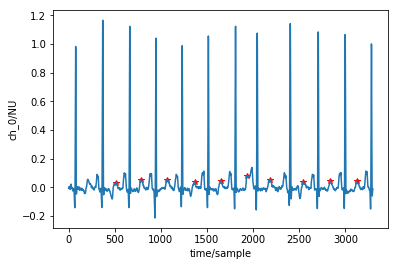

In [6]:
all_height_p = []
all_height_t = []
all_durations_p = []
all_durations_t = []

all_height_p_neg = []
all_height_t_neg = []
all_durations_p_neg = []
all_durations_t_neg = []

min_height = []
all_p_r_durations = []
all_r_t_durations = []
for patient in mitdb.patient_records:
    p_positives, p_negatives, p_properties, t_positives, t_negatives, t_properties = p_and_t_peak_properties_extractor(patient)
    p_height = np.asarray(p_properties["height"])
    t_height = np.asarray(t_properties["height"])
    all_height_p.extend(p_height[:,0])
    all_height_p_neg.extend(p_height[:,1])
    all_height_t.extend(t_height[:,0])
    all_height_t_neg.extend(t_height[:,1])
    
    
    p_duration = np.asarray(p_properties["durations"])
    t_duration= np.asarray(t_properties["durations"])
    all_durations_p.extend(p_duration[:,0])
    all_durations_t.extend(t_duration[:,0])
    all_durations_p_neg.extend(p_duration[:,1])
    all_durations_t_neg.extend(t_duration[:,1])







Patient file:  100 begins


C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:131: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


Patient file:  101 begins
Patient file:  102 begins
Patient file:  103 begins
Patient file:  104 begins
Patient file:  105 begins
Patient file:  106 begins
Patient file:  107 begins
Patient file:  108 begins
Patient file:  109 begins
Patient file:  111 begins
Patient file:  112 begins
Patient file:  113 begins
Patient file:  114 begins
Patient file:  115 begins
Patient file:  116 begins
Patient file:  117 begins
Patient file:  118 begins
Patient file:  119 begins
Patient file:  121 begins
Patient file:  122 begins
Patient file:  123 begins
Patient file:  124 begins
Patient file:  200 begins
Patient file:  201 begins
Patient file:  202 begins
Patient file:  203 begins
Patient file:  205 begins
Patient file:  207 begins
Patient file:  208 begins
Patient file:  209 begins
Patient file:  210 begins
Patient file:  212 begins
Patient file:  213 begins
Patient file:  214 begins
Patient file:  215 begins
Patient file:  217 begins
Patient file:  219 begins
Patient file:  220 begins
Patient file

 
    """"
    for i in range(0, len(q_properties["height"])):
        
        q_r_durations = sub_signal_interval(patient.time, q_points[i], patient.segmented_R_pos[i] ,0)
        all_q_r_durations.append(q_r_durations)
        r_s_durations = sub_signal_interval(patient.time, patient.segmented_R_pos[i],  s_points[i] ,0)
        all_r_s_durations.append(r_s_durations)
        if(s_properties["durations"][i] > 0.15 ):
            print(patient.filename, s_points[i], s_properties["height"][i], i)
            min_height.append(r_s_durations)    
    """"

In [26]:

all_height_p = []
all_height_t = []
all_durations_p = []
all_durations_t = []

all_height_p_neg = []
all_height_t_neg = []
all_durations_p_neg = []
all_durations_t_neg = []

min_height = []
all_p_r_durations = []
all_r_t_durations = []
for patient in mitdb.patient_records:
    p_positives = patient.P_points
    p_negatives = patient.P_neg_points
    p_properties = patient.P_points_properites
    t_positives = patient.T_points
    t_negatives = patient.T_neg_points
    t_properties = patient.T_points_properites 
    p_height = np.asarray(p_properties["height"])
    t_height = np.asarray(t_properties["height"])
    
    p_duration = np.asarray(p_properties["durations"])
    t_duration= np.asarray(t_properties["durations"])
    
    for i in range(0,len(p_positives)):
        
        p_r_duration = waveform.sub_signal_interval(patient.time, int(p_positives[i]), int(patient.segmented_R_pos[i]),0)
        r_t_duration = waveform.sub_signal_interval(patient.time, int(patient.segmented_R_pos[i]), int(t_positives[i]),0)
        all_p_r_durations.append((patient.filename,p_positives[i],p_r_duration,i))
        all_r_t_durations.append((patient.filename, t_positives[i],r_t_duration,i))
        
        all_height_p.append((patient.filename,p_positives[i],p_height[:,0][i],i))
        all_height_t.append((patient.filename,t_positives[i],t_height[:,0][i],i))
        all_height_p_neg.append((patient.filename,p_negatives[i],p_height[:,1][i],i))
        all_height_t_neg.append((patient.filename,t_negatives[i],t_height[:,1][i],i))
        all_durations_p.append((patient.filename,p_positives[i],p_duration[:,0][i],i))
        all_durations_t.append((patient.filename,t_positives[i],t_duration[:,0][i],i))
        all_durations_p_neg.append((patient.filename,p_negatives[i],p_duration[:,1][i],i))
        all_durations_t_neg.append((patient.filename,t_negatives[i],t_duration[:,1][i],i))



0.09774169872849472

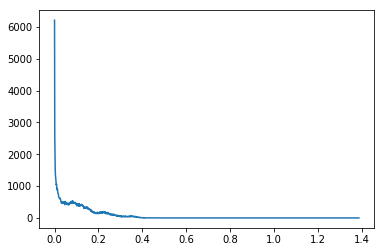

In [28]:
durations = np.asarray(all_height_p)
d = np.asarray(durations[:,2],dtype=float)
x ,y  = np.unique(d, return_counts=True) # counting occurrence of each loan

plt.plot(x,y)

average(d)


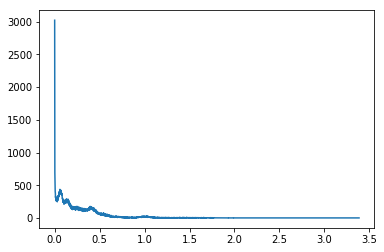

In [29]:
durations = np.asarray(all_height_t)
t = np.asarray(durations[:,2],dtype=float)
x ,y  = np.unique(t, return_counts=True) # counting occurrence of each loan

plt.plot(x,y)


In [70]:
minp=np.where(d==round(min(d),3))
#all_height_p[40000]
print(np.where(t==round(max(t),3)))
print(minp[0][1000])
all_height_p[10-5:10+5]
#print(average(d))
#print(average(t))
#print(minp[0][700])
all_height_p[10000-5:10000+5]


(array([12500], dtype=int64),)
18467


[('104', 436466, 0.003, 1574),
 ('104', 436821, 0.036, 1575),
 ('104', 437084, 0.007, 1576),
 ('104', 437342, 0.009, 1577),
 ('104', 437660, 0.009, 1578),
 ('104', 437923, 0.01, 1579),
 ('104', 438237, 0.009, 1580),
 ('104', 438525, 0.015, 1581),
 ('104', 438833, 0.056, 1582),
 ('104', 439131, 0.013, 1583)]

In [71]:
#[630288, 630646, 631013, 631290, 631726]
#[630244, 630625, 630982, 631340, 631695]
patient = mitdb.patient_records[4]
p_positives, p_negatives, p_properties, t_positives, t_negatives, t_properties = waveform.p_and_t_peak_properties_extractor(patient,to_savol=False)
starting_point = 436466-5
end_point = 439131+5
start_index = 1574
end_index = 1583
index = list(range(starting_point,end_point))

#q_points=find_Q_point(patient.filtered_MLII,patient.time, patient.segmented_R_pos, time_limit = 0.01,limit=50)
#s_points=find_S_point(patient.filtered_MLII,patient.time, patient.segmented_R_pos, time_limit = 0.01,limit=50)

sig = patient.filtered_MLII[index]
annd = p_positives[start_index:end_index]
transform_annd = [waveform.origin_to_new_point(starting_point,p)for p in annd]

transform_annd = np.asarray(transform_annd,dtype=int)

p_points = [int(i) for i in patient.annotated_p_waves_pos]
p_points = np.asarray(p_points, dtype=int)
p = np.where(np.logical_and(p_points>=starting_point, p_points<=end_point))



matlab_point = p_points[p]
transform_mat_points = [waveform.origin_to_new_point(starting_point,p)for p in matlab_point]
transform_mat_points = np.asarray(transform_mat_points,dtype=int)



index = list(range(starting_point,end_point))
sig = patient.filtered_MLII[index]
annd = patient.segmented_R_pos[start_index:end_index]
r_peaks = [waveform.origin_to_new_point(starting_point,p)for p in annd]

r_peaks = np.asarray(r_peaks)

index = list(range(starting_point,end_point))
sig = patient.filtered_MLII[index]
annd = patient.annotated_R_poses[start_index+1:end_index+1]
r_peaks_ori = [waveform.origin_to_new_point(starting_point,p)for p in annd]

r_peaks_ori = np.asarray(r_peaks_ori)

Patient file:  104 begins


In [68]:
point = 1323
index = list(range(s_points[1322]+3,q_points[1323]-3))
sig = patient. [index]
#time = patient.time[index]

#left, right = np.asarray(sudo_k_mean(index))

left, right = np.asarray(sudo_k_mean(index, patient.time,patient.filtered_MLII))

In [69]:
right = [origin_to_new_point(index[0],i) for i in right]
right = np.asarray(right)



In [55]:
sig[1226+5:1360]
100 0
101 1
102 2
103 3
104 4
105 5
106 6
107 7
108 8
109 9
111 10
112 11
113 12
114 13
115 14
116 15
117 16
118 17
119 18
121 19
122 20
123 21
124 22
200 23
201 24
202 25
203 26
205 27
207 28
208 29
209 30
210 31
212 32
213 33
214 34
215 35
217 36
219 37
220 38
221 39
222 40
223 41
228 42
230 43
231 44
232 45
233 46
234 47

SyntaxError: invalid syntax (<ipython-input-55-1bc9d24cf1e9>, line 2)

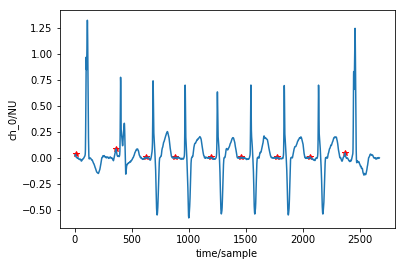

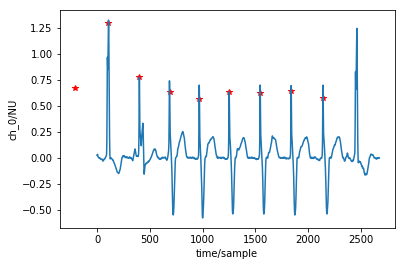

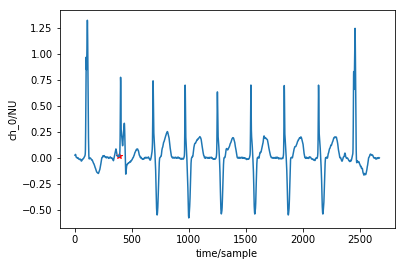

In [72]:
wfdb.plot_items(signal=sig, ann_samp=[transform_annd])
wfdb.plot_items(signal=sig, ann_samp=[r_peaks_ori])
wfdb.plot_items(signal=sig, ann_samp=[transform_mat_points])



In [24]:

p_points[p]

array([], dtype=int32)

In [85]:
print(s_points[77:80])
#patient.segmented_R_pos[1817:1822]

[18422, 18548, 18712]


In [ ]:
200 18548 0.312 78

In [5]:
mit100 = load_database.load_patient_record("mitdb","100")
mit100.set_segmented_beats_r_pos(winL=100,winR=200)


C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/100
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/100.csv
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/100.txt
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/p_t_wave/100pt.csv
Start segmenting records: 100
Filtered MLII records from : 100
start segmenting MLII.
Finished segmenting MLII.
Segmenting record 100 completes.
Processing file: 100
Patient file:  100 begins
Patient file:  100 processing end
Done proecessing: 100


In [6]:
mit100.set_r_properties_MLII()
mit100.set_Q_S_points_MLII()
mit100.set_P_T_points_MLII()

Processing file: 100
Patient file:  100 begins
Patient file:  100 processing end
Done proecessing: 100
Processing file: 100
Patient file:  100 begins
Done proecessing: 100
Processing file: 100
Patient file:  100 begins
Done proecessing: 100


In [67]:
QRS_properties, P_Q_properties, P_Q_neg, P_R_properties, P_R_neg, S_T_properties, S_T_neg,R_T_properties, R_T_neg, P_T_properties,neg_P_T, P_T_neg, neg_P_T_neg=interval_and_average(mit100)

In [17]:
mit100.P_points_properites["onset"][3][1]

1191

0.10733685601056762
0.1073465845788825
0.10733580037440622
 
0.2242575957727893
0.22429690453633863
0.2242939237010476
 
0.25934786437692636
0.25938665487357704
0.25938622525442656
0.2000977542932616
 
0.36798326728313613
0.3679577500011139
0.36804018275888895
0.5400330250990769
 
0.33144826067811867
0.33138781494571085
0.3314685991744202
0.5035579040070495
 
0.13026243945398544
0.13007475597327003
0.13011284315274949
0.1942135623073556
0.2990774988991642
0.35804931748128815


In [31]:
len(neg_P_T_neg)

2271

In [78]:
P_Q_properties["interval"]

[0.1469999999999999,
 0.21099999999999985,
 0.21599999999999975,
 0.2280000000000002,
 0.22199999999999998,
 0.21700000000000053,
 0.3329999999999993,
 0.21699999999999964,
 0.22499999999999964,
 0.20800000000000018,
 0.20800000000000018,
 0.21199999999999974,
 0.24099999999999966,
 0.23099999999999987,
 0.22499999999999964,
 0.21700000000000053,
 0.2190000000000012,
 0.21899999999999942,
 0.2079999999999984,
 0.2220000000000013,
 0.22800000000000153,
 0.23600000000000065,
 0.2270000000000003,
 0.22500000000000142,
 0.21899999999999764,
 0.21600000000000108,
 0.22499999999999787,
 0.22699999999999676,
 0.22199999999999775,
 0.2220000000000013,
 0.23300000000000054,
 0.2220000000000013,
 0.22799999999999798,
 0.21699999999999875,
 0.2170000000000023,
 0.23300000000000054,
 0.21699999999999875,
 0.22799999999999798,
 0.21999999999999886,
 0.21399999999999864,
 0.2190000000000012,
 0.22499999999999432,
 0.22799999999999443,
 0.22999999999999687,
 0.23899999999999721,
 0.21399999999999864,

In [101]:
for i in range(0,len(mit100.P_points)):
    print(i)
    print(mit100.time[int(mit100.Q_points_properites["onset"][i])])
    print(mit100.time[int(mit100.S_points_properites["offset"][i])])

0
0.969
1.078
1
1.786
1.889
2
2.569
2.678
3
3.367
3.467
4
4.153
4.256
5
4.969
5.075
6
5.625
5.728
7
6.614
6.725
8
7.461
7.564
9
8.272
8.375
10
9.064
9.167
11
9.836
9.936
12
10.675
10.778
13
11.522
11.633
14
12.35
12.453
15
13.181
13.283
16
14.0
14.106
17
14.797
14.9
18
15.583
15.7
19
16.386
16.489
20
17.206
17.311
21
18.072
18.178
22
18.9
19.003
23
19.683
19.786
24
20.464
20.583
25
21.25
21.353
26
22.036
22.139
27
22.839
22.956
28
23.664
23.767
29
24.492
24.597
30
25.339
25.442
31
26.139
26.25
32
26.917
27.022
33
27.717
27.819
34
28.503
28.611
35
29.358
29.469
36
30.203
30.311
37
31.033
31.136
38
31.833
31.939
39
32.667
32.772
40
33.464
33.564
41
34.239
34.356
42
35.069
35.172
43
35.911
36.019
44
36.783
36.9
45
37.619
37.719
46
38.394
38.5
47
39.197
39.3
48
40.008
40.111
49
40.808
40.911
50
41.642
41.747
51
42.472
42.578
52
43.294
43.403
53
44.111
44.214
54
44.894
45.006
55
45.675
45.786
56
46.486
46.592
57
47.331
47.433
58
48.161
48.267
59
48.983
49.1
60
49.797
49.9
61
50.567
50.681
6

479
384.933
385.047
480
385.744
385.85
481
386.511
386.614
482
387.278
387.381
483
388.053
388.158
484
388.861
388.964
485
389.667
389.783
486
390.5
390.603
487
391.283
391.386
488
392.033
392.139
489
392.783
392.892
490
393.503
393.617
491
394.228
394.333
492
394.964
395.069
493
395.722
395.825
494
396.464
396.567
495
397.189
397.3
496
397.903
398.006
497
398.597
398.7
498
399.294
399.397
499
400.014
400.119
500
400.733
400.842
501
401.492
401.597
502
402.253
402.361
503
403.031
403.136
504
403.783
403.886
505
404.519
404.622
506
405.231
405.333
507
405.972
406.075
508
406.739
406.842
509
407.539
407.653
510
408.314
408.417
511
409.083
409.189
512
409.847
409.95
513
410.592
410.694
514
411.325
411.433
515
412.053
412.175
516
412.825
412.931
517
413.603
413.706
518
414.394
414.508
519
415.189
415.294
520
415.967
416.072
521
416.694
416.797
522
417.447
417.558
523
418.211
418.314
524
418.969
419.075
525
419.728
419.833
526
420.519
420.625
527
421.325
421.442
528
422.097
422.197
529
422.

979
771.192
771.297
980
771.95
772.058
981
772.753
772.858
982
773.606
773.708
983
774.425
774.533
984
775.214
775.322
985
776.006
776.111
986
776.544
776.65
987
777.492
777.6
988
778.297
778.408
989
779.142
779.247
990
779.986
780.089
991
780.803
780.911
992
781.617
781.719
993
782.397
782.497
994
783.153
783.256
995
783.906
784.031
996
784.7
784.808
997
785.497
785.608
998
786.322
786.428
999
787.136
787.242
1000
787.919
788.025
1001
788.675
788.781
1002
789.433
789.539
1003
790.183
790.306
1004
790.981
791.1
1005
791.814
791.919
1006
792.614
792.725
1007
793.422
793.528
1008
794.211
794.317
1009
794.972
795.078
1010
795.731
795.844
1011
796.503
796.614
1012
797.311
797.414
1013
798.136
798.258
1014
798.972
799.094
1015
799.789
799.894
1016
800.572
800.675
1017
801.35
801.456
1018
802.133
802.253
1019
802.933
803.039
1020
803.758
803.864
1021
804.578
804.681
1022
805.414
805.525
1023
806.211
806.319
1024
806.997
807.097
1025
807.761
807.864
1026
808.569
808.692
1027
809.394
809.517
1

1172.256
1479
1173.058
1173.164
1480
1173.842
1173.947
1481
1174.442
1174.544
1482
1175.4
1175.506
1483
1176.228
1176.331
1484
1177.072
1177.181
1485
1177.897
1178.006
1486
1178.667
1178.769
1487
1179.433
1179.536
1488
1180.203
1180.308
1489
1181.017
1181.128
1490
1181.853
1181.972
1491
1182.692
1182.794
1492
1183.494
1183.6
1493
1184.333
1184.439
1494
1185.114
1185.219
1495
1185.886
1185.989
1496
1186.681
1186.786
1497
1187.508
1187.614
1498
1188.353
1188.458
1499
1189.192
1189.294
1500
1189.981
1190.083
1501
1190.772
1190.878
1502
1191.589
1191.692
1503
1192.367
1192.486
1504
1193.164
1193.267
1505
1194.019
1194.125
1506
1194.847
1194.953
1507
1195.692
1195.8
1508
1196.486
1196.589
1509
1197.256
1197.369
1510
1198.042
1198.147
1511
1198.872
1198.981
1512
1199.697
1199.8
1513
1200.519
1200.631
1514
1201.356
1201.464
1515
1202.164
1202.267
1516
1202.947
1203.056
1517
1203.736
1203.839
1518
1204.522
1204.628
1519
1205.058
1205.164
1520
1206.083
1206.192
1521
1206.925
1207.031
1522
1207.

1577.903
1979
1578.625
1578.733
1980
1579.453
1579.561
1981
1580.267
1580.386
1982
1581.067
1581.172
1983
1581.839
1581.942
1984
1582.608
1582.725
1985
1583.439
1583.544
1986
1584.289
1584.4
1987
1585.133
1585.236
1988
1585.936
1586.042
1989
1586.739
1586.844
1990
1587.544
1587.658
1991
1588.358
1588.469
1992
1589.172
1589.278
1993
1590.019
1590.128
1994
1590.861
1590.969
1995
1591.722
1591.828
1996
1592.522
1592.628
1997
1593.303
1593.403
1998
1594.089
1594.197
1999
1594.925
1595.031
2000
1595.578
1595.689
2001
1596.569
1596.675
2002
1597.431
1597.536
2003
1598.239
1598.347
2004
1599.05
1599.153
2005
1599.831
1599.933
2006
1600.633
1600.739
2007
1601.475
1601.578
2008
1602.339
1602.444
2009
1603.175
1603.278
2010
1603.986
1604.094
2011
1604.781
1604.883
2012
1605.564
1605.675
2013
1606.356
1606.467
2014
1607.15
1607.275
2015
1608.003
1608.108
2016
1608.844
1608.95
2017
1609.522
1609.628
2018
1610.475
1610.578
2019
1611.25
1611.369
2020
1612.047
1612.153
2021
1612.853
1612.958
2022
161

In [87]:
mit100.time[int(mit100.P_points_properites["onset"][0][3])]

IndexError: tuple index out of range

In [107]:
print(mit100.P_points_properites["onset"][0][0])
mit100.T_points_properites["offset"][0][0]

314


416

In [93]:
t_points = np.asarray(mit100.T_points[0:5],dtype=int)
p_points = np.asarray(mit100.P_points[0:5],dtype=int)

In [94]:
print(t_points)
print(p_points)

[ 518  782 1063 1368 1652]
[ 321  604  884 1167 1465]


In [108]:
mit100.T_points_properites["offset"]

[(416, 364),
 (521, 477),
 (816, 699),
 (1097, 1055),
 (1388, 1342),
 (1656, 1564),
 (1973, 1917),
 (2216, 2164),
 (2564, 2515),
 (2861, 2749),
 (3153, 3103),
 (3434, 3394),
 (3719, 3669),
 (4020, 3974),
 (4337, 4283),
 (4624, 4577),
 (4921, 4818),
 (5212, 5104),
 (5503, 5454),
 (5786, 5741),
 (6085, 6034),
 (6363, 6328),
 (6680, 6634),
 (6975, 6929),
 (7258, 7146),
 (7545, 7501),
 (7826, 7781),
 (8116, 8060),
 (8404, 8357),
 (8708, 8655),
 (8980, 8945),
 (9293, 9177),
 (9583, 9537),
 (9851, 9819),
 (10156, 10112),
 (10447, 10315),
 (10757, 10632),
 (11053, 11006),
 (11365, 11302),
 (11633, 11583),
 (11921, 11882),
 (12220, 12173),
 (12506, 12463),
 (12806, 12689),
 (13119, 13069),
 (13429, 13374),
 (13709, 13669),
 (13996, 13946),
 (14278, 14240),
 (14570, 14531),
 (14876, 14819),
 (15170, 15119),
 (15476, 15425),
 (15761, 15717),
 (16054, 16005),
 (16342, 16206),
 (16626, 16581),
 (16909, 16866),
 (17221, 17116),
 (17509, 17466),
 (17805, 17765),
 (18102, 18053),
 (18378, 18333),
 (1